# Projet 3 - Enedis - Machine Learning - Exploration
### Ortuno Nicolas - Celikel Halil Ibrahim - Yermakov Mykhailo

### 1. Preprocessing

In [1]:
# Import modules pandas and numpy
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

In [2]:
# Import the files Enedis of regions
df1 = pd.read_csv(r"C:\Users\HALILICELIKEL\Desktop\PROJET 3\conso-inf36-region_centre-val-de_loire.csv", sep=';')
df2 = pd.read_csv(r"C:\Users\HALILICELIKEL\Desktop\PROJET 3\conso-inf36-region_hauts_de_france.csv", sep=';')
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)
df.head()

Horodate               Région  Code région  \
0  2024-03-31T23:30:00+02:00  Centre-Val de Loire           24   
1  2024-03-31T23:30:00+02:00  Centre-Val de Loire           24   
2  2024-03-31T23:30:00+02:00  Centre-Val de Loire           24   
3  2024-03-31T23:30:00+02:00  Centre-Val de Loire           24   
4  2024-03-31T23:30:00+02:00  Centre-Val de Loire           24   

                   Profil Plage de puissance souscrite  Nb points soutirage  \
0         PRO1 (+ PRO1WE)                P2: ]3-6] kVA                24507   
1  PRO2 (+ PRO2WE + PRO6)              P8: ]24-30] kVA                 1943   
2                    PRO5          P0: Total <= 36 kVA                26253   
3                    PRO5              P5: ]12-15] kVA                  216   
4                    PRO5              P9: ]30-36] kVA                  128   

   Total énergie soutirée (Wh)  Courbe Moyenne n°1 (Wh)  \
0                   2828593.00                   194.00   
1                   2680758.00                  1751.00   
2                  13344936.00                   702.00   
3                    580054.00                      NaN   
4                    504368.00                      NaN   

  Indice représentativité Courbe n°1 (%)  Courbe Moyenne n°2 (Wh)  \
0                                     17                   101.00   
1                                     17                  1017.00   
2                                     43                   122.00   
3                                      S                      NaN   
4                                      S                      NaN   

  Indice représentativité Courbe n°2 (%)  Courbe Moyenne n°1 + n°2 (Wh)  \
0                                     16                         144.00   
1                                     18                        1383.00   
2                                     43                         413.00   
3                                      S                        1396.00   
4                                      S                        2114.00   

  Indice représentativité Courbe n°1 + n°2 (%)  Jour max du mois (0/1)  \
0                                           34                       0   
1                                           35                       0   
2                                           87                       0   
3                                           89                       0   
4                                           92                       0   

   Semaine max du mois (0/1)  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [3]:
# Checking the shape of the dataframe after concatenate
df.shape

(5754432, 15)

In [4]:
# Checking the basic infos of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754432 entries, 0 to 5754431
Data columns (total 15 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Horodate                                      object 
 1   Région                                        object 
 2   Code région                                   int64  
 3   Profil                                        object 
 4   Plage de puissance souscrite                  object 
 5   Nb points soutirage                           int64  
 6   Total énergie soutirée (Wh)                   float64
 7   Courbe Moyenne n°1 (Wh)                       float64
 8   Indice représentativité Courbe n°1 (%)        object 
 9   Courbe Moyenne n°2 (Wh)                       float64
 10  Indice représentativité Courbe n°2 (%)        object 
 11  Courbe Moyenne n°1 + n°2 (Wh)                 float64
 12  Indice représentativité Courbe n°1 + n°2 (%)  object 
 1

#### 1.1. Change the types of column Horodate to datetime and create a new column 'hour'

In [5]:
from datetime import datetime
from datetime import timedelta
import re
# Convert the type of column 'Horodate' to string
df['Horodate'] = df['Horodate'].astype(str)

# Define a function 
def arr_col_horodate(object):
    # Delete the letter 'T'
    without_T = re.sub('T', ' ', object)
    # Take the date part
    without_plus = re.findall('\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}', without_T)
    # Convert it to string
    str_without_plus = ''.join(without_plus)
    return str_without_plus
    
df['Horodate'] = df['Horodate'].apply(arr_col_horodate)

In [6]:
df.head()

Horodate               Région  Code région                  Profil  \
0  2024-03-31 23:30  Centre-Val de Loire           24         PRO1 (+ PRO1WE)   
1  2024-03-31 23:30  Centre-Val de Loire           24  PRO2 (+ PRO2WE + PRO6)   
2  2024-03-31 23:30  Centre-Val de Loire           24                    PRO5   
3  2024-03-31 23:30  Centre-Val de Loire           24                    PRO5   
4  2024-03-31 23:30  Centre-Val de Loire           24                    PRO5   

  Plage de puissance souscrite  Nb points soutirage  \
0                P2: ]3-6] kVA                24507   
1              P8: ]24-30] kVA                 1943   
2          P0: Total <= 36 kVA                26253   
3              P5: ]12-15] kVA                  216   
4              P9: ]30-36] kVA                  128   

   Total énergie soutirée (Wh)  Courbe Moyenne n°1 (Wh)  \
0                   2828593.00                   194.00   
1                   2680758.00                  1751.00   
2                  13344936.00                   702.00   
3                    580054.00                      NaN   
4                    504368.00                      NaN   

  Indice représentativité Courbe n°1 (%)  Courbe Moyenne n°2 (Wh)  \
0                                     17                   101.00   
1                                     17                  1017.00   
2                                     43                   122.00   
3                                      S                      NaN   
4                                      S                      NaN   

  Indice représentativité Courbe n°2 (%)  Courbe Moyenne n°1 + n°2 (Wh)  \
0                                     16                         144.00   
1                                     18                        1383.00   
2                                     43                         413.00   
3                                      S                        1396.00   
4                                      S                        2114.00   

  Indice représentativité Courbe n°1 + n°2 (%)  Jour max du mois (0/1)  \
0                                           34                       0   
1                                           35                       0   
2                                           87                       0   
3                                           89                       0   
4                                           92                       0   

   Semaine max du mois (0/1)  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [7]:
# Create a new column as 'hour'
df['hour'] = df['Horodate'].apply(lambda x: re.findall('\s(\d{2}:\d{2})', x))

# Delete the part hour of the 'Horodate' column
df['Horodate'] = df['Horodate'].apply(lambda x: re.sub('\s\d+:\d+', '', x))

# Move the 'hour' column next to the 'Horodate' column
df.insert(1, 'hour', df.pop('hour'))

# Convert dtype of the 'Horodate' column and change the name to 'Date'
df['Horodate'] = pd.to_datetime(df['Horodate'])
df = df.rename(columns={'Horodate':'Date'})

# Convert type of the 'hour' column from list to string
df['hour'] = df['hour'].apply(lambda x: ''.join(x))

df.head()

Date   hour               Région  Code région                  Profil  \
0 2024-03-31  23:30  Centre-Val de Loire           24         PRO1 (+ PRO1WE)   
1 2024-03-31  23:30  Centre-Val de Loire           24  PRO2 (+ PRO2WE + PRO6)   
2 2024-03-31  23:30  Centre-Val de Loire           24                    PRO5   
3 2024-03-31  23:30  Centre-Val de Loire           24                    PRO5   
4 2024-03-31  23:30  Centre-Val de Loire           24                    PRO5   

  Plage de puissance souscrite  Nb points soutirage  \
0                P2: ]3-6] kVA                24507   
1              P8: ]24-30] kVA                 1943   
2          P0: Total <= 36 kVA                26253   
3              P5: ]12-15] kVA                  216   
4              P9: ]30-36] kVA                  128   

   Total énergie soutirée (Wh)  Courbe Moyenne n°1 (Wh)  \
0                   2828593.00                   194.00   
1                   2680758.00                  1751.00   
2                  13344936.00                   702.00   
3                    580054.00                      NaN   
4                    504368.00                      NaN   

  Indice représentativité Courbe n°1 (%)  Courbe Moyenne n°2 (Wh)  \
0                                     17                   101.00   
1                                     17                  1017.00   
2                                     43                   122.00   
3                                      S                      NaN   
4                                      S                      NaN   

  Indice représentativité Courbe n°2 (%)  Courbe Moyenne n°1 + n°2 (Wh)  \
0                                     16                         144.00   
1                                     18                        1383.00   
2                                     43                         413.00   
3                                      S                        1396.00   
4                                      S                        2114.00   

  Indice représentativité Courbe n°1 + n°2 (%)  Jour max du mois (0/1)  \
0                                           34                       0   
1                                           35                       0   
2                                           87                       0   
3                                           89                       0   
4                                           92                       0   

   Semaine max du mois (0/1)  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754432 entries, 0 to 5754431
Data columns (total 16 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   Date                                          datetime64[ns]
 1   hour                                          object        
 2   Région                                        object        
 3   Code région                                   int64         
 4   Profil                                        object        
 5   Plage de puissance souscrite                  object        
 6   Nb points soutirage                           int64         
 7   Total énergie soutirée (Wh)                   float64       
 8   Courbe Moyenne n°1 (Wh)                       float64       
 9   Indice représentativité Courbe n°1 (%)        object        
 10  Courbe Moyenne n°2 (Wh)                       float64       
 11  Indice représentativité 

In [9]:
# Descriptive statistics of each column

df.describe()

Date  Code région  Nb points soutirage  \
count                        5754432   5754432.00           5754432.00   
mean   2023-03-31 23:35:17.647058176        28.00             53976.55   
min              2022-04-01 00:00:00        24.00                11.00   
25%              2022-09-30 00:00:00        24.00               684.00   
50%              2023-04-01 00:00:00        28.00              3906.00   
75%              2023-10-01 00:00:00        32.00             19636.00   
max              2024-03-31 00:00:00        32.00           1235474.00   
std                              NaN         4.00            179410.99   

       Total énergie soutirée (Wh)  Courbe Moyenne n°1 (Wh)  \
count                   5209602.00               4401256.00   
mean                   16496637.79                   738.07   
min                        8700.00                     0.00   
25%                      747422.25                   287.00   
50%                     2534250.50                   557.00   
75%                     7879324.25                  1022.00   
max                  1046405896.00                  7029.00   
std                    49564067.08                   612.69   

       Courbe Moyenne n°2 (Wh)  Courbe Moyenne n°1 + n°2 (Wh)  \
count               4398040.00                     4884140.00   
mean                    671.28                         750.03   
min                      10.00                           5.00   
25%                     280.00                         303.00   
50%                     498.00                         574.00   
75%                     920.00                        1027.00   
max                    5680.00                        6241.00   
std                     544.61                         612.79   

       Jour max du mois (0/1)  Semaine max du mois (0/1)  
count              5754432.00                 5754432.00  
mean                     0.03                       0.23  
min                      0.00                       0.00  
25%                      0.00                       0.00  
50%                      0.00                       0.00  
75%                      0.00                       0.00  
max                      1.00                       1.00  
std                      0.18                       0.42

In [10]:
# Checking the correlation between variables
df.select_dtypes('number').corr()

Code région  Nb points soutirage  \
Code région                           1.00                 0.11   
Nb points soutirage                   0.11                 1.00   
Total énergie soutirée (Wh)           0.10                 0.81   
Courbe Moyenne n°1 (Wh)               0.11                -0.24   
Courbe Moyenne n°2 (Wh)               0.11                -0.23   
Courbe Moyenne n°1 + n°2 (Wh)         0.09                -0.23   
Jour max du mois (0/1)               -0.00                 0.00   
Semaine max du mois (0/1)             0.00                 0.00   

                               Total énergie soutirée (Wh)  \
Code région                                           0.10   
Nb points soutirage                                   0.81   
Total énergie soutirée (Wh)                           1.00   
Courbe Moyenne n°1 (Wh)                              -0.13   
Courbe Moyenne n°2 (Wh)                              -0.10   
Courbe Moyenne n°1 + n°2 (Wh)                        -0.13   
Jour max du mois (0/1)                                0.01   
Semaine max du mois (0/1)                             0.02   

                               Courbe Moyenne n°1 (Wh)  \
Code région                                       0.11   
Nb points soutirage                              -0.24   
Total énergie soutirée (Wh)                      -0.13   
Courbe Moyenne n°1 (Wh)                           1.00   
Courbe Moyenne n°2 (Wh)                           0.89   
Courbe Moyenne n°1 + n°2 (Wh)                     0.96   
Jour max du mois (0/1)                            0.02   
Semaine max du mois (0/1)                         0.06   

                               Courbe Moyenne n°2 (Wh)  \
Code région                                       0.11   
Nb points soutirage                              -0.23   
Total énergie soutirée (Wh)                      -0.10   
Courbe Moyenne n°1 (Wh)                           0.89   
Courbe Moyenne n°2 (Wh)                           1.00   
Courbe Moyenne n°1 + n°2 (Wh)                     0.95   
Jour max du mois (0/1)                            0.03   
Semaine max du mois (0/1)                         0.06   

                               Courbe Moyenne n°1 + n°2 (Wh)  \
Code région                                             0.09   
Nb points soutirage                                    -0.23   
Total énergie soutirée (Wh)                            -0.13   
Courbe Moyenne n°1 (Wh)                                 0.96   
Courbe Moyenne n°2 (Wh)                                 0.95   
Courbe Moyenne n°1 + n°2 (Wh)                           1.00   
Jour max du mois (0/1)                                  0.03   
Semaine max du mois (0/1)                               0.06   

                               Jour max du mois (0/1)  \
Code région                                     -0.00   
Nb points soutirage                              0.00   
Total énergie soutirée (Wh)                      0.01   
Courbe Moyenne n°1 (Wh)                          0.02   
Courbe Moyenne n°2 (Wh)                          0.03   
Courbe Moyenne n°1 + n°2 (Wh)                    0.03   
Jour max du mois (0/1)                           1.00   
Semaine max du mois (0/1)                        0.34   

                               Semaine max du mois (0/1)  
Code région                                         0.00  
Nb points soutirage                                 0.00  
Total énergie soutirée (Wh)                         0.02  
Courbe Moyenne n°1 (Wh)                             0.06  
Courbe Moyenne n°2 (Wh)                             0.06  
Courbe Moyenne n°1 + n°2 (Wh)                       0.06  
Jour max du mois (0/1)                              0.34  
Semaine max du mois (0/1)                           1.00

As expected, the variables 'Nb points soutirage' and 'total energie soutirée' are strongly correlated. The variables that concern 'Courbe Moyenne' also are strongly correlated as expected again.

### 2. Analyse of Missing Values

The dataset contains 4.48 % missing values
Total énergie soutirée (Wh)      9.47
Courbe Moyenne n°1 (Wh)         23.52
Courbe Moyenne n°2 (Wh)         23.57
Courbe Moyenne n°1 + n°2 (Wh)   15.12
dtype: float64


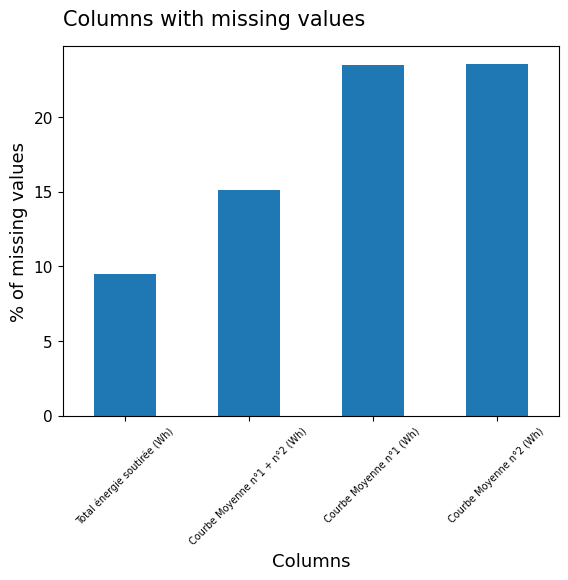

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of entries (rows X columns) in data set
total= df.size
# Number of missing values per column
missingCount = df.isna().sum()
# Total number of missing values
missing_tot = missingCount.sum()
# Calculate the percentage of missing values
print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values")

# Keeping only columns with missing values greater than 0 
missing = (missingCount[missingCount > 0]/len(df)) * 100 
print(missing)
# Sort in order of missing values and modify original missing series
missing.sort_values(inplace=True) 
missing.plot.bar()
plt.title('Columns with missing values', size=15, loc='left', pad=15)
plt.xticks(fontsize=7,rotation=45)
plt.yticks(fontsize=11)
plt.xlabel('Columns', fontsize=13)
plt.ylabel('% of missing values', fontsize=13)
plt.show()

We can see that there are missing values in the columns 'Total énergie soutirée', 'Courbe moyenne n°1', 'Courbe moyenne n°2' et 'Courbe moyenne n°1 + n°2'. Now, we will search the dispersion of the values with plotting boxplots.

0.00         8700.00
0.10       233138.00
0.20       540054.00
0.30      1041810.60
0.40      1701854.00
0.50      2534250.50
0.60      3929312.20
0.70      6108064.50
0.80     10973725.80
0.90     39700623.10
1.00   1046405896.00
Name: Total énergie soutirée (Wh), dtype: float64 




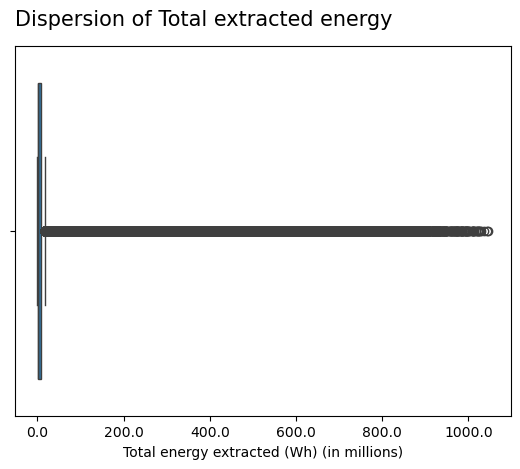

In [12]:
# Boxplot for 'total énergie soutirée'
from matplotlib.ticker import FuncFormatter

# Printing the ten quantiles
print( df['Total énergie soutirée (Wh)'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n')

# Define the function millions_formatter
def millions_formatter(x, pos):
    return f'{x / 1000000}'


fig, ax = plt.subplots()
sns.boxplot(data=df, x='Total énergie soutirée (Wh)')
ax.set_title('Dispersion of Total extracted energy', pad=15, size=15, loc='left')
ax.set_xlabel('Total energy extracted (Wh) (in millions)')

# In order to display the numbers on millions 
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

We can say that 90 percent of the values are under 40 millions Wh. by looking at the quantile results. We can interpret that there are too many outliers by looking at boxplot.

0.00      0.00
0.10    160.00
0.20    249.00
0.30    326.00
0.40    429.00
0.50    557.00
0.60    707.00
0.70    902.00
0.80   1163.00
0.90   1604.00
1.00   7029.00
Name: Courbe Moyenne n°1 (Wh), dtype: float64 




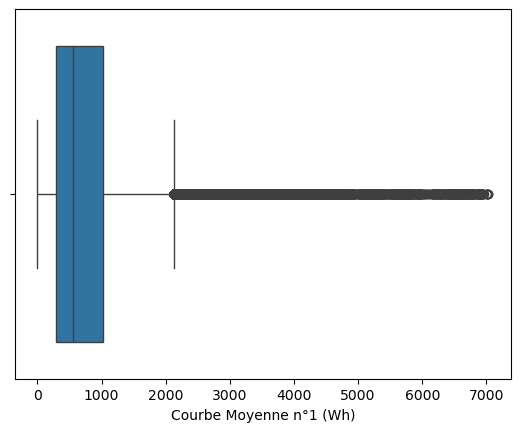

In [13]:
# Boxplot for 'Courbe moyenne n°1'

print( df['Courbe Moyenne n°1 (Wh)'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n')

sns.boxplot(data=df, x='Courbe Moyenne n°1 (Wh)')
plt.show()

0.00     10.00
0.10    151.00
0.20    245.00
0.30    313.00
0.40    390.00
0.50    498.00
0.60    646.00
0.70    807.00
0.80   1044.00
0.90   1463.00
1.00   5680.00
Name: Courbe Moyenne n°2 (Wh), dtype: float64 




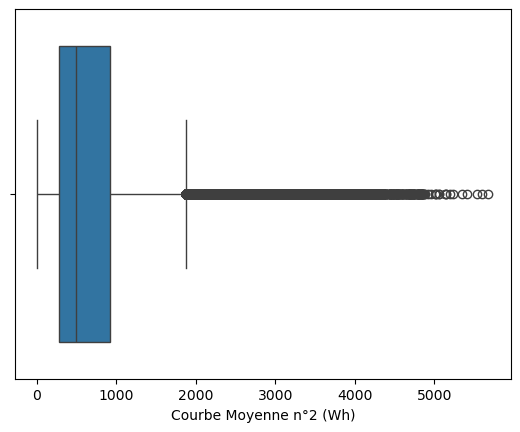

In [14]:
# Boxplot for 'Courbe moyenne n°2'

print( df['Courbe Moyenne n°2 (Wh)'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n')

sns.boxplot(data=df, x='Courbe Moyenne n°2 (Wh)')
plt.show()

0.00      5.00
0.10    169.00
0.20    264.00
0.30    344.00
0.40    443.00
0.50    574.00
0.60    724.00
0.70    911.00
0.80   1169.00
0.90   1605.00
1.00   6241.00
Name: Courbe Moyenne n°1 + n°2 (Wh), dtype: float64 




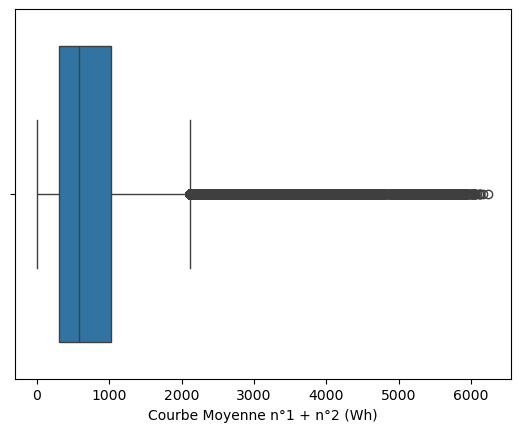

In [15]:
# Boxplot for 'Courbe Moyenne n°1 + n°2'

print( df['Courbe Moyenne n°1 + n°2 (Wh)'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), '\n\n')

sns.boxplot(data=df, x='Courbe Moyenne n°1 + n°2 (Wh)')
plt.show()

In [16]:
# Check the lignes with missing values based on the condition of the two columns

null_values = df[(df['Courbe Moyenne n°1 (Wh)'].isna()) & (df['Courbe Moyenne n°2 (Wh)'].isna())]
null_values

Date   hour               Région  Code région  \
3       2024-03-31  23:30  Centre-Val de Loire           24   
4       2024-03-31  23:30  Centre-Val de Loire           24   
10      2024-03-31  23:30  Centre-Val de Loire           24   
16      2024-03-31  23:30  Centre-Val de Loire           24   
20      2024-03-31  23:30  Centre-Val de Loire           24   
...            ...    ...                  ...          ...   
5754417 2022-04-01  00:00      Hauts-de-France           32   
5754419 2022-04-01  00:00      Hauts-de-France           32   
5754425 2022-04-01  00:00      Hauts-de-France           32   
5754428 2022-04-01  00:00      Hauts-de-France           32   
5754430 2022-04-01  00:00      Hauts-de-France           32   

                    Profil Plage de puissance souscrite  Nb points soutirage  \
3                     PRO5              P5: ]12-15] kVA                  216   
4                     PRO5              P9: ]30-36] kVA                  128   
10                    RES3              P7: ]18-30] kVA                  276   
16                    PRO5              P7: ]18-24] kVA                  107   
20                    RES4                P1: ]0-9] kVA                  174   
...                    ...                          ...                  ...   
5754417  RES11 (+ RES11WE)              P7: ]18-24] kVA                 1061   
5754419             RES2WE              P6: ]15-36] kVA                  387   
5754425               PRO5              P9: ]30-36] kVA                  375   
5754428             RES2WE              P5: ]12-15] kVA                  380   
5754430               RES3              P9: ]30-36] kVA                   71   

         Total énergie soutirée (Wh)  Courbe Moyenne n°1 (Wh)  \
3                          580054.00                      NaN   
4                          504368.00                      NaN   
10                         427795.00                      NaN   
16                               NaN                      NaN   
20                          40738.00                      NaN   
...                              ...                      ...   
5754417                   1240672.00                      NaN   
5754419                    432641.00                      NaN   
5754425                   1609731.00                      NaN   
5754428                    349545.00                      NaN   
5754430                          NaN                      NaN   

        Indice représentativité Courbe n°1 (%)  Courbe Moyenne n°2 (Wh)  \
3                                            S                      NaN   
4                                            S                      NaN   
10                                           S                      NaN   
16                                           S                      NaN   
20                                           S                      NaN   
...                                        ...                      ...   
5754417                                      S                      NaN   
5754419                                      S                      NaN   
5754425                                      S                      NaN   
5754428                                      S                      NaN   
5754430                                      S                      NaN   

        Indice représentativité Courbe n°2 (%)  Courbe Moyenne n°1 + n°2 (Wh)  \
3                                            S                        1396.00   
4                                            S                        2114.00   
10                                           S                        1453.00   
16                                           S                            NaN   
20                                           S                            NaN   
...                                        ...                            ...   
5754417                                      S 

In [17]:
# Compare the number of lignes with missing values 'Courbe Moyenne n°1 + n°2 (Wh)'

print(df['Courbe Moyenne n°1 + n°2 (Wh)'].isna().sum())
print(null_values['Courbe Moyenne n°1 + n°2 (Wh)'].isna().sum())

870292
870292


We can say that when the values of the columns 'Courbe Moyenne n°1' and 'Courbe Moyenne n°2', the values of 'Courbe Moyenne n°1 + n°2 (Wh)' are missing, too.

In [18]:
# Compare the number of lignes with missing values 'Total énergie soutirée (Wh)'

print(df['Total énergie soutirée (Wh)'].isna().sum())
print(null_values['Total énergie soutirée (Wh)'].isna().sum())

544830
544830


In [19]:
# The profils without null_values

null_values_profils = null_values['Profil'].value_counts().index.to_list()
df_profils = df['Profil'].value_counts().index.to_list()
difference = [item for item in df_profils if item not in null_values_profils]
difference

['PRO1 (+ PRO1WE)',
 'PRO2 (+ PRO2WE + PRO6)',
 'RES1 (+ RES1WE)',
 'ENT3 (+ ENT4 + ENT5)']

In [20]:
# The 'Plage de puissance souscrite' without null_values

null_values_plage = null_values['Plage de puissance souscrite'].value_counts().index.to_list()
df_plage = df['Plage de puissance souscrite'].value_counts().index.to_list()
difference1 = [item for item in df_plage if item not in null_values_plage]
difference1

['P3: ]6-9] kVA', 'P2: ]3-6] kVA', 'P1: ]0-6] kVA', 'P1: ]0-3] kVA']

### 3. Analyse of Energy Consumption

In [21]:
# Import libraries
import plotly.express as px
import warnings
import matplotlib.ticker as mtick
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("whitegrid")

In [22]:
# Extract total energy consumption by date 
df_cvl = df[(df['Région'] == 'Centre-Val de Loire') & (df['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA')]
df_hdf = df[(df['Région'] == 'Hauts-de-France') & (df['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA')]
df_cvl = df_cvl.groupby('Date')[['Total énergie soutirée (Wh)']].sum().reset_index()
df_hdf = df_hdf.groupby('Date')[['Total énergie soutirée (Wh)']].sum().reset_index()

We took into consideration only 'P0: Total <= 36 kVA' the subscribed power ranges because this represents the total energy consumption of all power ranges. 

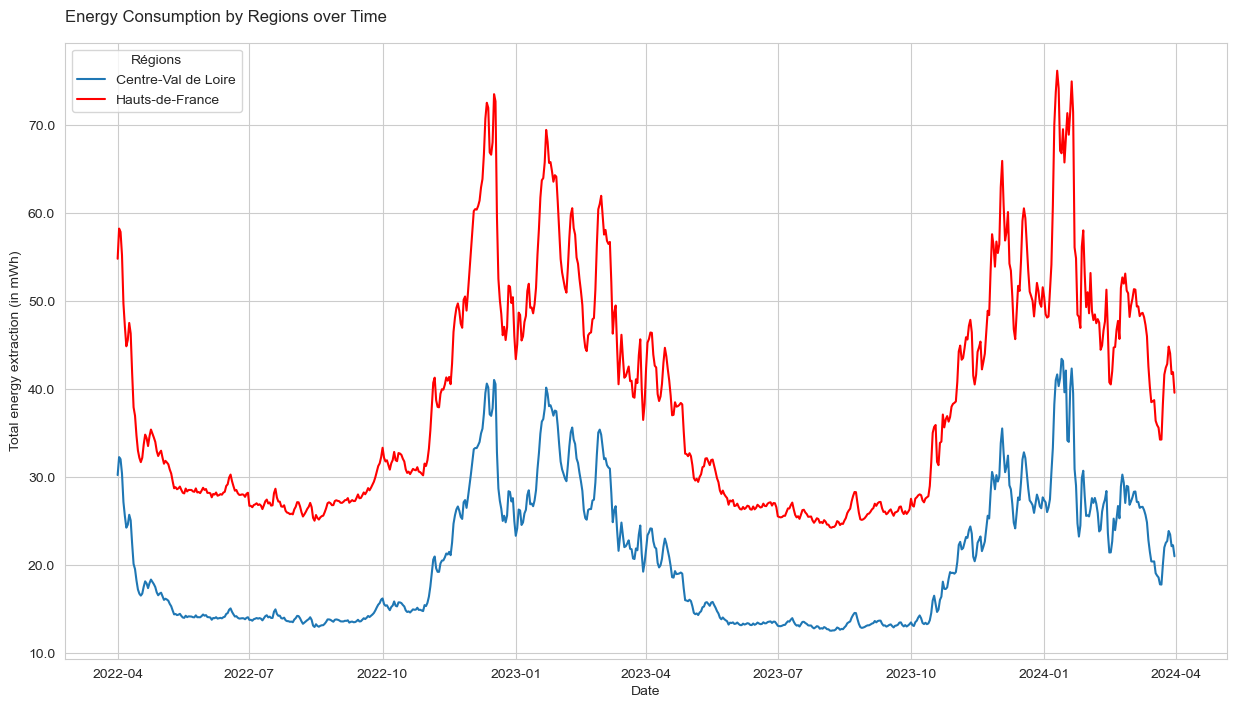

In [23]:
# Energy consumption over time by regions
# Define the function billions_formatter 
def billions_formatter(x, pos):
    return f'{x / 1000000000}'
    
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_cvl, x='Date', y='Total énergie soutirée (Wh)', label='Centre-Val de Loire')
sns.lineplot(data=df_hdf, x='Date', y='Total énergie soutirée (Wh)', label='Hauts-de-France', c='red')
plt.legend(title='Régions', loc='upper left')
plt.title('Energy Consumption by Regions over Time', pad=15, loc='left')
plt.ylabel('Total energy extraction (in mWh)')

# We use set_major_formatter function with the billions_formatter function we defined 
# for showing the energy consumption in million kWh
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.show()

We can say that energy consumption increases in cold seasons and decreases in hot seasons by looking at the line graph.

We will now plot the distribution of energy consumption during a day.

In [24]:
# Extract total energy consumption by 1/2 hour 
df_cons_p0 = df[df['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA']
df_cons_hour_date = df_cons_p0.groupby(['Date', 'hour'])[['Total énergie soutirée (Wh)']].sum().reset_index()
df_cons_hour = df_cons_hour_date.groupby( 'hour' )[['Total énergie soutirée (Wh)']].mean().reset_index()
df_cons_hour['Total énergie soutirée (Wh)'] = df_cons_hour['Total énergie soutirée (Wh)'].apply(lambda x: x / 1000000)

In [25]:
# Average energy consumption by 1/2 hour
fig = px.line(
    df_cons_hour,
    x="hour",
    y="Total énergie soutirée (Wh)",
    title="Energy Consumption by Regions per 1/2 hour",
    height=600
)

fig.update_layout(
    yaxis_title="Total énergie soutirée (mWh)",
    xaxis_title="Hour",
    margin=dict(l=20, r=20, t=50, b=20)
)
fig.update_xaxes(tickangle=315)

fig.show()

The energy consumption makes peak after 10 pm which makes sense because the price list of electric is cheaper between 10 pm and 6 pm.

<function matplotlib.pyplot.show(close=None, block=None)>

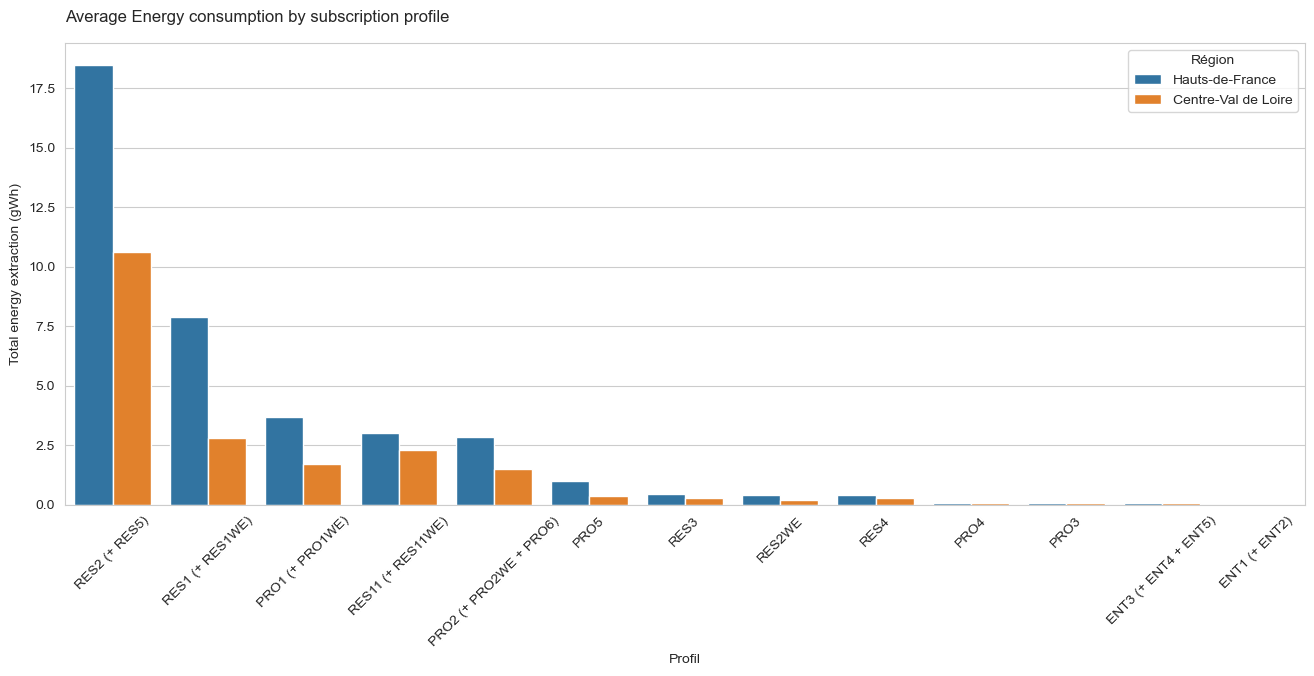

In [26]:
# Energy consumption by subscription profile & region
df_cons_prof = df_cons_p0.groupby(['Profil', 'Région'])[['Total énergie soutirée (Wh)']].sum().reset_index()
df_cons_prof['Total énergie soutirée (Wh)'] = df_cons_prof['Total énergie soutirée (Wh)'].apply(lambda x : x / 731)
df_cons_prof = df_cons_prof.sort_values(by='Total énergie soutirée (Wh)', ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=df_cons_prof, x='Profil', y='Total énergie soutirée (Wh)', hue='Région', errorbar=None)
plt.title('Average Energy consumption by subscription profile', pad=15, loc='left')
plt.ylabel('Total energy extraction (gWh)')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.show

Most electricity consumption comes from residential profiles. After this point, we will plot the graphs by each profile in order to investigate in detail.

<function matplotlib.pyplot.show(close=None, block=None)>

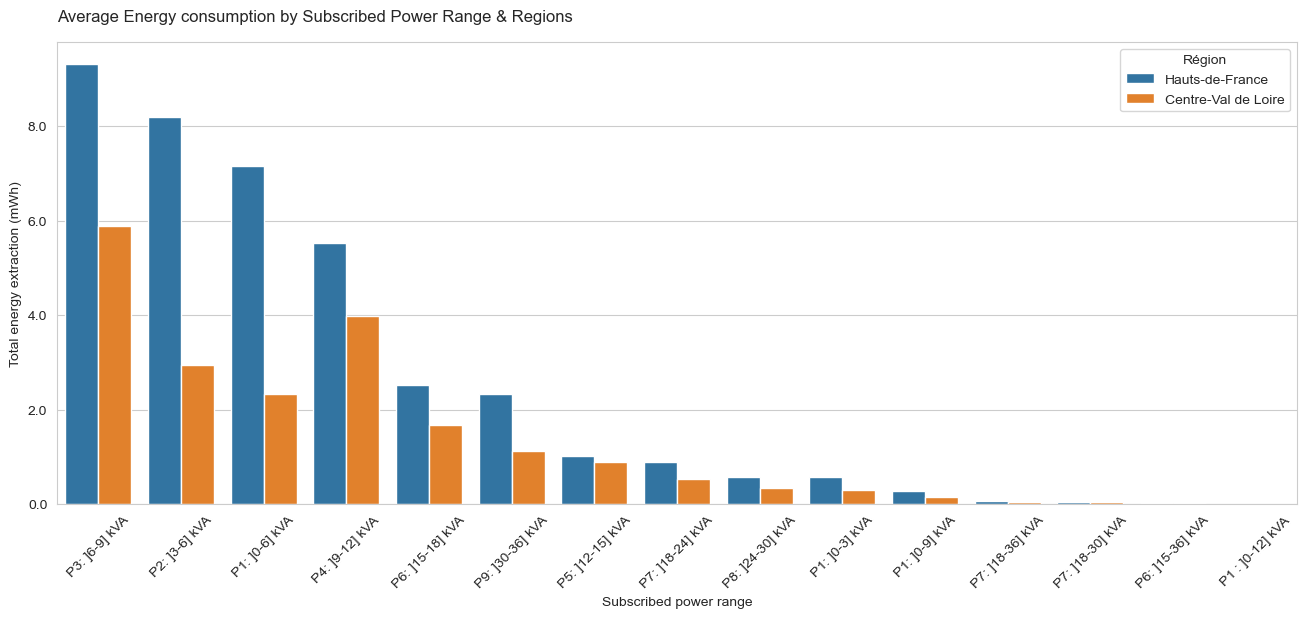

In [27]:
# Energy consumption by Subscribed power range & region
df_cons_p_sans0 = df[df['Plage de puissance souscrite'] != 'P0: Total <= 36 kVA']
enr_sub_pow_range = df_cons_p_sans0.groupby(['Région', 'Plage de puissance souscrite'])\
                                                        [['Total énergie soutirée (Wh)']].sum().reset_index()
enr_sub_pow_range['Total énergie soutirée (Wh)'] = enr_sub_pow_range['Total énergie soutirée (Wh)'].apply(lambda x : x / 731 )
enr_sub_pow_range = enr_sub_pow_range.sort_values(by='Total énergie soutirée (Wh)', ascending=False)

# Plot the graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=enr_sub_pow_range, x='Plage de puissance souscrite', y='Total énergie soutirée (Wh)', 
            hue='Région', errorbar=None)
plt.title('Average Energy consumption by Subscribed Power Range & Regions', pad=15, loc='left')
plt.ylabel('Total energy extraction (mWh)')
plt.xlabel('Subscribed power range')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.show

### 3.1. Energy consumption by Profiles & Subscribed Power Range

In [28]:
# We group by the dataframe by 'Profil' and 'Plage de puissance souscrite' to find the total energy consumption
tot_energy_cons = df.groupby(['Profil', 'Plage de puissance souscrite', 'Région'])\
                        .agg(**{'total_enr_cons': ('Total énergie soutirée (Wh)', lambda x: x.sum())}).reset_index()
tot_energy_cons.sort_values(by='total_enr_cons', ascending=False)

Profil Plage de puissance souscrite               Région  \
109    RES2 (+ RES5)          P0: Total <= 36 kVA      Hauts-de-France   
108    RES2 (+ RES5)          P0: Total <= 36 kVA  Centre-Val de Loire   
87   RES1 (+ RES1WE)          P0: Total <= 36 kVA      Hauts-de-France   
91   RES1 (+ RES1WE)                P2: ]3-6] kVA      Hauts-de-France   
111    RES2 (+ RES5)                P1: ]0-6] kVA      Hauts-de-France   
..               ...                          ...                  ...   
48              PRO3              P5: ]12-15] kVA  Centre-Val de Loire   
47              PRO3               P4: ]9-12] kVA      Hauts-de-France   
46              PRO3               P4: ]9-12] kVA  Centre-Val de Loire   
44              PRO3                P1: ]0-9] kVA  Centre-Val de Loire   
82              PRO5              P8: ]24-30] kVA  Centre-Val de Loire   

       total_enr_cons  
109 13516728137925.00  
108  7762310133783.00  
87   5757155077680.00  
91   5547724289275.00  
111  4967291850867.00  
..                ...  
48               0.00  
47               0.00  
46               0.00  
44               0.00  
82               0.00  

[164 rows x 4 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

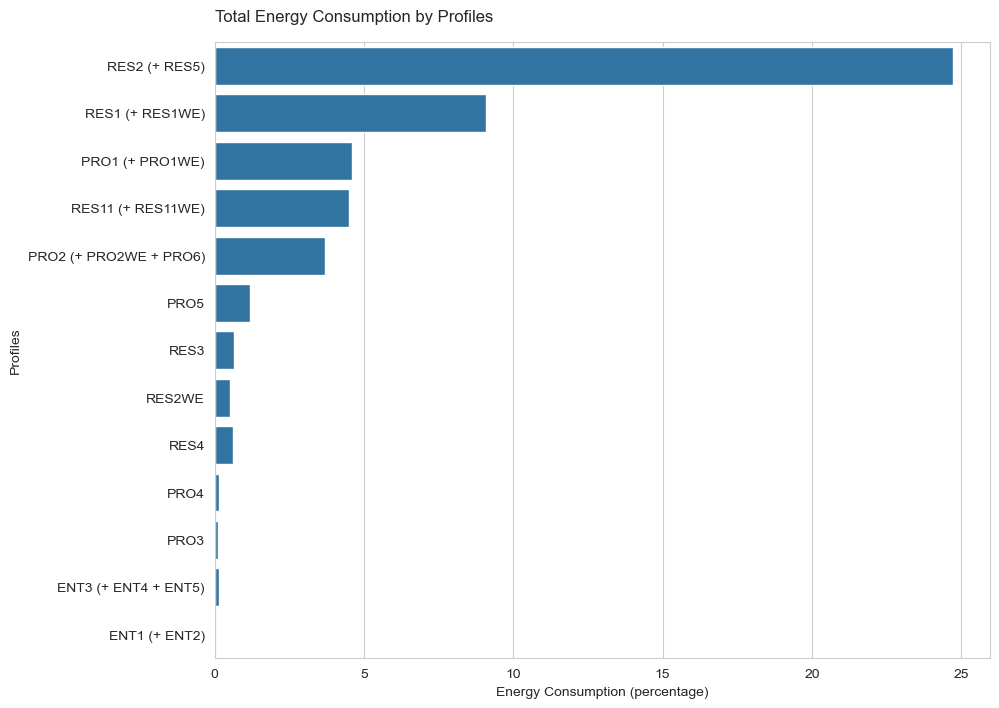

In [29]:
# We filter the tot_energy_cons by 'Plage de puissance souscrite=P0: Total <= 36 kVA' because it is the total consumption for each profile

tot_energy_cons_P0 = tot_energy_cons[tot_energy_cons['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA']
tot_energy_cons_P0 = tot_energy_cons_P0.sort_values(by='total_enr_cons', ascending=False)
sum_tot_energy = tot_energy_cons_P0['total_enr_cons'].sum()
tot_energy_cons_P0['percentage'] = tot_energy_cons_P0['total_enr_cons'].\
                                                                apply(lambda x: (x / sum_tot_energy) * 100)


# Plot a bar graph to display the distribution of extraction points by profile
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=tot_energy_cons_P0, x='percentage', y='Profil', errorbar=None)
plt.title('Total Energy Consumption by Profiles', pad=15, loc='left')
plt.ylabel('Profiles')
plt.xlabel('Energy Consumption (percentage)')
plt.show

Almost half of the total energy consumption comes from RES2 profile while RES1 profile follow it in the second place. 

#### 3.2.1. Energy Consumption of Pro Profiles

First of all, in order to automate the operations, we define a function for extracting the number the energy consumtion by profile.

In [30]:
# Define a function to extract the energy consumption

def energy_cons_prof(profile):
    energy_cons = tot_energy_cons[tot_energy_cons['Profil'] == profile]
    energy_cons = energy_cons.iloc[1:, :]
    energy_cons = energy_cons.sort_values(by='total_enr_cons', ascending=False)
    return energy_cons

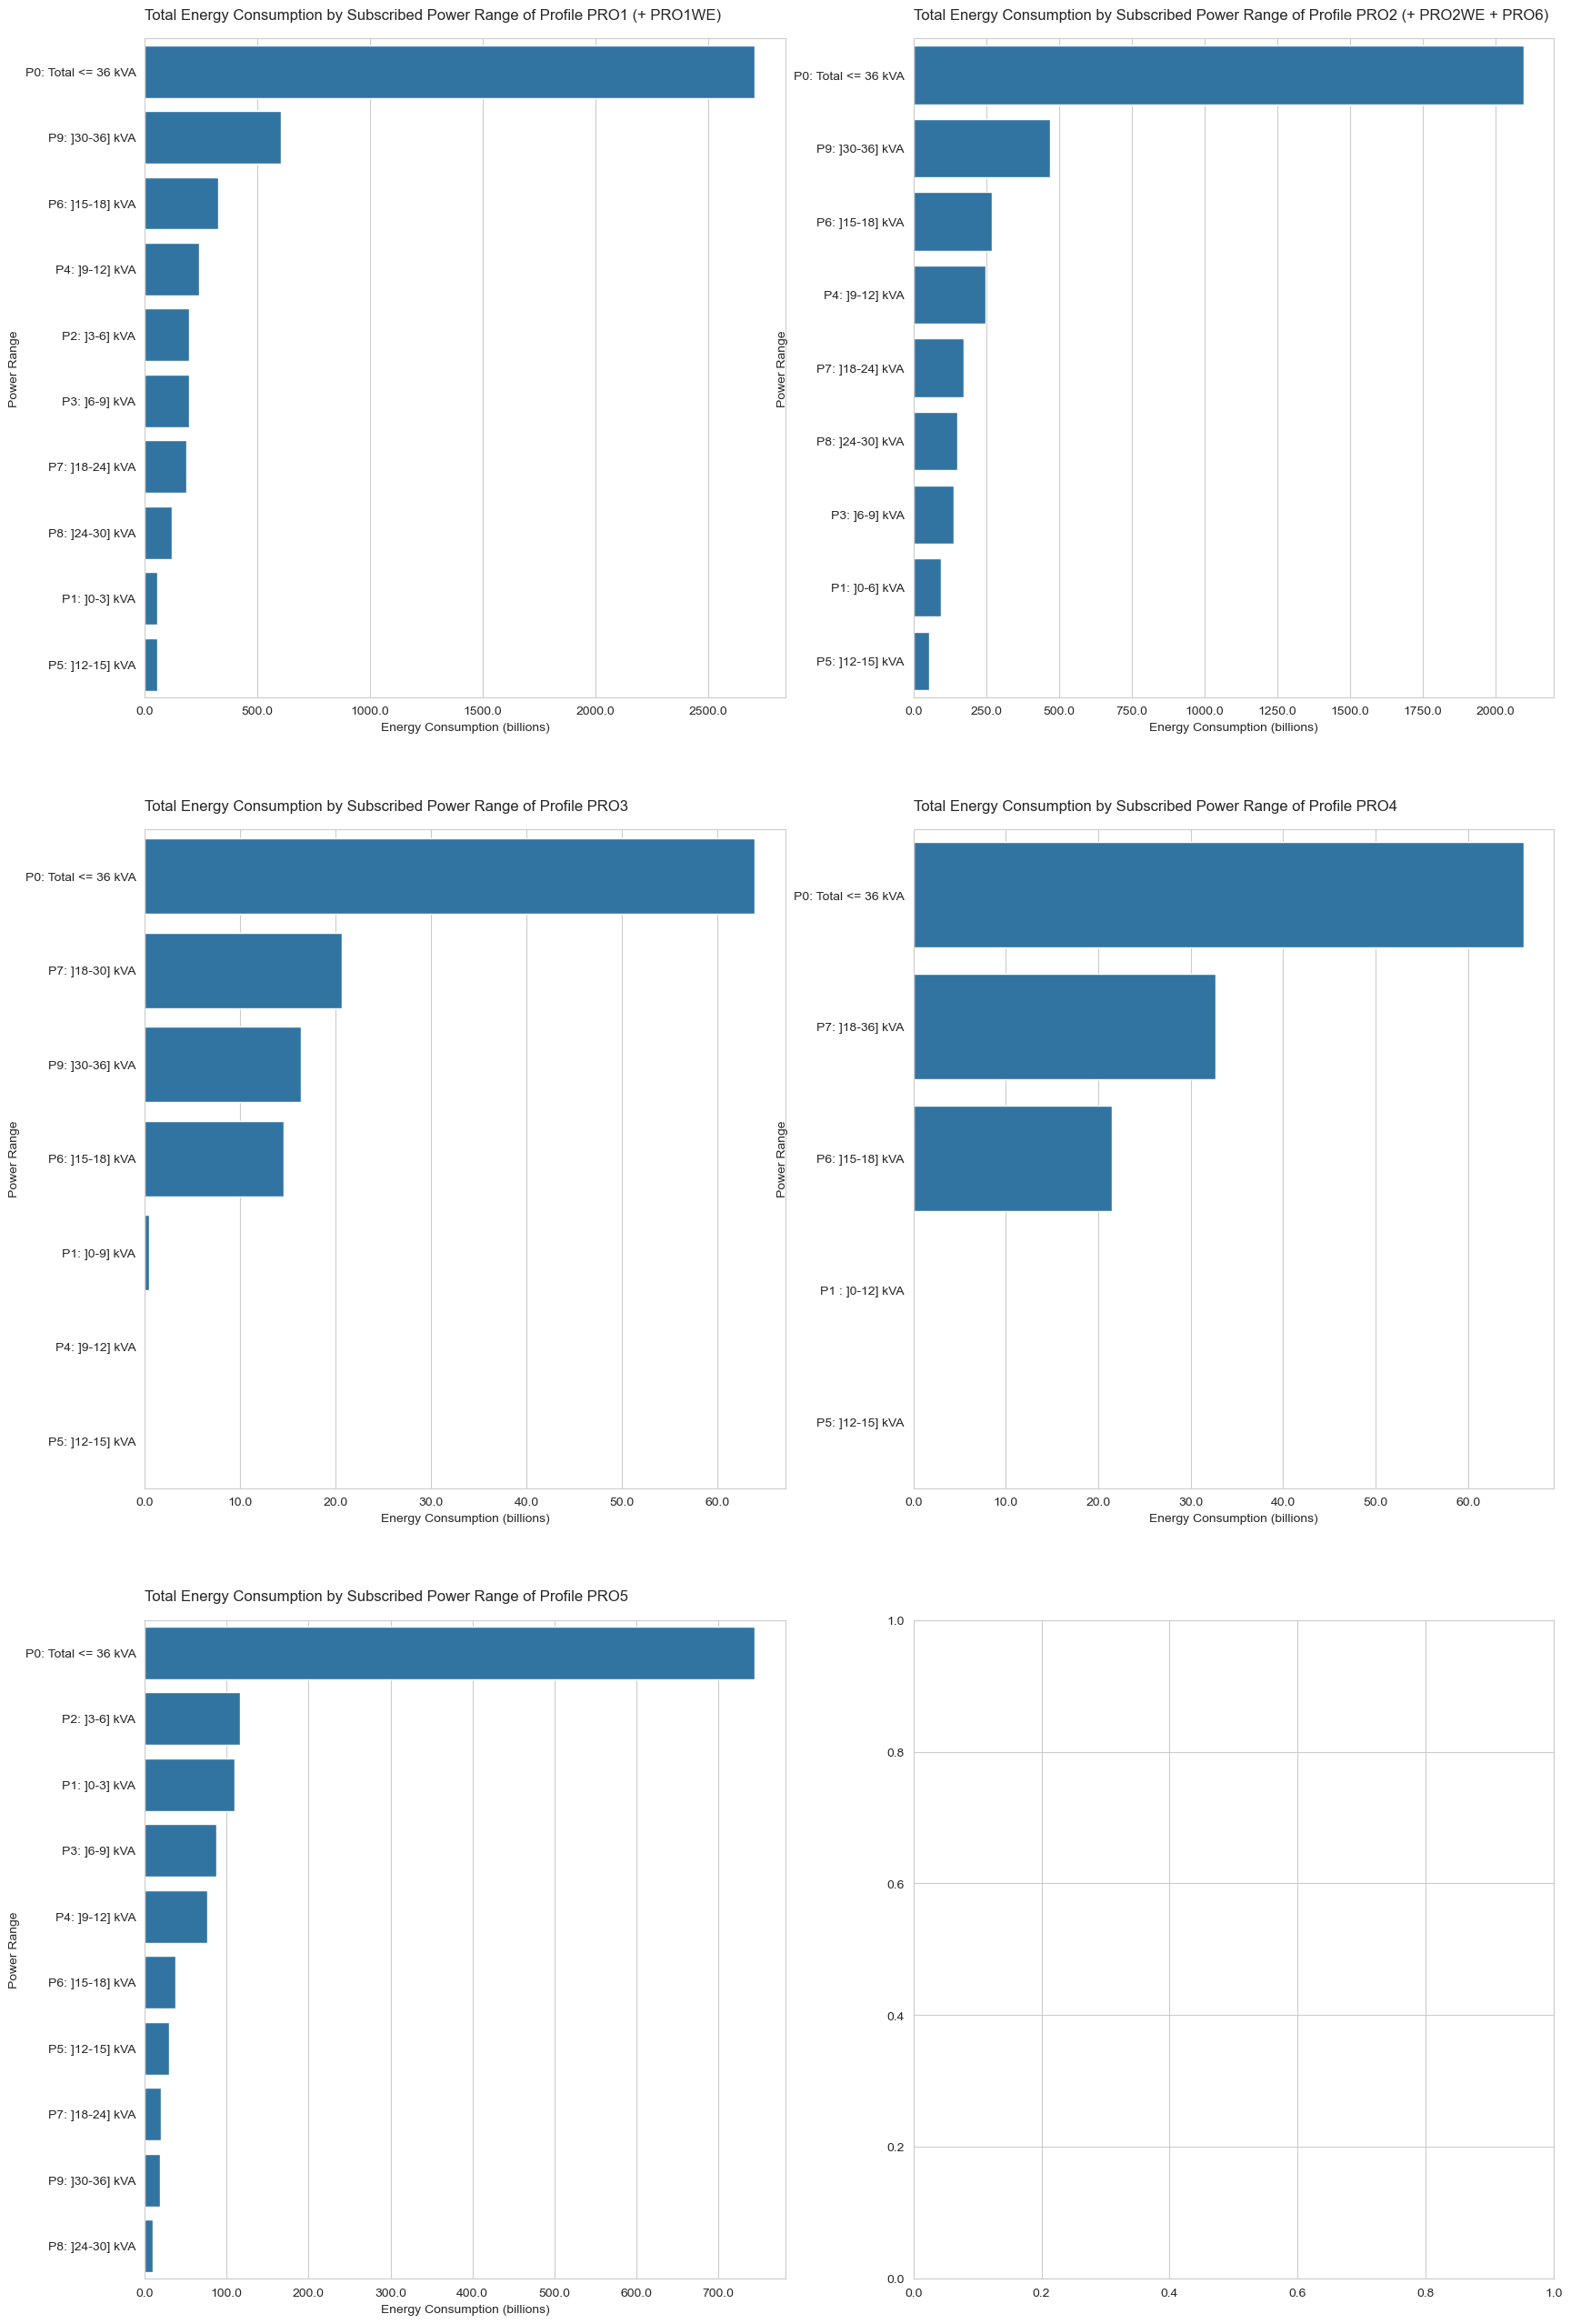

In [31]:
# Plot the bar graphics to demonstrate the distributions of energy consumtion by PRO profiles
lst_profiles_pro = ['PRO1 (+ PRO1WE)', 'PRO2 (+ PRO2WE + PRO6)', 'PRO3', 'PRO4', 'PRO5']
fig, ax = plt.subplots(3, 2, figsize=(20, 32))
for i, j in enumerate(lst_profiles_pro):
    ax = plt.subplot(3,2,i+1)
    sns.barplot(data=energy_cons_prof(j), x='total_enr_cons', y='Plage de puissance souscrite', errorbar=None)
    ax.set_title('Total Energy Consumption by Subscribed Power Range of Profile '+j+'', pad=15, loc='left')
    ax.set_ylabel('Power Range')
    ax.set_xlabel('Energy Consumption (billions)')
    ax.xaxis.set_major_formatter(FuncFormatter(billions_formatter))

#### 3.2.1. Energy Consumption of Residential Profiles

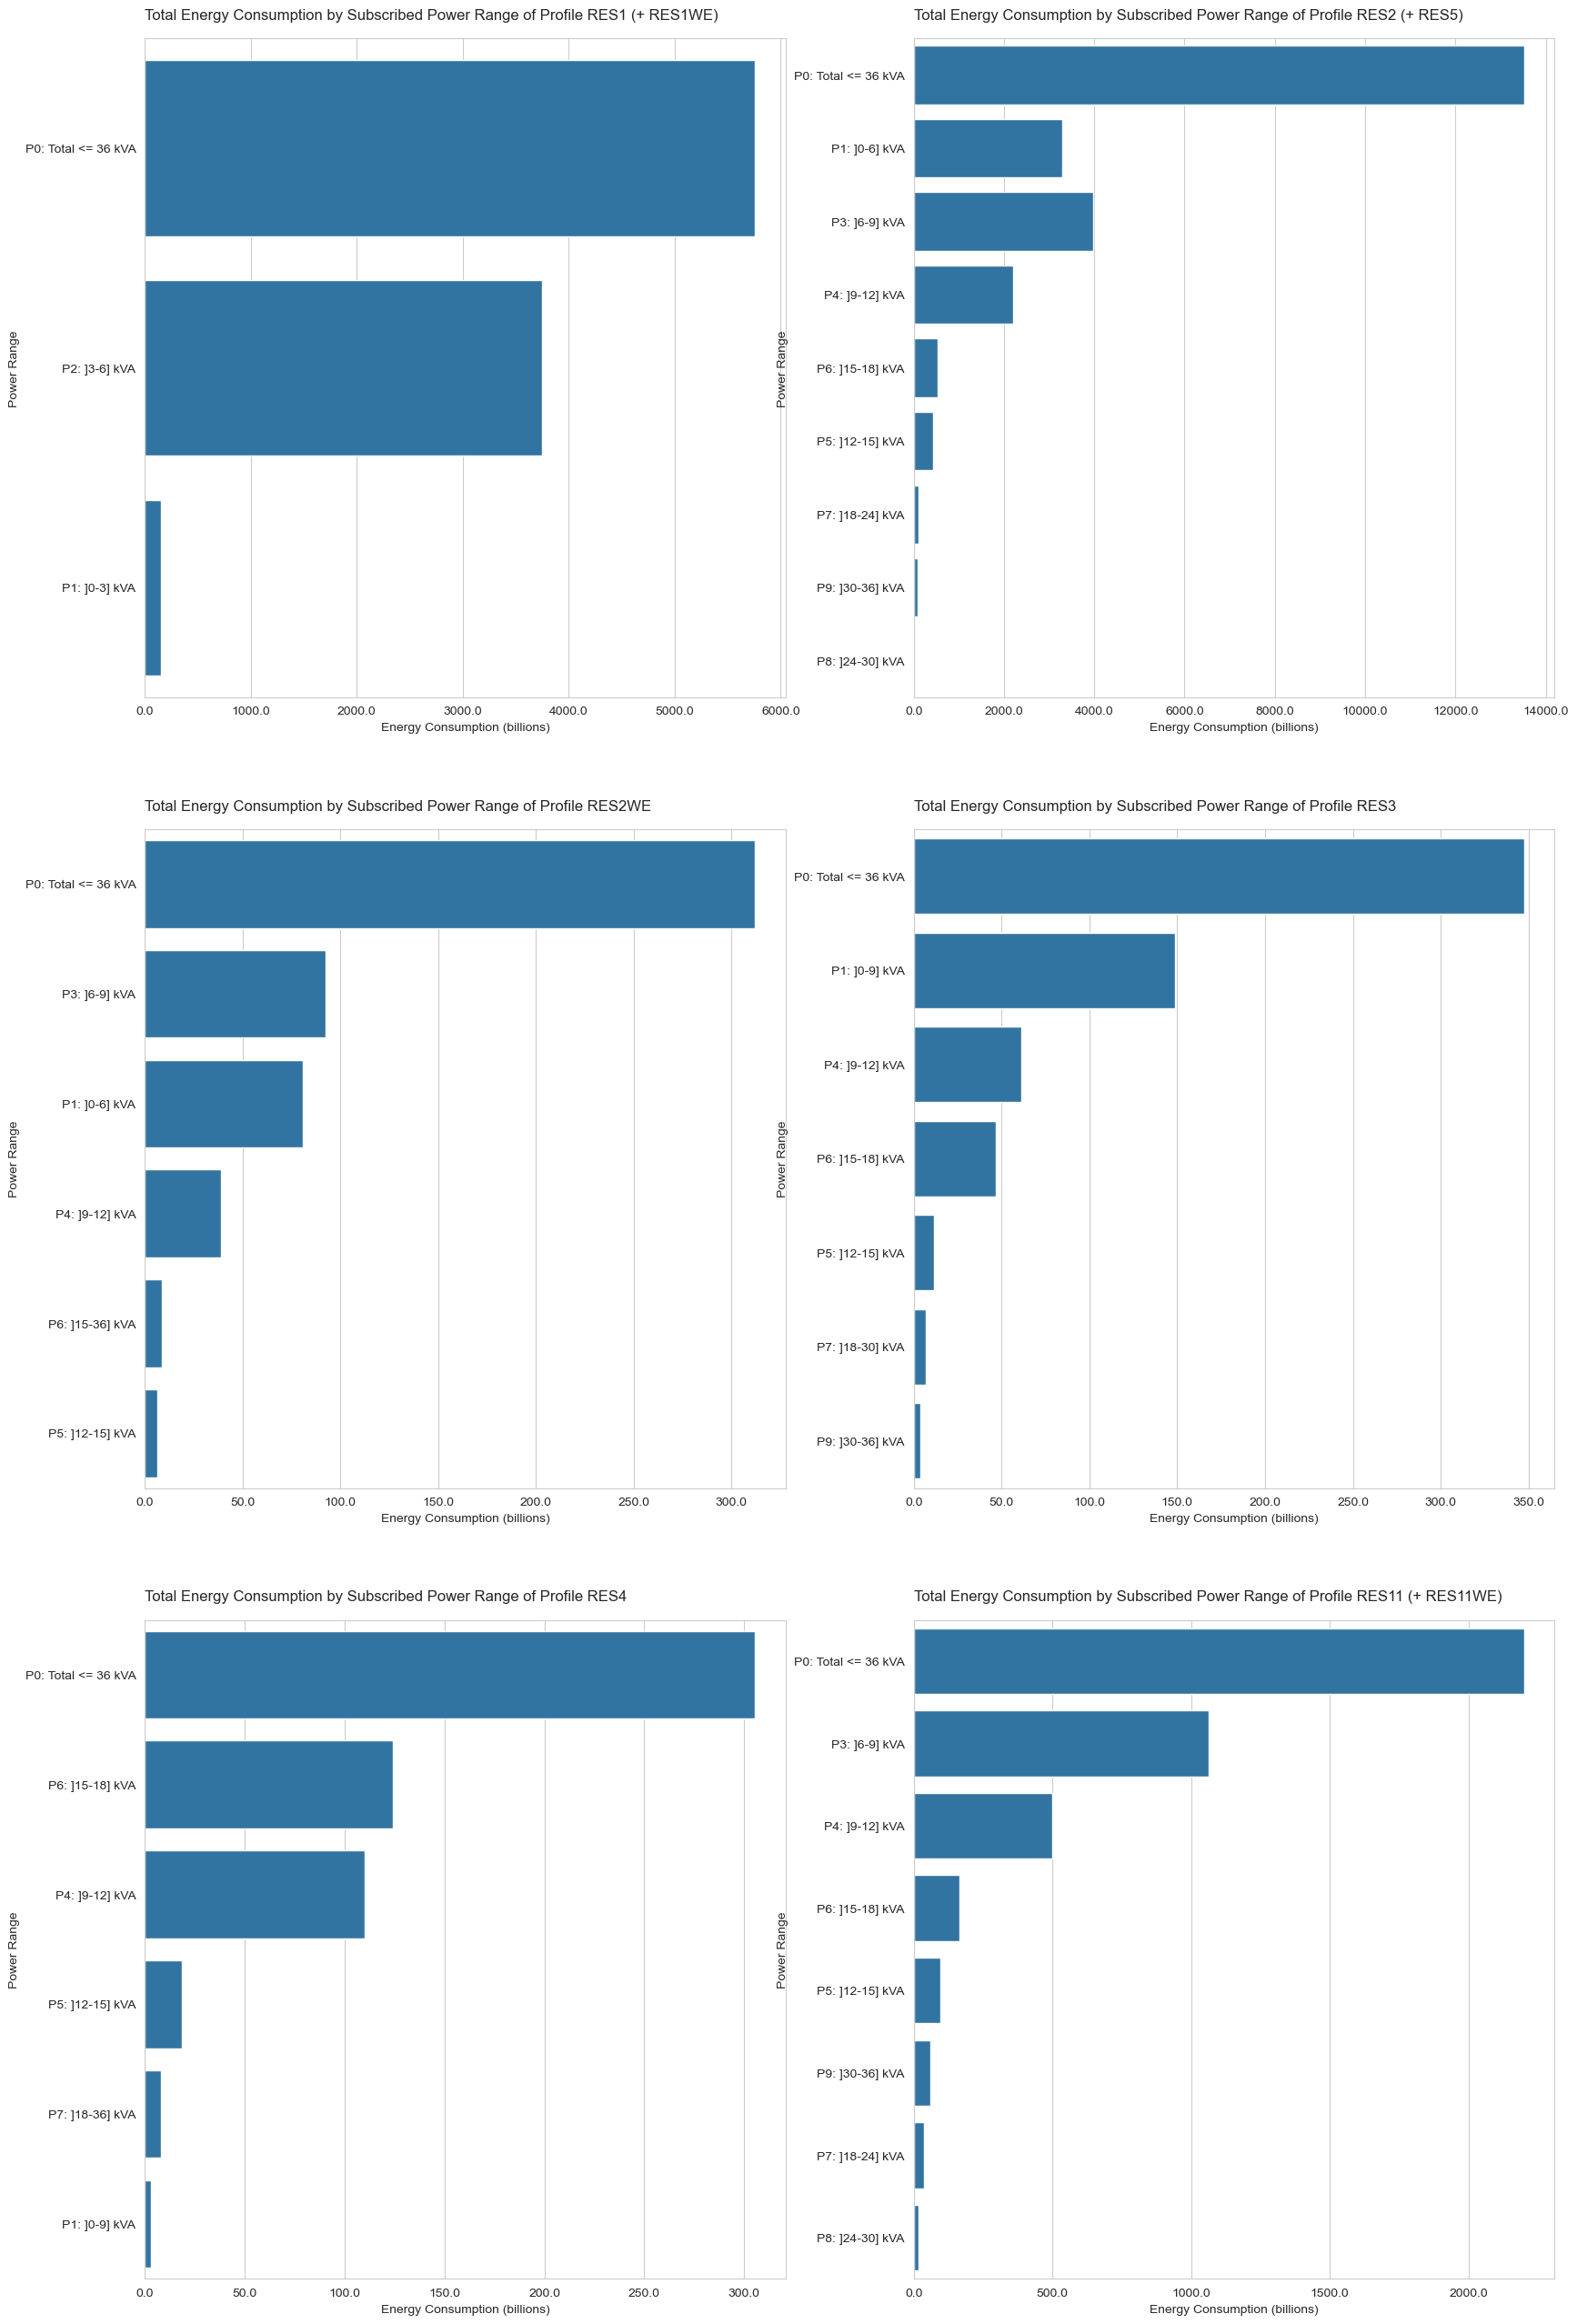

In [32]:
# Plot the bar graphics to demonstrate the distributions of energy consumtion by RES profiles

lst_profiles_res = ['RES1 (+ RES1WE)', 'RES2 (+ RES5)', 'RES2WE', 'RES3', 'RES4', 'RES11 (+ RES11WE)']
fig, ax = plt.subplots(3, 2, figsize=(20, 32))
for i, j in enumerate(lst_profiles_res):
    ax = plt.subplot(3,2,i+1)
    sns.barplot(data=energy_cons_prof(j), x='total_enr_cons', y='Plage de puissance souscrite', errorbar=None)
    ax.set_title('Total Energy Consumption by Subscribed Power Range of Profile '+j+'', pad=15, loc='left')
    ax.set_ylabel('Power Range')
    ax.set_xlabel('Energy Consumption (billions)')
    ax.xaxis.set_major_formatter(FuncFormatter(billions_formatter))

In [33]:
# Energy Consumtion of profile 'ENT1 (+ ENT2)'
tot_energy_cons[tot_energy_cons['Profil'] == 'ENT1 (+ ENT2)']

Profil Plage de puissance souscrite               Région  \
0  ENT1 (+ ENT2)          P0: Total <= 36 kVA  Centre-Val de Loire   
1  ENT1 (+ ENT2)          P0: Total <= 36 kVA      Hauts-de-France   

   total_enr_cons  
0            0.00  
1            0.00

In [34]:
# Energy Consumtion of profile 'ENT3 (+ ENT4 + ENT5)'
tot_energy_cons[tot_energy_cons['Profil'] == 'ENT3 (+ ENT4 + ENT5)']


Profil Plage de puissance souscrite               Région  \
2  ENT3 (+ ENT4 + ENT5)          P0: Total <= 36 kVA  Centre-Val de Loire   
3  ENT3 (+ ENT4 + ENT5)          P0: Total <= 36 kVA      Hauts-de-France   

   total_enr_cons  
2  55525154070.00  
3  61909023266.00

### 3.2. Number of extraction points

In [35]:
# We group by the dataframe by 'Profil' and 'Plage de puissance souscrite' to find the max number of points
num_point_soutirage = df.groupby(['Profil', 'Plage de puissance souscrite'])\
                        .agg(**{'max_number': ('Nb points soutirage', lambda x: x.max())}).reset_index()
num_point_soutirage.sort_values(by='max_number', ascending=False)

Profil Plage de puissance souscrite  max_number
43  RES1 (+ RES1WE)          P0: Total <= 36 kVA     1235474
54    RES2 (+ RES5)          P0: Total <= 36 kVA     1187601
45  RES1 (+ RES1WE)                P2: ]3-6] kVA     1142371
55    RES2 (+ RES5)                P1: ]0-6] kVA      633117
56    RES2 (+ RES5)                P3: ]6-9] kVA      358690
..              ...                          ...         ...
22             PRO3                P1: ]0-9] kVA         127
30             PRO4              P5: ]12-15] kVA          85
23             PRO3               P4: ]9-12] kVA          76
0     ENT1 (+ ENT2)          P0: Total <= 36 kVA          73
24             PRO3              P5: ]12-15] kVA          16

[82 rows x 3 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

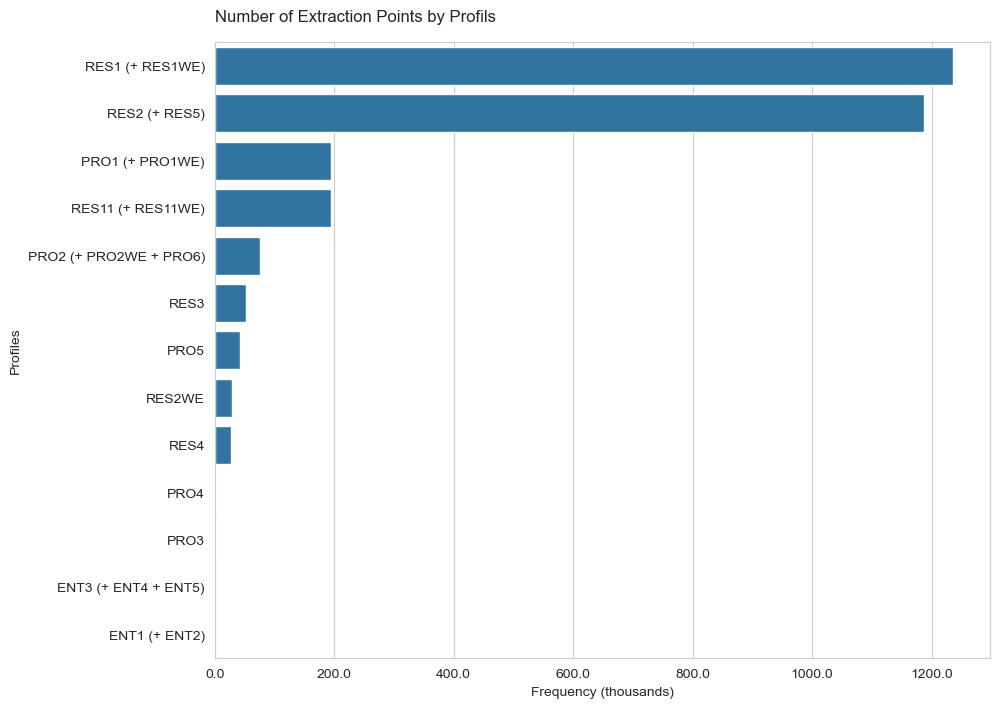

In [36]:
# We filter the df_col by 'Plage de puissance souscrite=P0: Total <= 36 kVA' because it is the total number for each profil
num_point_soutirage_P0 = num_point_soutirage[num_point_soutirage['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA']
num_point_soutirage_P0 = num_point_soutirage_P0.sort_values(by='max_number', ascending=False)

# We define a formatter thousand for displaying the numbers in format numeric
def thousand_formatter(x, pos):
    return f'{x / 1000}'

# Plot a bar graph to display the distribution of extraction points by profile
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=num_point_soutirage_P0, x='max_number', y='Profil', errorbar=None)
plt.title('Number of Extraction Points by Profils', pad=15, loc='left')
plt.ylabel('Profiles')
plt.xlabel('Frequency (thousands)')
ax.xaxis.set_major_formatter(FuncFormatter(thousand_formatter))
plt.show


We can say that most of the extraction points are residential. PRO1(+PROWE) and PRO2 (+PROWE+PRO6) have the most extraction points among the Pro Profiles.

#### 3.2.1. Extraction Points of Pro Profiles

First of all, in order to automate the operations, we define a function for extracting the number of extraction points by profile.

In [37]:
# Define a function to extract the number of extraction points
def pow_range_prof(prof):
    pow_range = num_point_soutirage[num_point_soutirage['Profil'] == prof]
    pow_range = pow_range.iloc[1:, :]
    pow_range = pow_range.sort_values(by='max_number', ascending=False)
    return pow_range

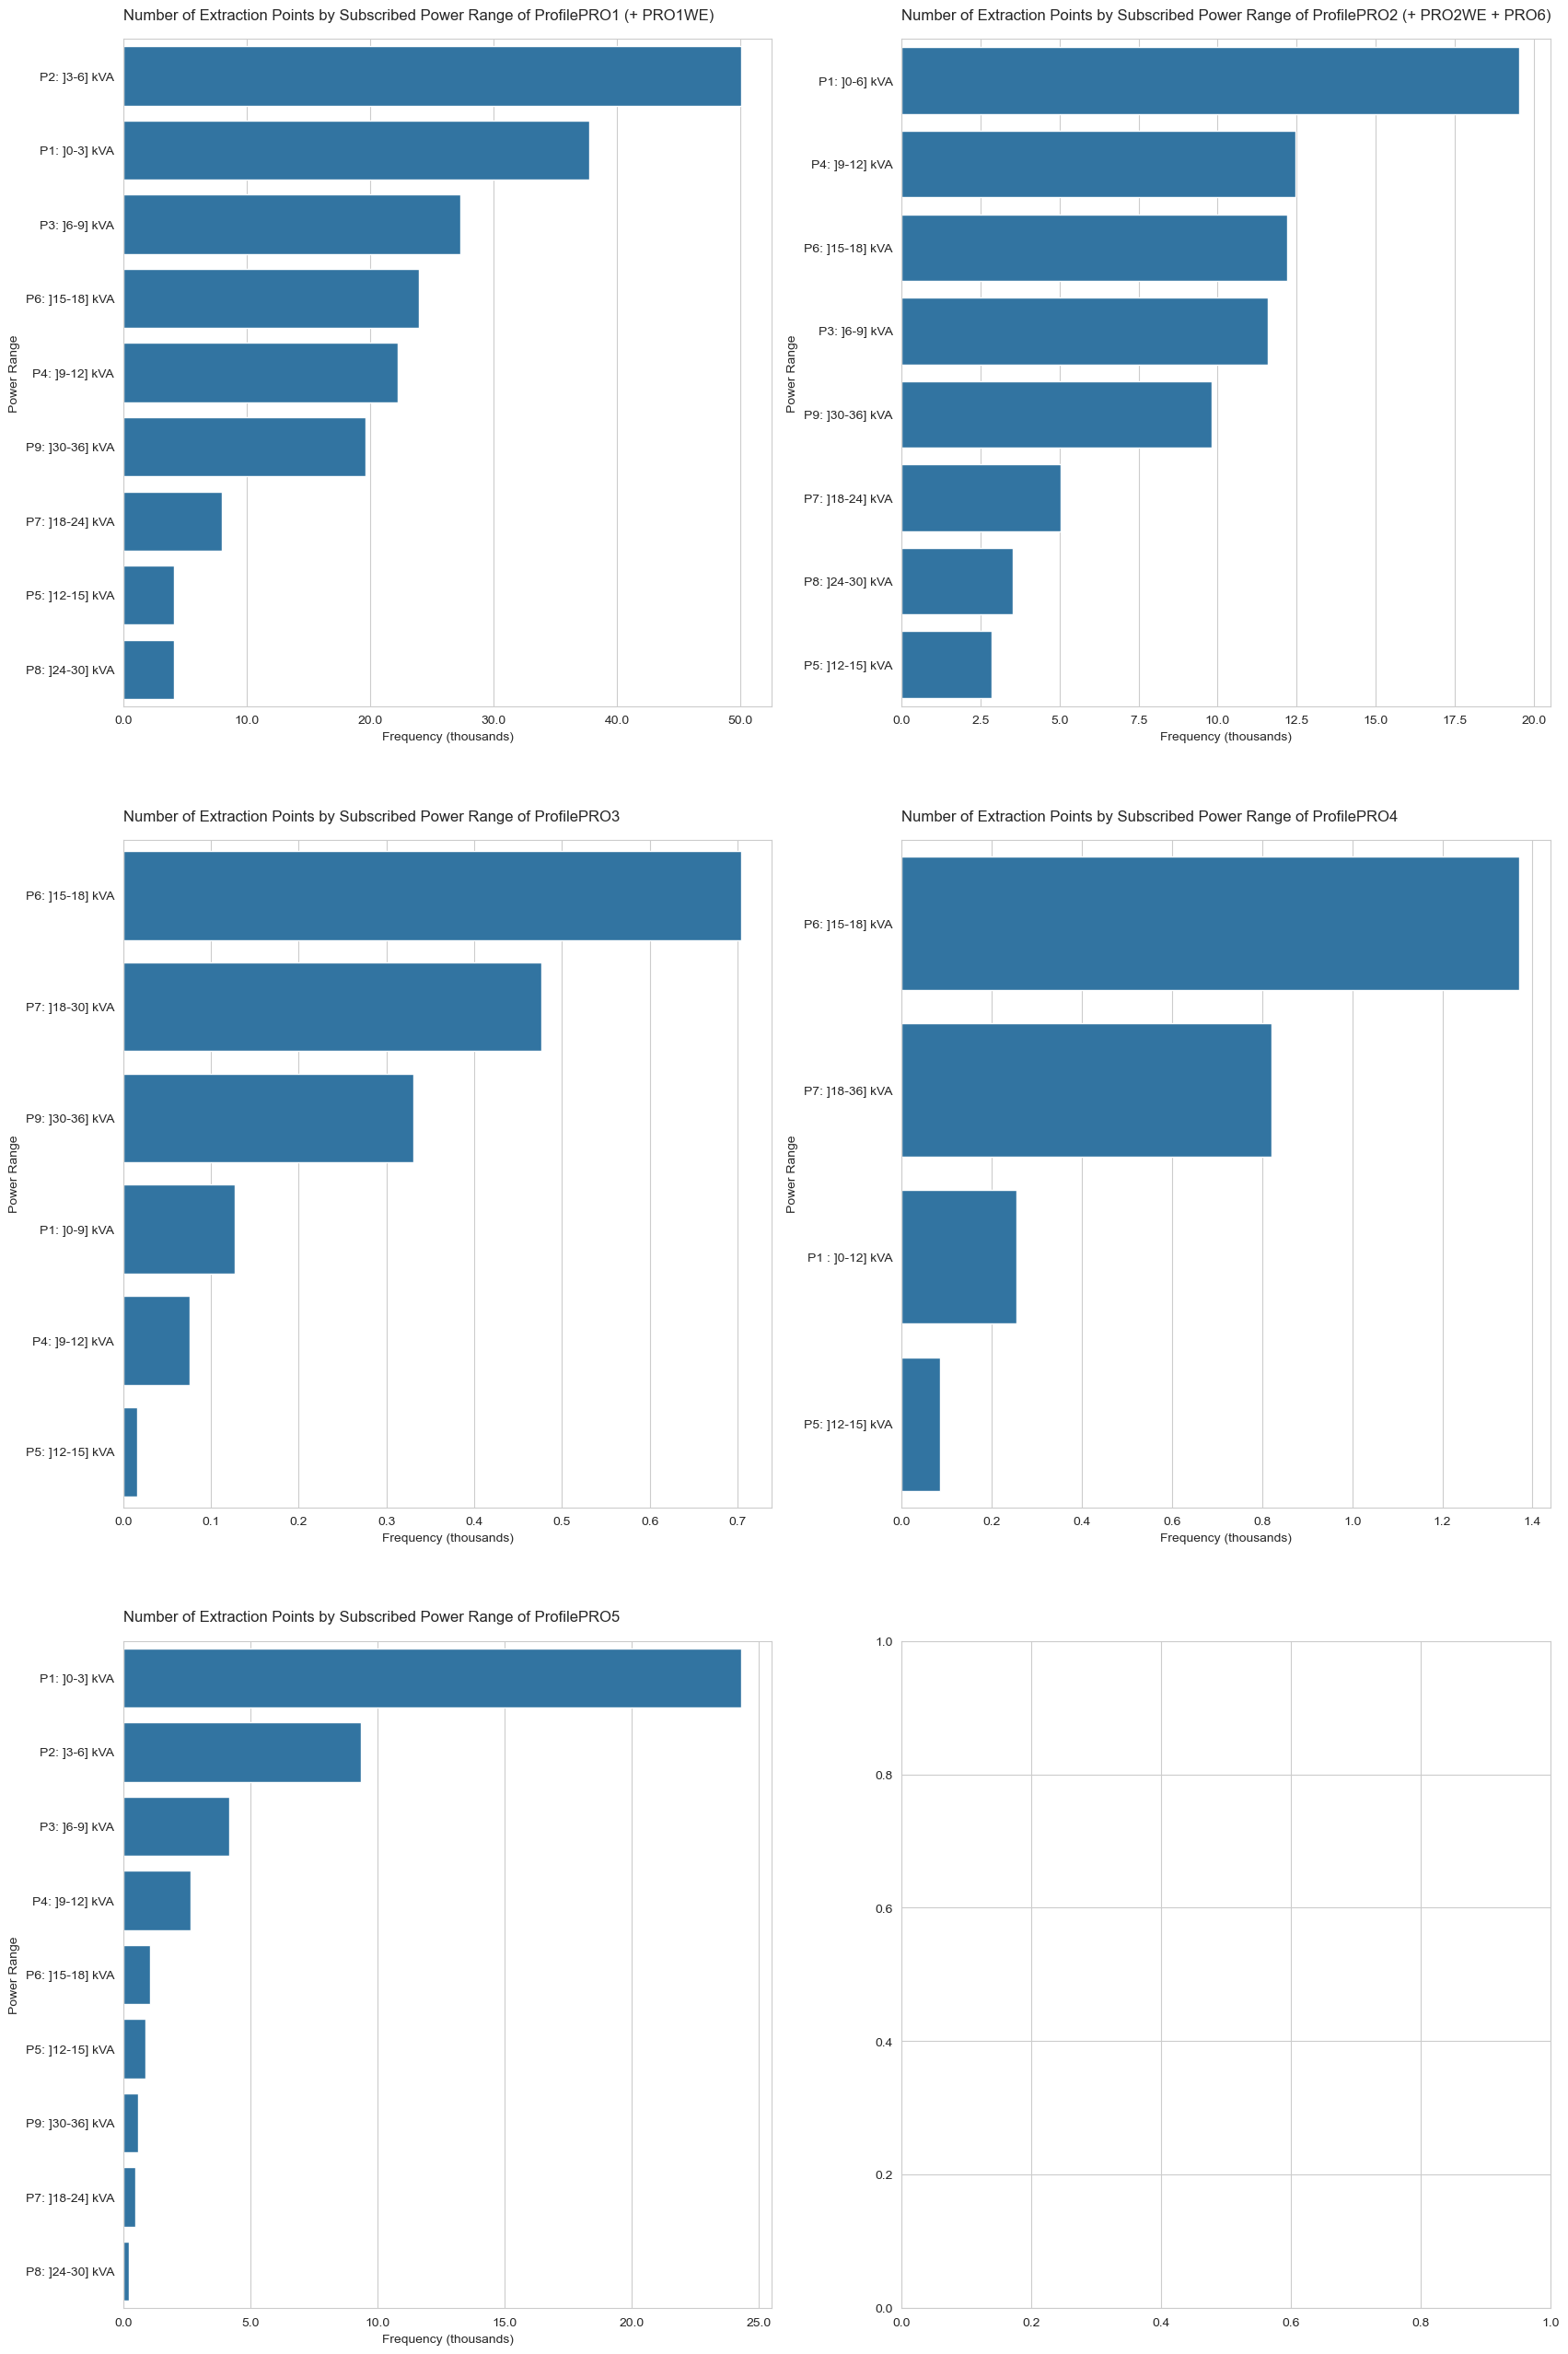

In [38]:
# Plot the bar graphics to demonstrate the distributions of extraction points by PRO profiles
lst_profiles_pro = ['PRO1 (+ PRO1WE)', 'PRO2 (+ PRO2WE + PRO6)', 'PRO3', 'PRO4', 'PRO5']
fig, ax = plt.subplots(3, 2, figsize=(20, 32))
for i, j in enumerate(lst_profiles_pro):
    ax = plt.subplot(3,2,i+1)
    sns.barplot(data=pow_range_prof(j), x='max_number', y='Plage de puissance souscrite', errorbar=None)
    ax.set_title('Number of Extraction Points by Subscribed Power Range of Profile'+j+'', pad=15, loc='left')
    ax.set_ylabel('Power Range')
    ax.set_xlabel('Frequency (thousands)')
    ax.xaxis.set_major_formatter(FuncFormatter(thousand_formatter))


Most of the PRO profiles are subscribed in profile PRO1(+PRO1WE) and there is a more balanced distribution according to subscribed power range for the PRO1 profiles. Most of the PRO3 and PRO4 profiles are subscribed in the power range greater than 15 kVa while most of the other profiles are subscribed in a power range between 0 and 12 kVa.

#### 3.2.2. Extraction Points of Residential Profiles

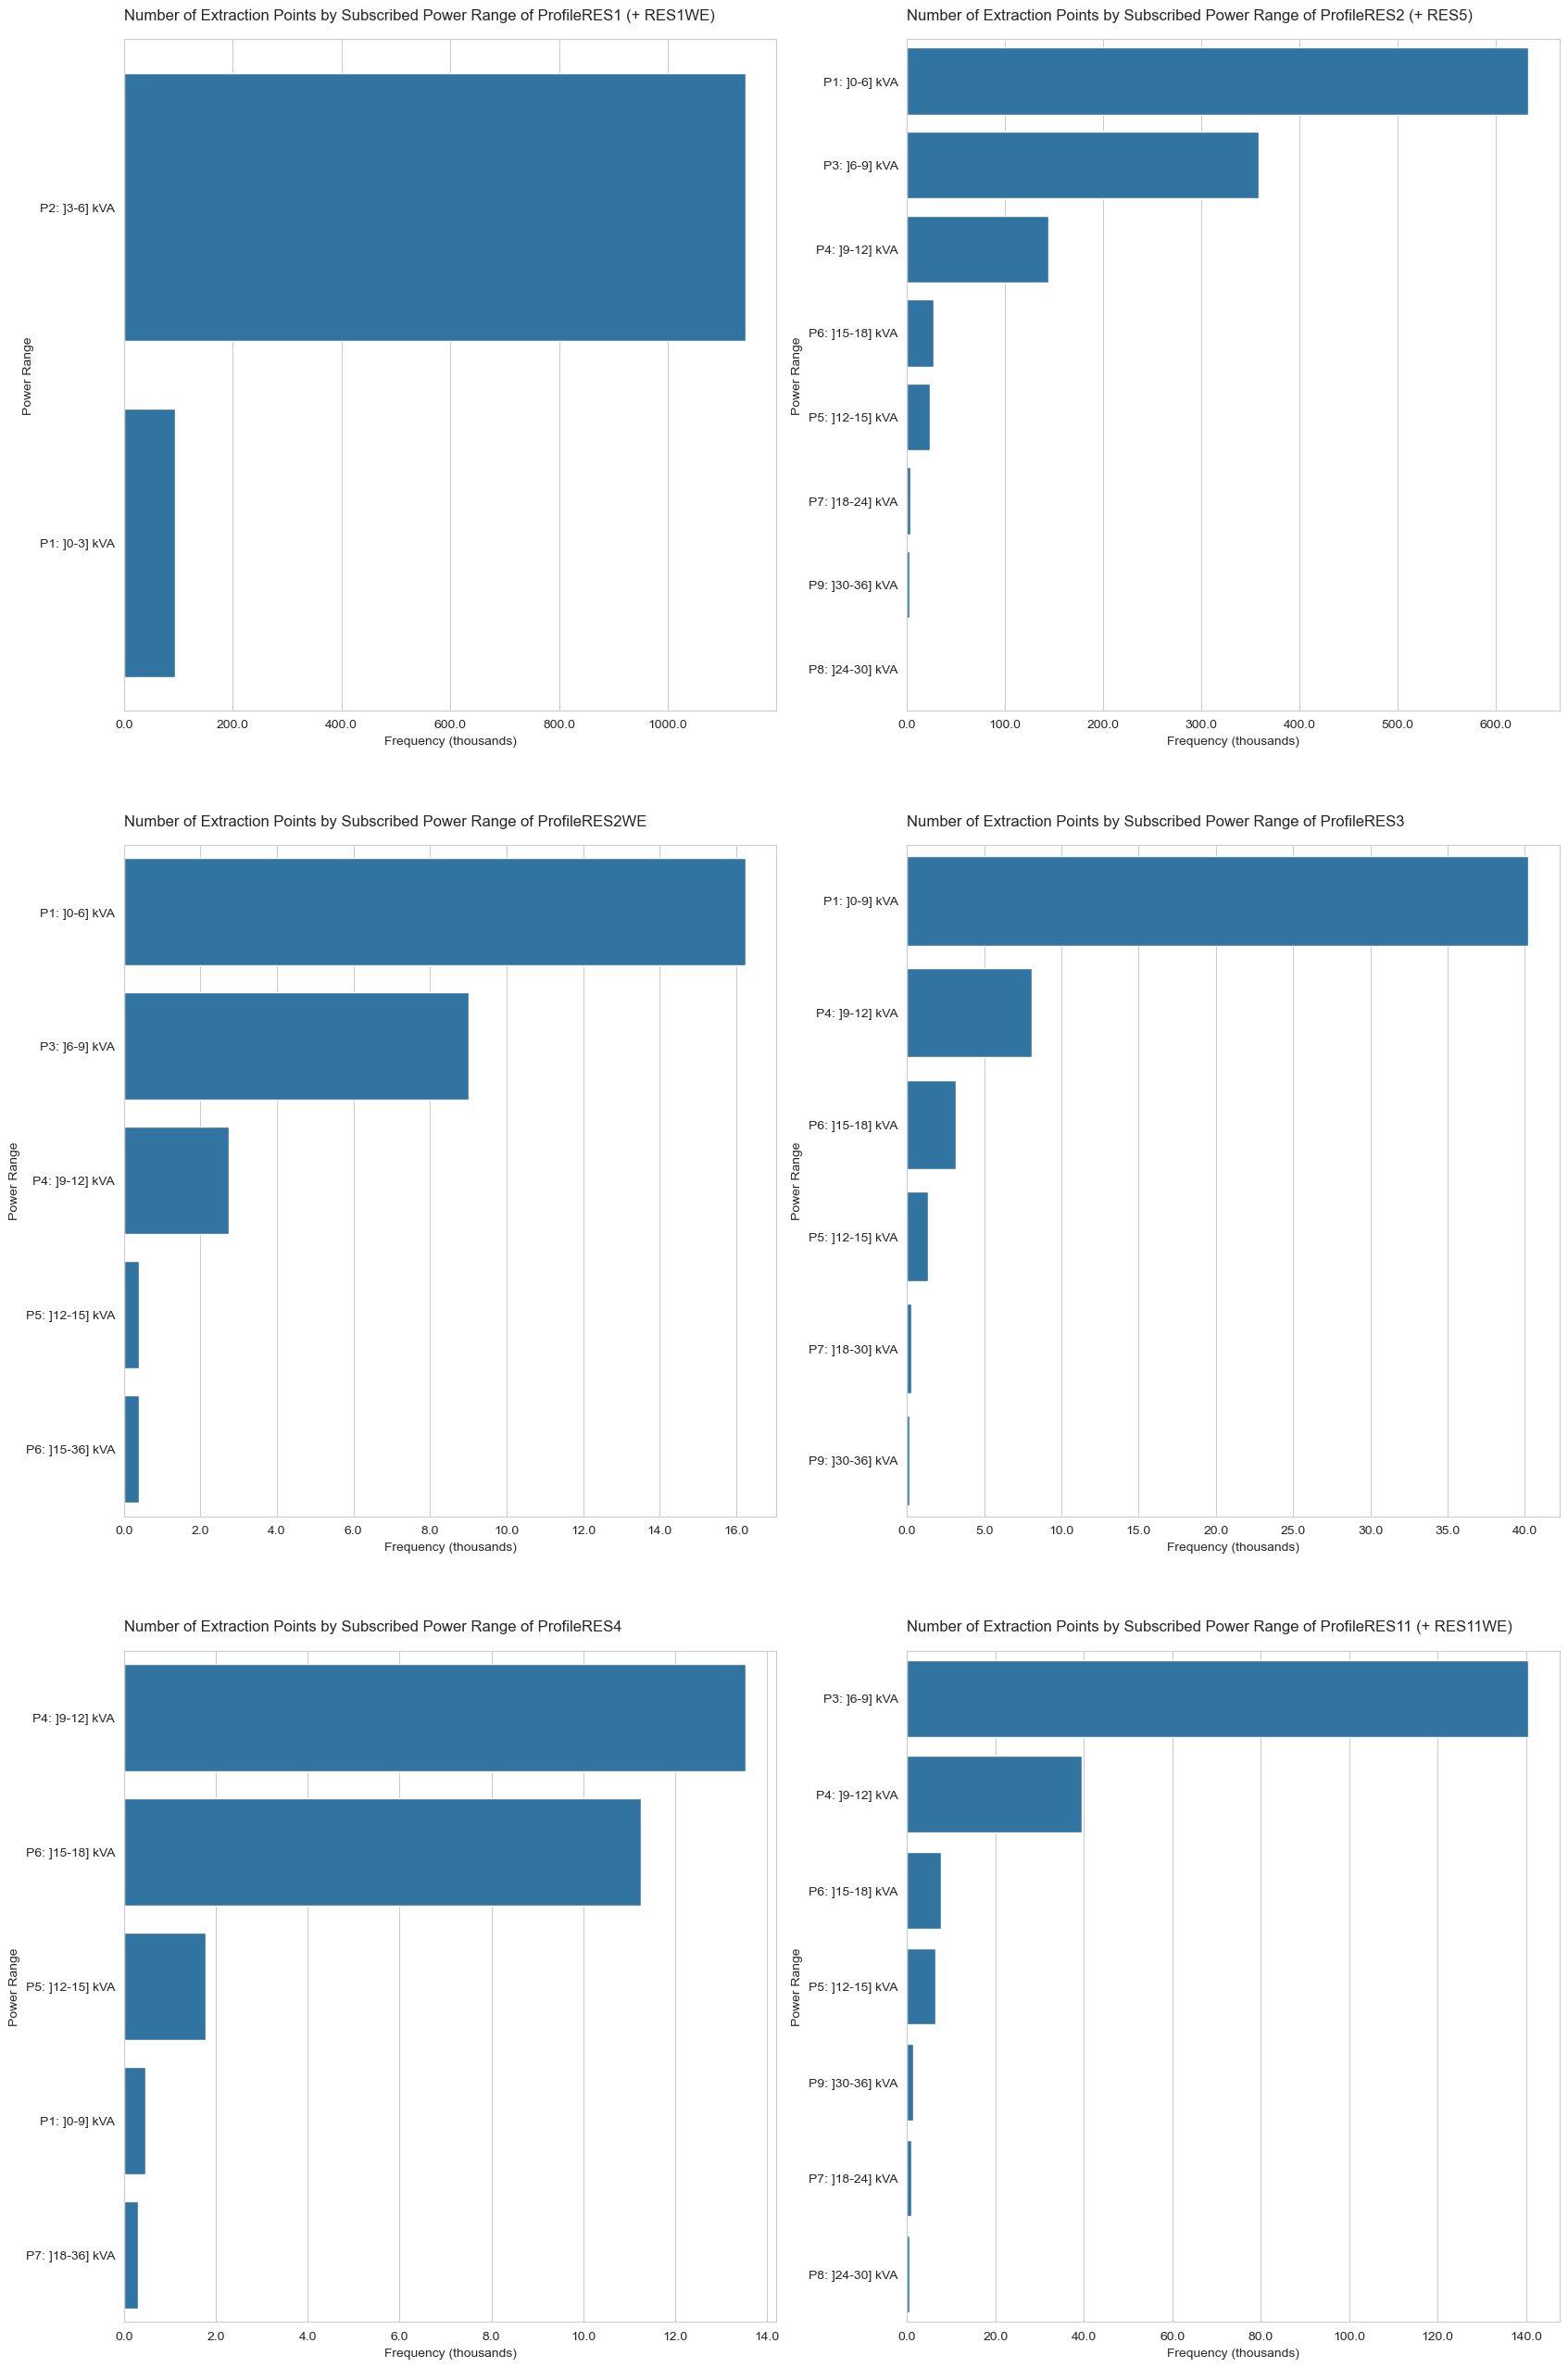

In [39]:
# Plot the bar graphics to demonstrate the distributions of extraction points by RES profiles

lst_profiles_res = ['RES1 (+ RES1WE)', 'RES2 (+ RES5)', 'RES2WE', 'RES3', 'RES4', 'RES11 (+ RES11WE)']
fig, ax = plt.subplots(3, 2, figsize=(20, 32))
for i, j in enumerate(lst_profiles_res):
    ax = plt.subplot(3,2,i+1)
    sns.barplot(data=pow_range_prof(j), x='max_number', y='Plage de puissance souscrite', errorbar=None)
    ax.set_title('Number of Extraction Points by Subscribed Power Range of Profile'+j+'', pad=15, loc='left')
    ax.set_ylabel('Power Range')
    ax.set_xlabel('Frequency (thousands)')
    ax.xaxis.set_major_formatter(FuncFormatter(thousand_formatter))

The profiles RES1(+RES1WE) and RES2(+RES5) represent a large portion of subscribers in total number of subscribers and most of them are subscribed in a power range between 0 and 6. 

In [40]:
# Number of extraction points of profile 'ENT1 (+ ENT2)'
num_point_soutirage[num_point_soutirage['Profil'] == 'ENT1 (+ ENT2)']

Profil Plage de puissance souscrite  max_number
0  ENT1 (+ ENT2)          P0: Total <= 36 kVA          73

In [41]:
# Number of extraction points of profile 'ENT3 (+ ENT4 + ENT5)'
num_point_soutirage[num_point_soutirage['Profil'] == 'ENT3 (+ ENT4 + ENT5)']

Profil Plage de puissance souscrite  max_number
1  ENT3 (+ ENT4 + ENT5)          P0: Total <= 36 kVA         897

## 4. Analyse of Weather Datas

First of all, we define a function to import the weather files year by year for each city. 

In [42]:
# Define a function in order to take the weather datas by ville and year
def meteo_ville(ville):
    df_ville_year = pd.DataFrame()
    for i in range(2022, 2025):
        ville = str(ville)
        year = str(i)
        
        # Define the path where the file is in
        chemin_file = r"C:\Users\HALILICELIKEL\Desktop\PROJET 3\meteo_2022_2024\export-"+ville+""+year+".csv"

        # Import the file
        df_new = pd.read_csv(chemin_file, sep=',', skiprows=3)
        df_ville_year = pd.concat([df_ville_year, df_new], axis=0)
    df_ville_year['DATE'] = pd.to_datetime(df_ville_year['DATE'])
    return df_ville_year


### 4.1. Compare the villes  of region 'Hauts-de-France' by essential weather indicators

We will now compare the weather of every cities in the two regions by different aspects in order to decide how we will create the weather variables of each region. 

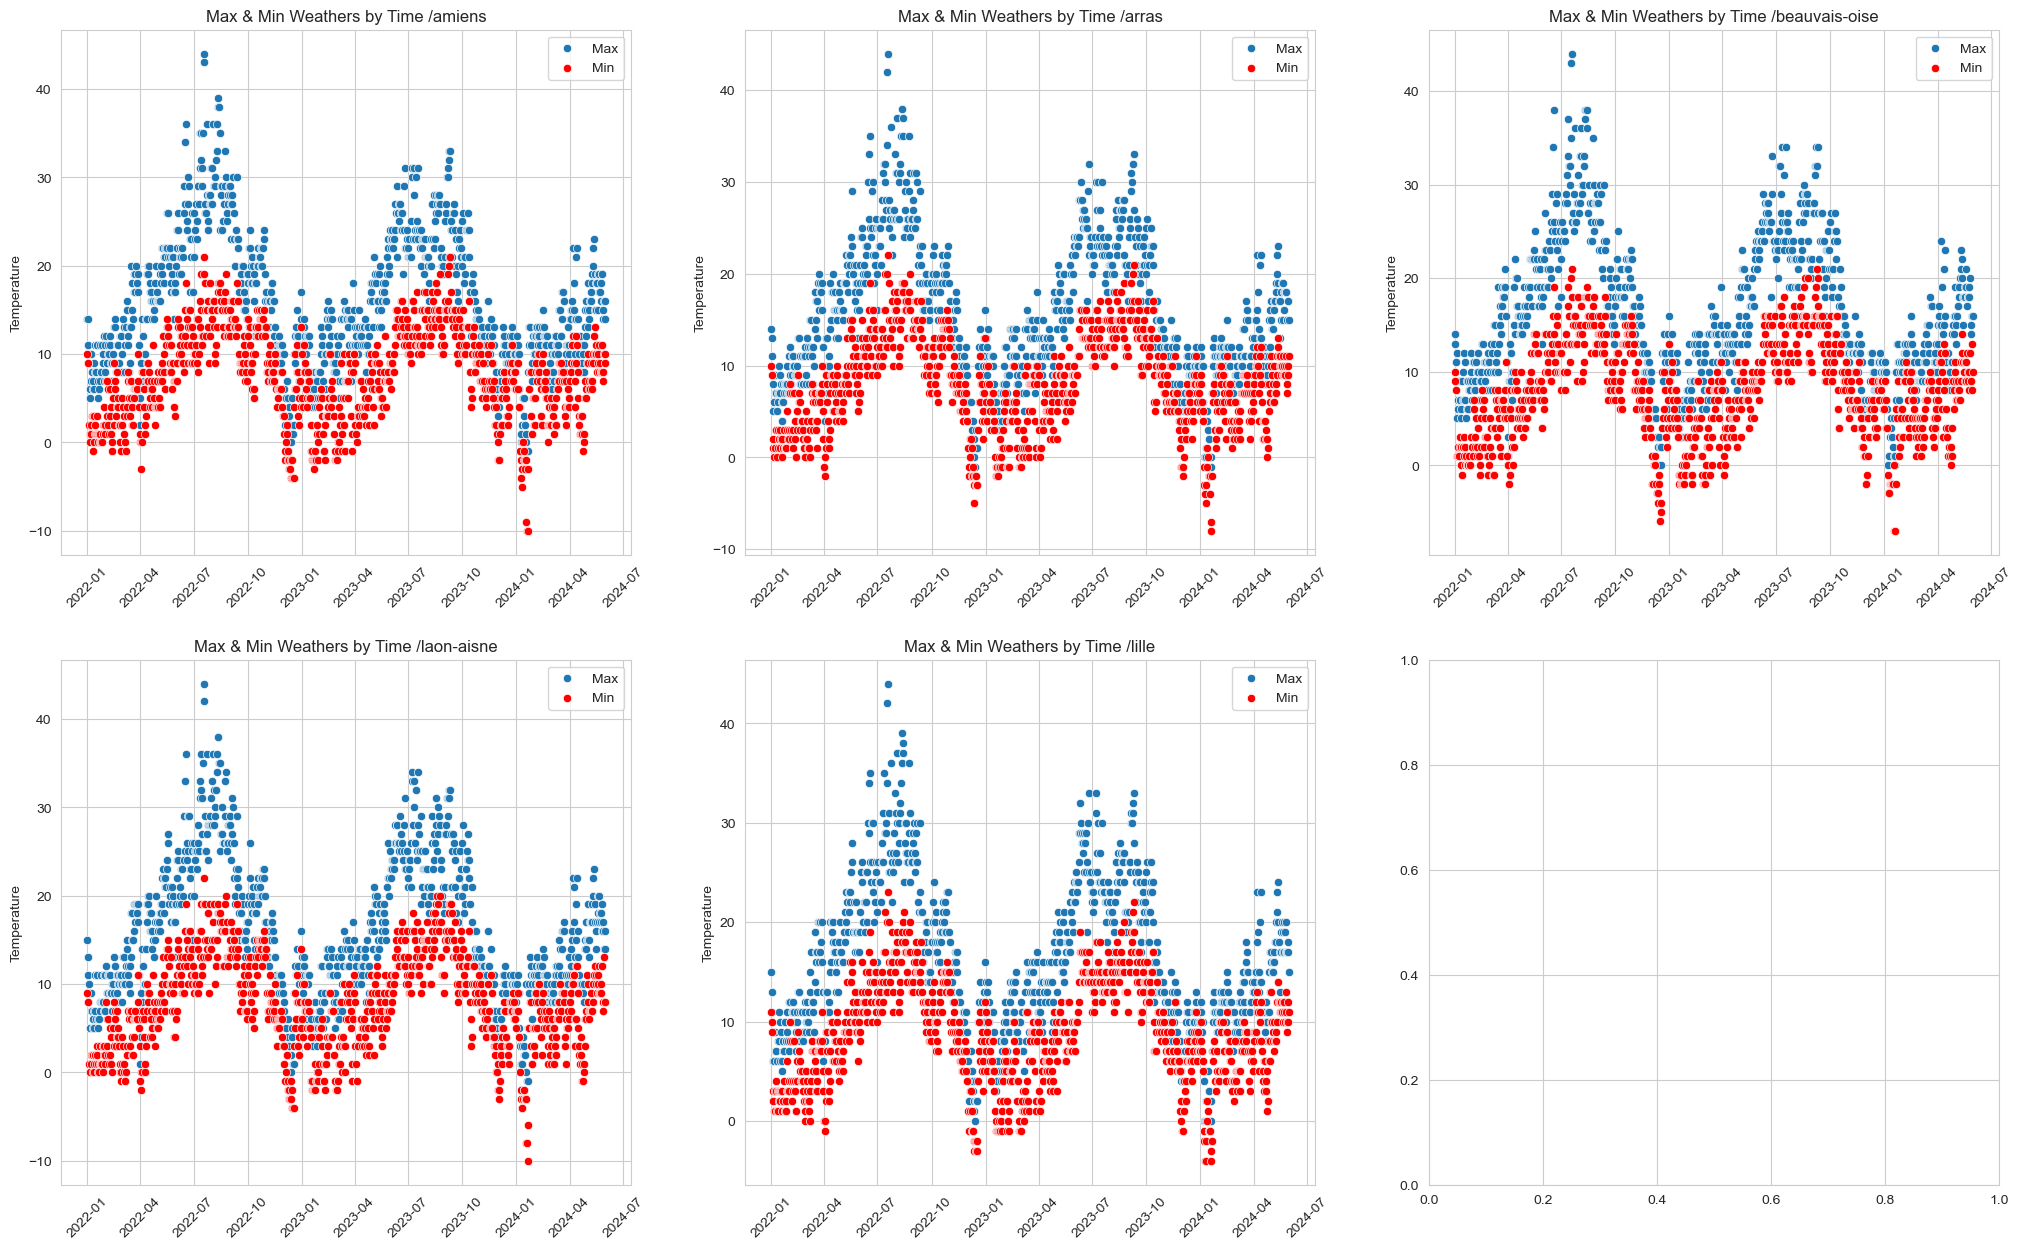

In [43]:
# Compare the villes by 'MAX_TEMPERATURE_C' and 'MIN_TEMPERATURE_C'
lst_ville_hdf = ['amiens', 'arras', 'beauvais-oise', 'laon-aisne', 'lille']

fig, ax = plt.subplots(2, 3, figsize=(25,15))
for i, j in enumerate(lst_ville_hdf):
    ax = plt.subplot(2,3, i+1)
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'MAX_TEMPERATURE_C', label='Max')
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'MIN_TEMPERATURE_C', label='Min', c='red')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('Max & Min Weathers by Time /'+j+'')
    ax.set_ylabel('Temperature')
    ax.set_xlabel('')
    ax.legend(loc='upper right')

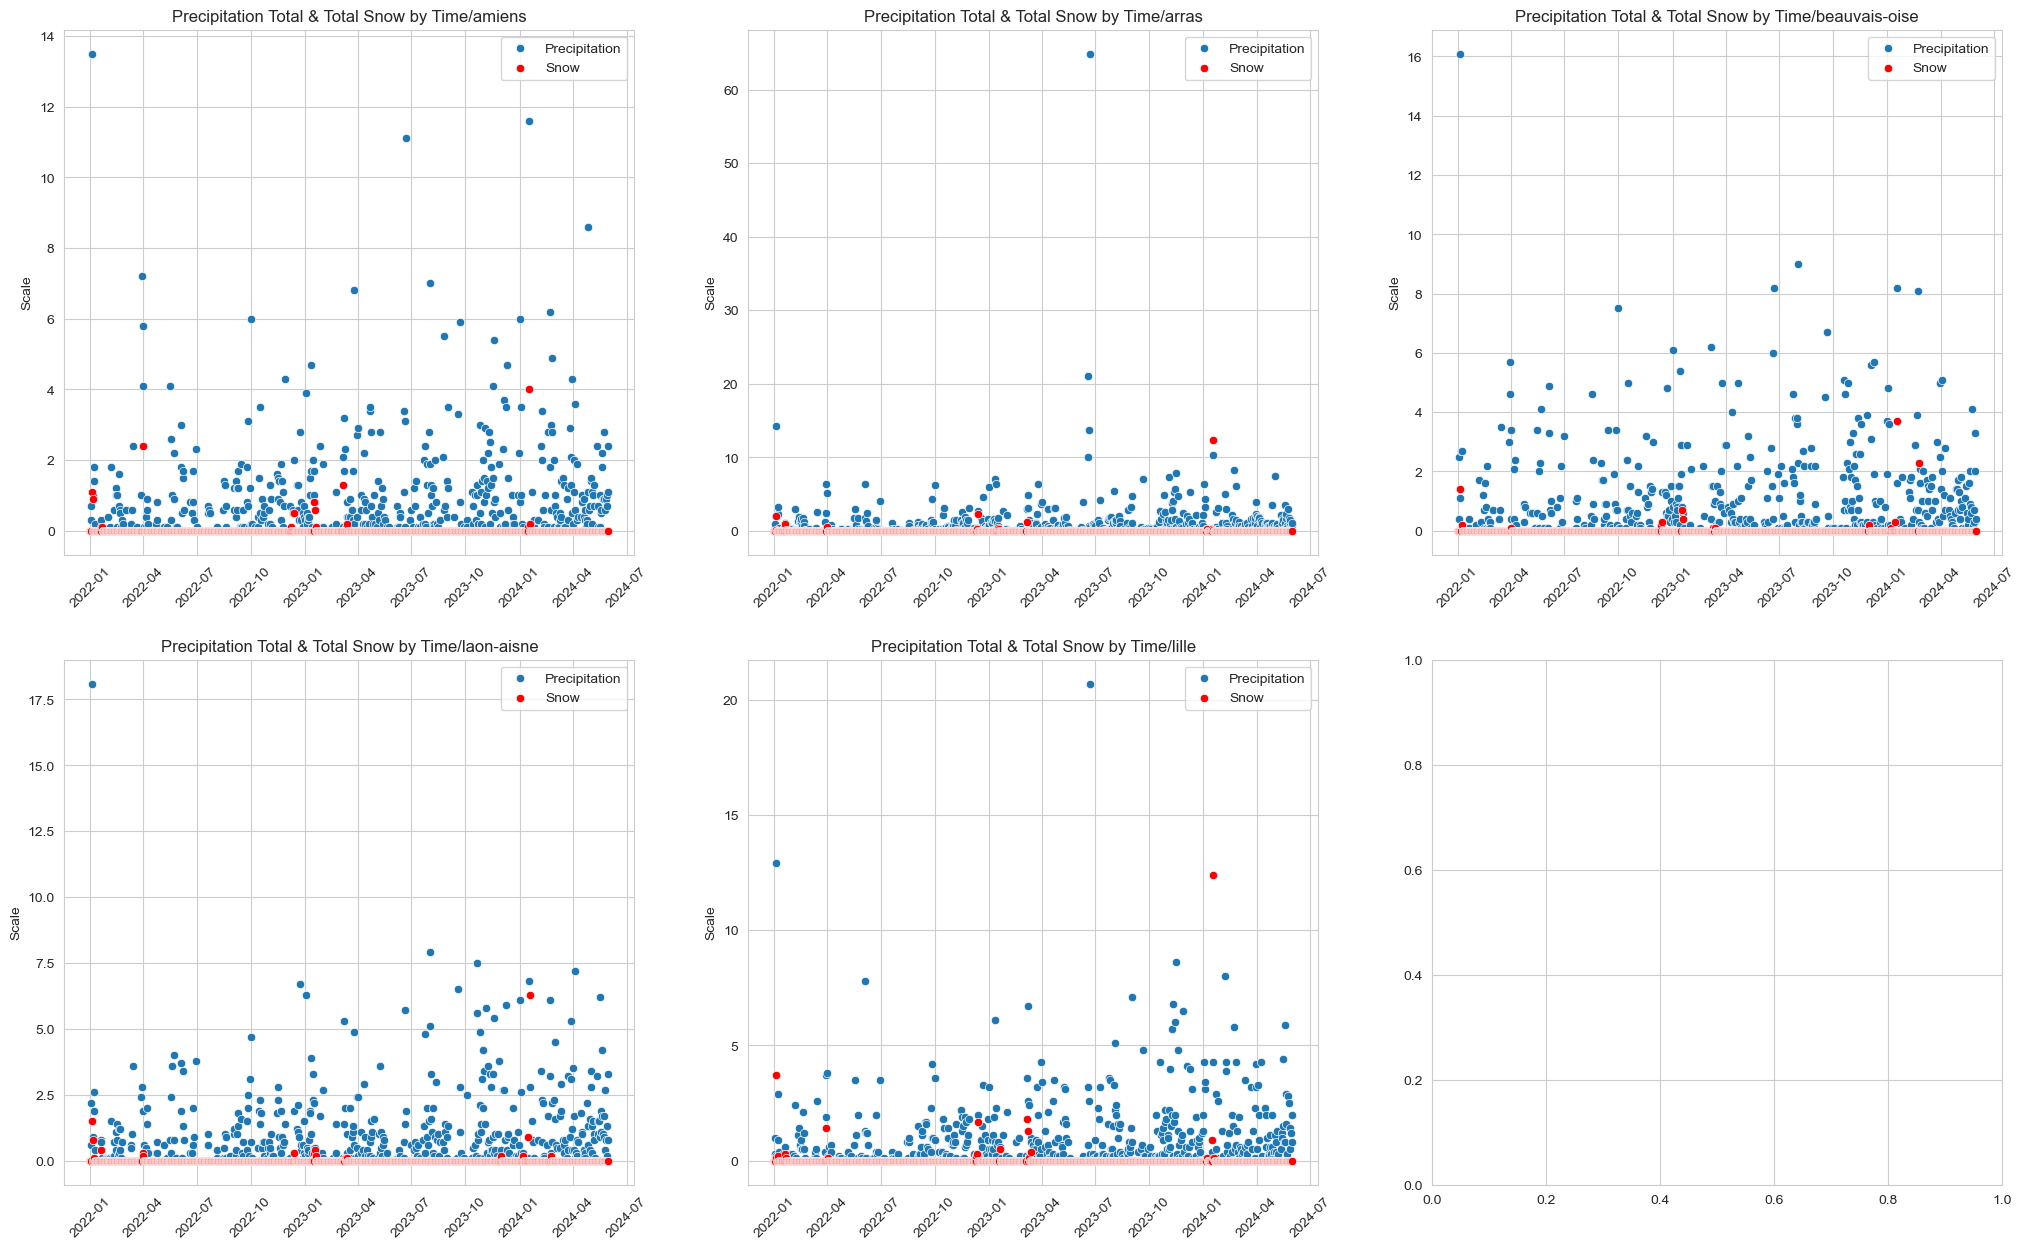

In [44]:
# Compare the villes by 'PRECIP_TOTAL_DAY_MM' and 'TOTAL_SNOW_MM'
fig, ax = plt.subplots(2, 3, figsize=(25,15))
for i, j in enumerate(lst_ville_hdf):
    ax = plt.subplot(2,3, i+1)
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'PRECIP_TOTAL_DAY_MM', label='Precipitation')
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'TOTAL_SNOW_MM', label='Snow', c='red')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('Precipitation Total & Total Snow by Time/'+j+'')
    ax.set_ylabel('Scale')
    ax.set_xlabel('')
    ax.legend(loc='upper right')

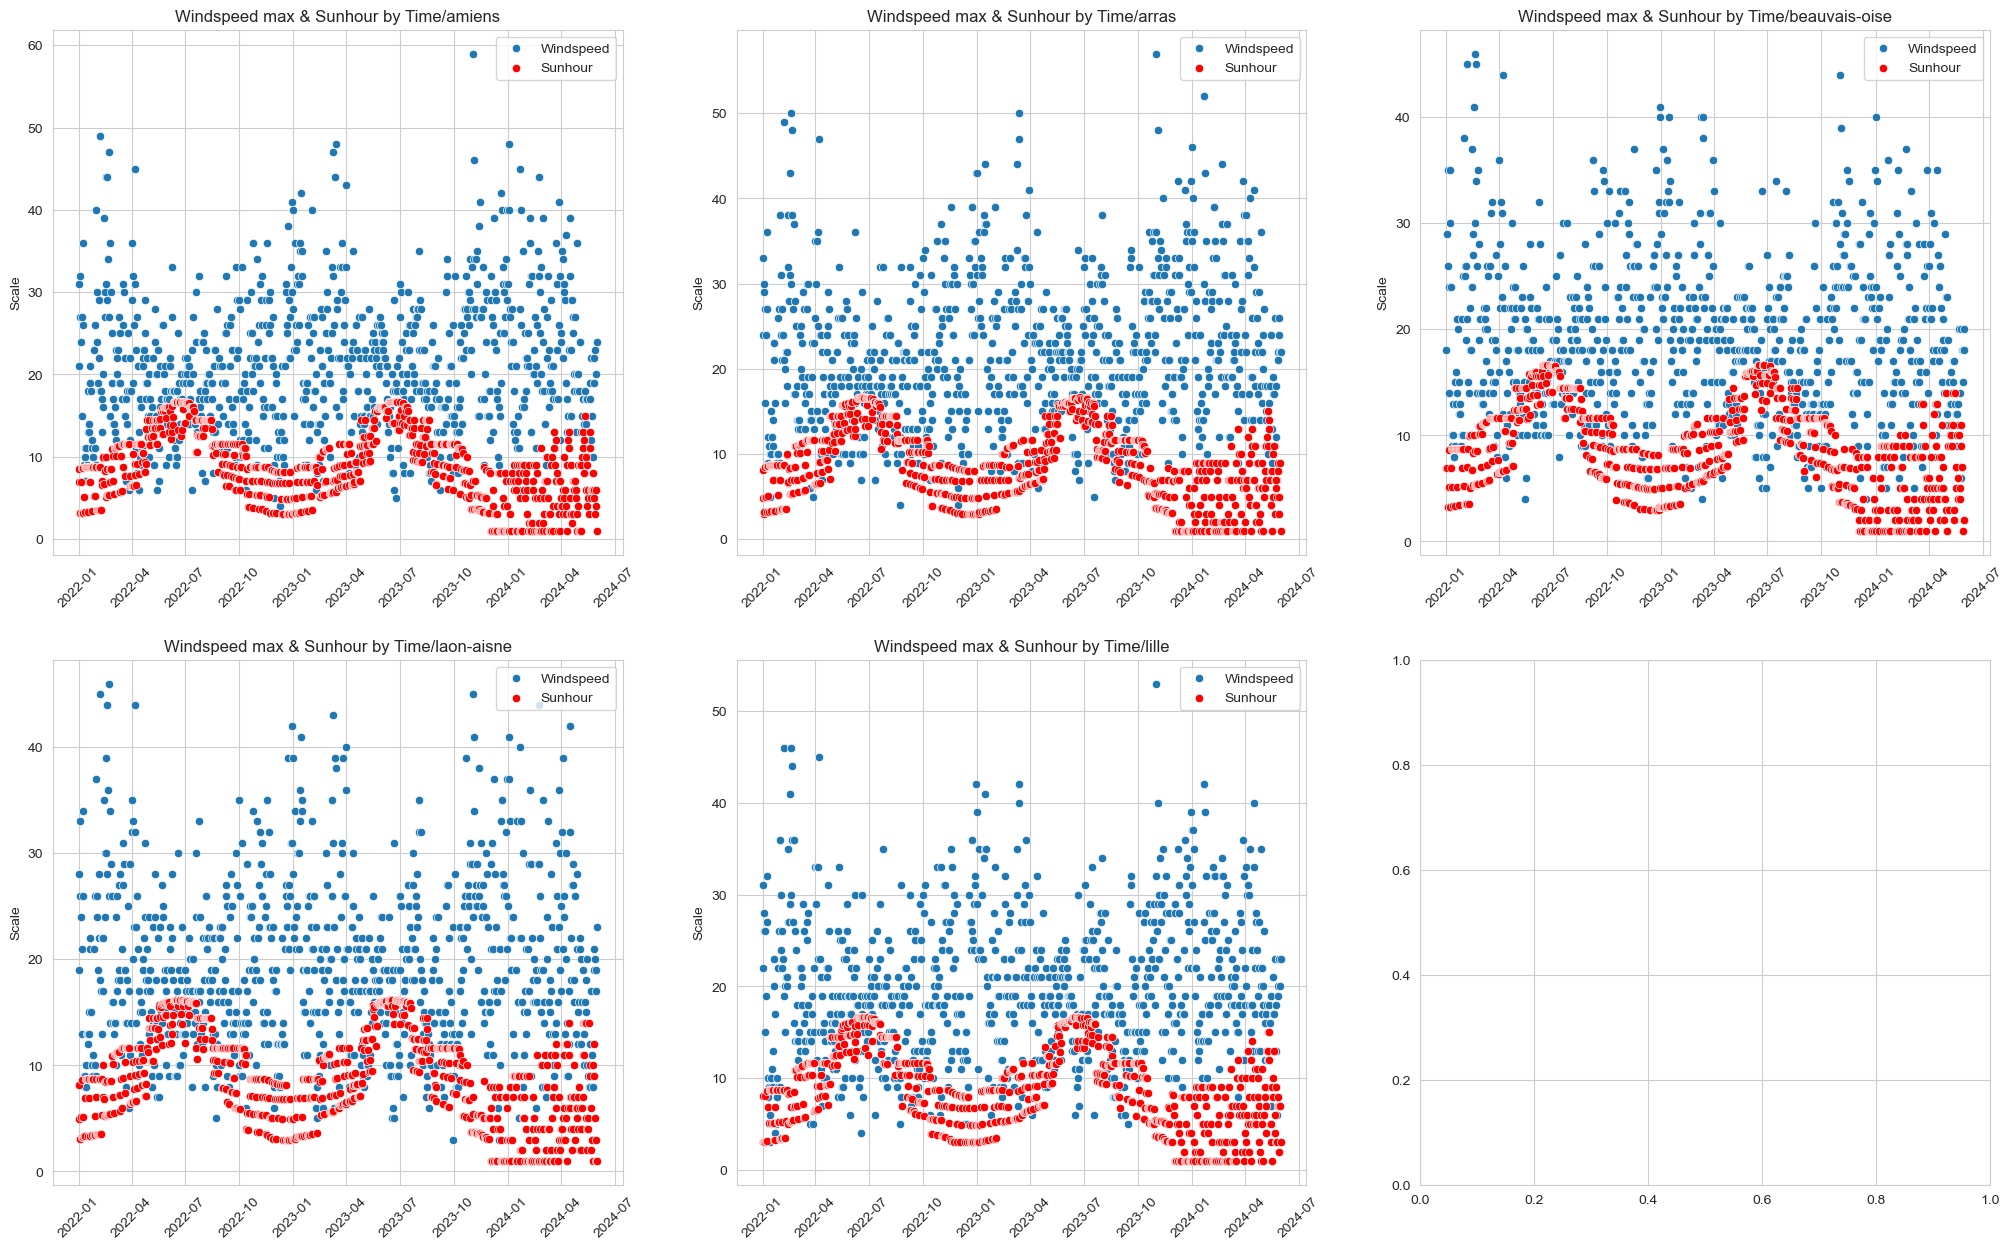

In [45]:
# Compare the villes by 'WINDSPEED_MAX_KMH' and 'SUNHOUR'

fig, ax = plt.subplots(2, 3, figsize=(25,15))
for i, j in enumerate(lst_ville_hdf):
    ax = plt.subplot(2,3, i+1)
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'WINDSPEED_MAX_KMH', label='Windspeed')
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'SUNHOUR', label='Sunhour', c='red')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('Windspeed max & Sunhour by Time/'+j+'')
    ax.set_ylabel('Scale')
    ax.set_xlabel('')
    ax.legend(loc='upper right')

### 4.2. Compare the villes  of region 'Centre-val de Loire' by essential weather indicators

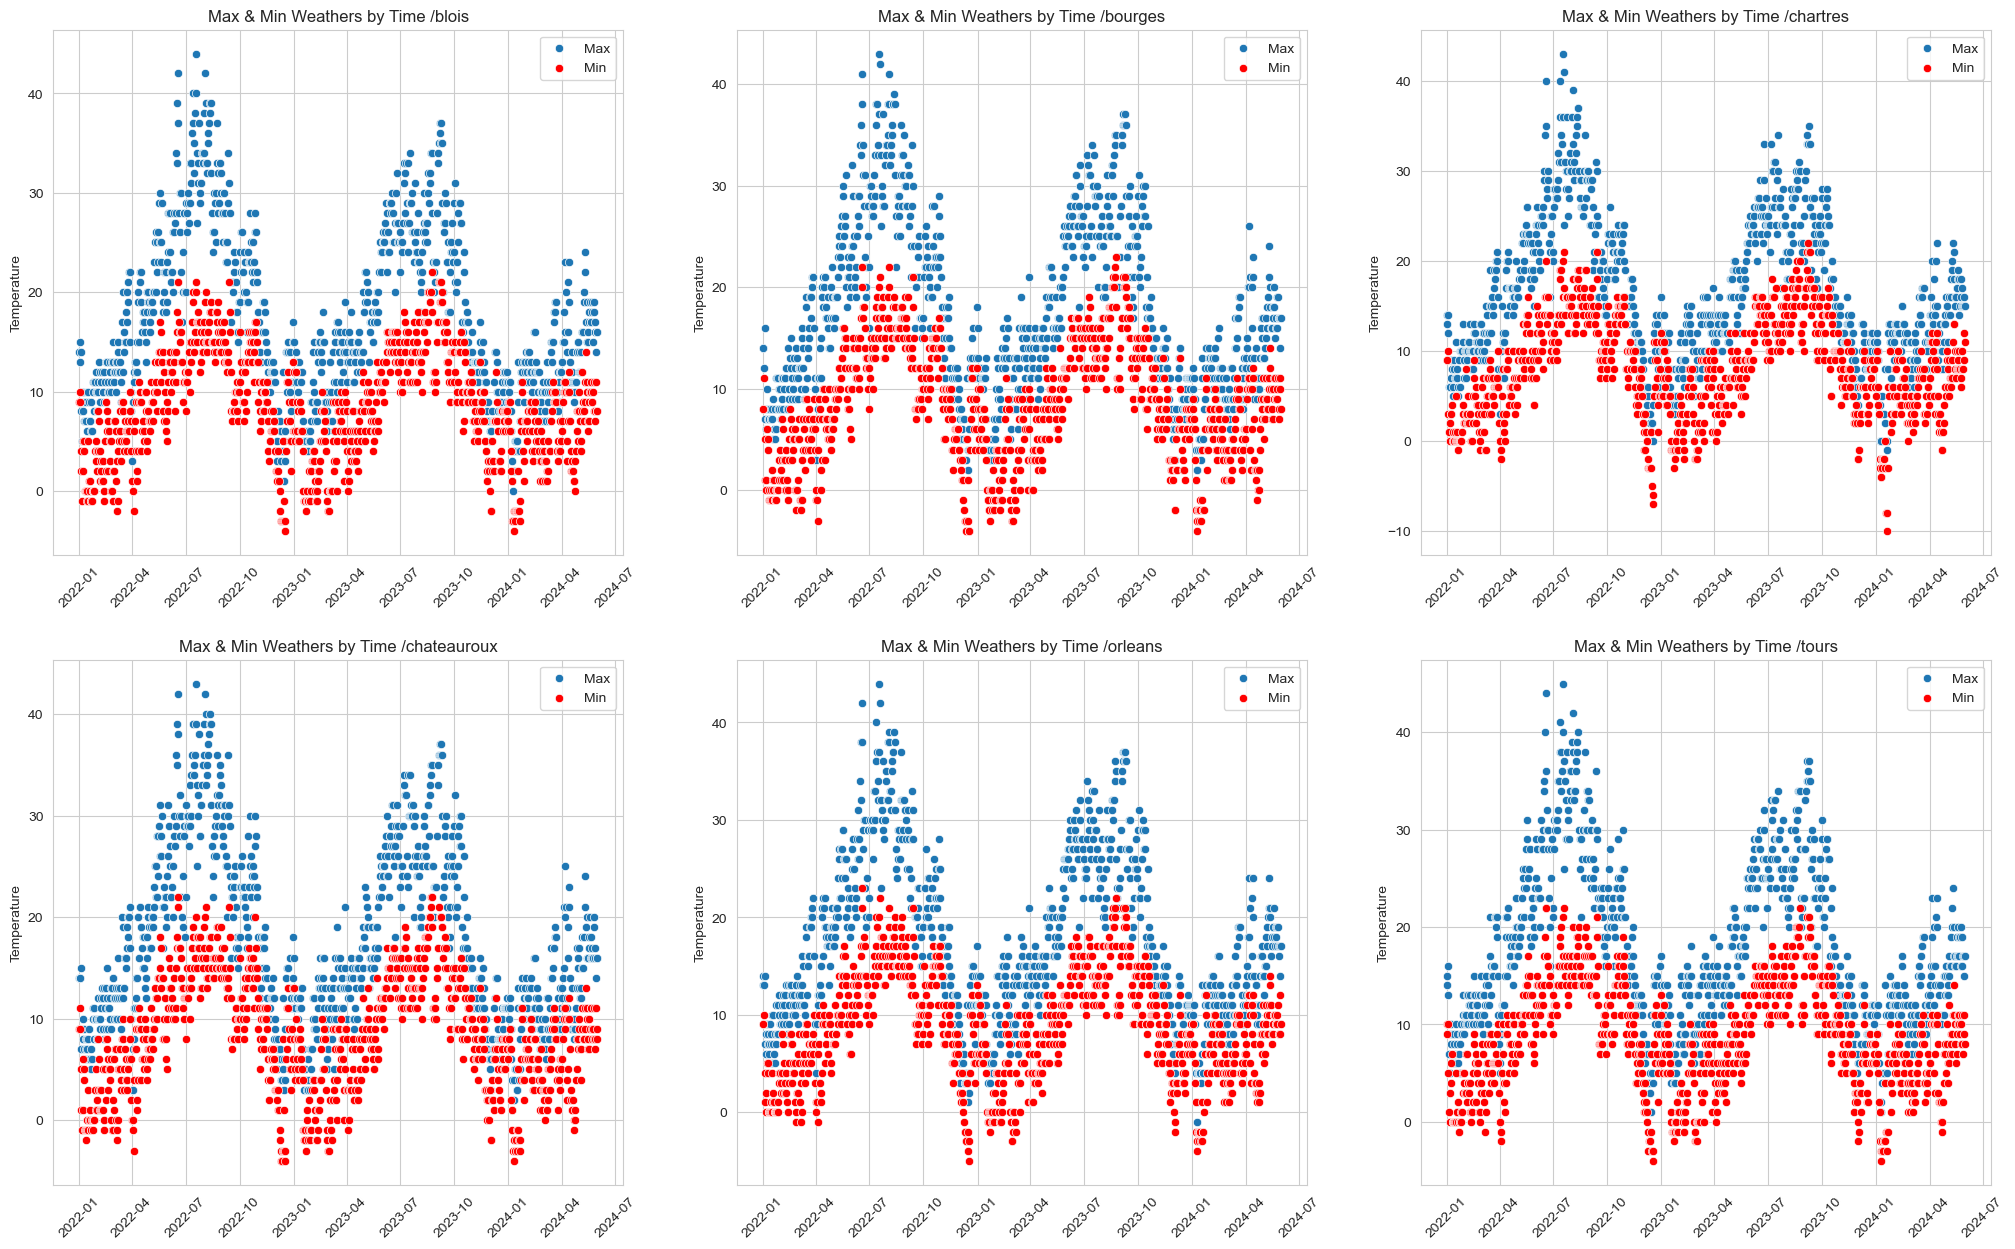

In [46]:
# Compare the villes by 'MAX_TEMPERATURE_C' and 'MIN_TEMPERATURE_C'
lst_ville_cvdl = ['blois', 'bourges', 'chartres', 'chateauroux', 'orleans', 'tours']

fig, ax = plt.subplots(2, 3, figsize=(25,15))
for i, j in enumerate(lst_ville_cvdl):
    ax = plt.subplot(2,3, i+1)
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'MAX_TEMPERATURE_C', label='Max')
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'MIN_TEMPERATURE_C', label='Min', c='red')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('Max & Min Weathers by Time /'+j+'')
    ax.set_ylabel('Temperature')
    ax.set_xlabel('')
    ax.legend(loc='upper right')

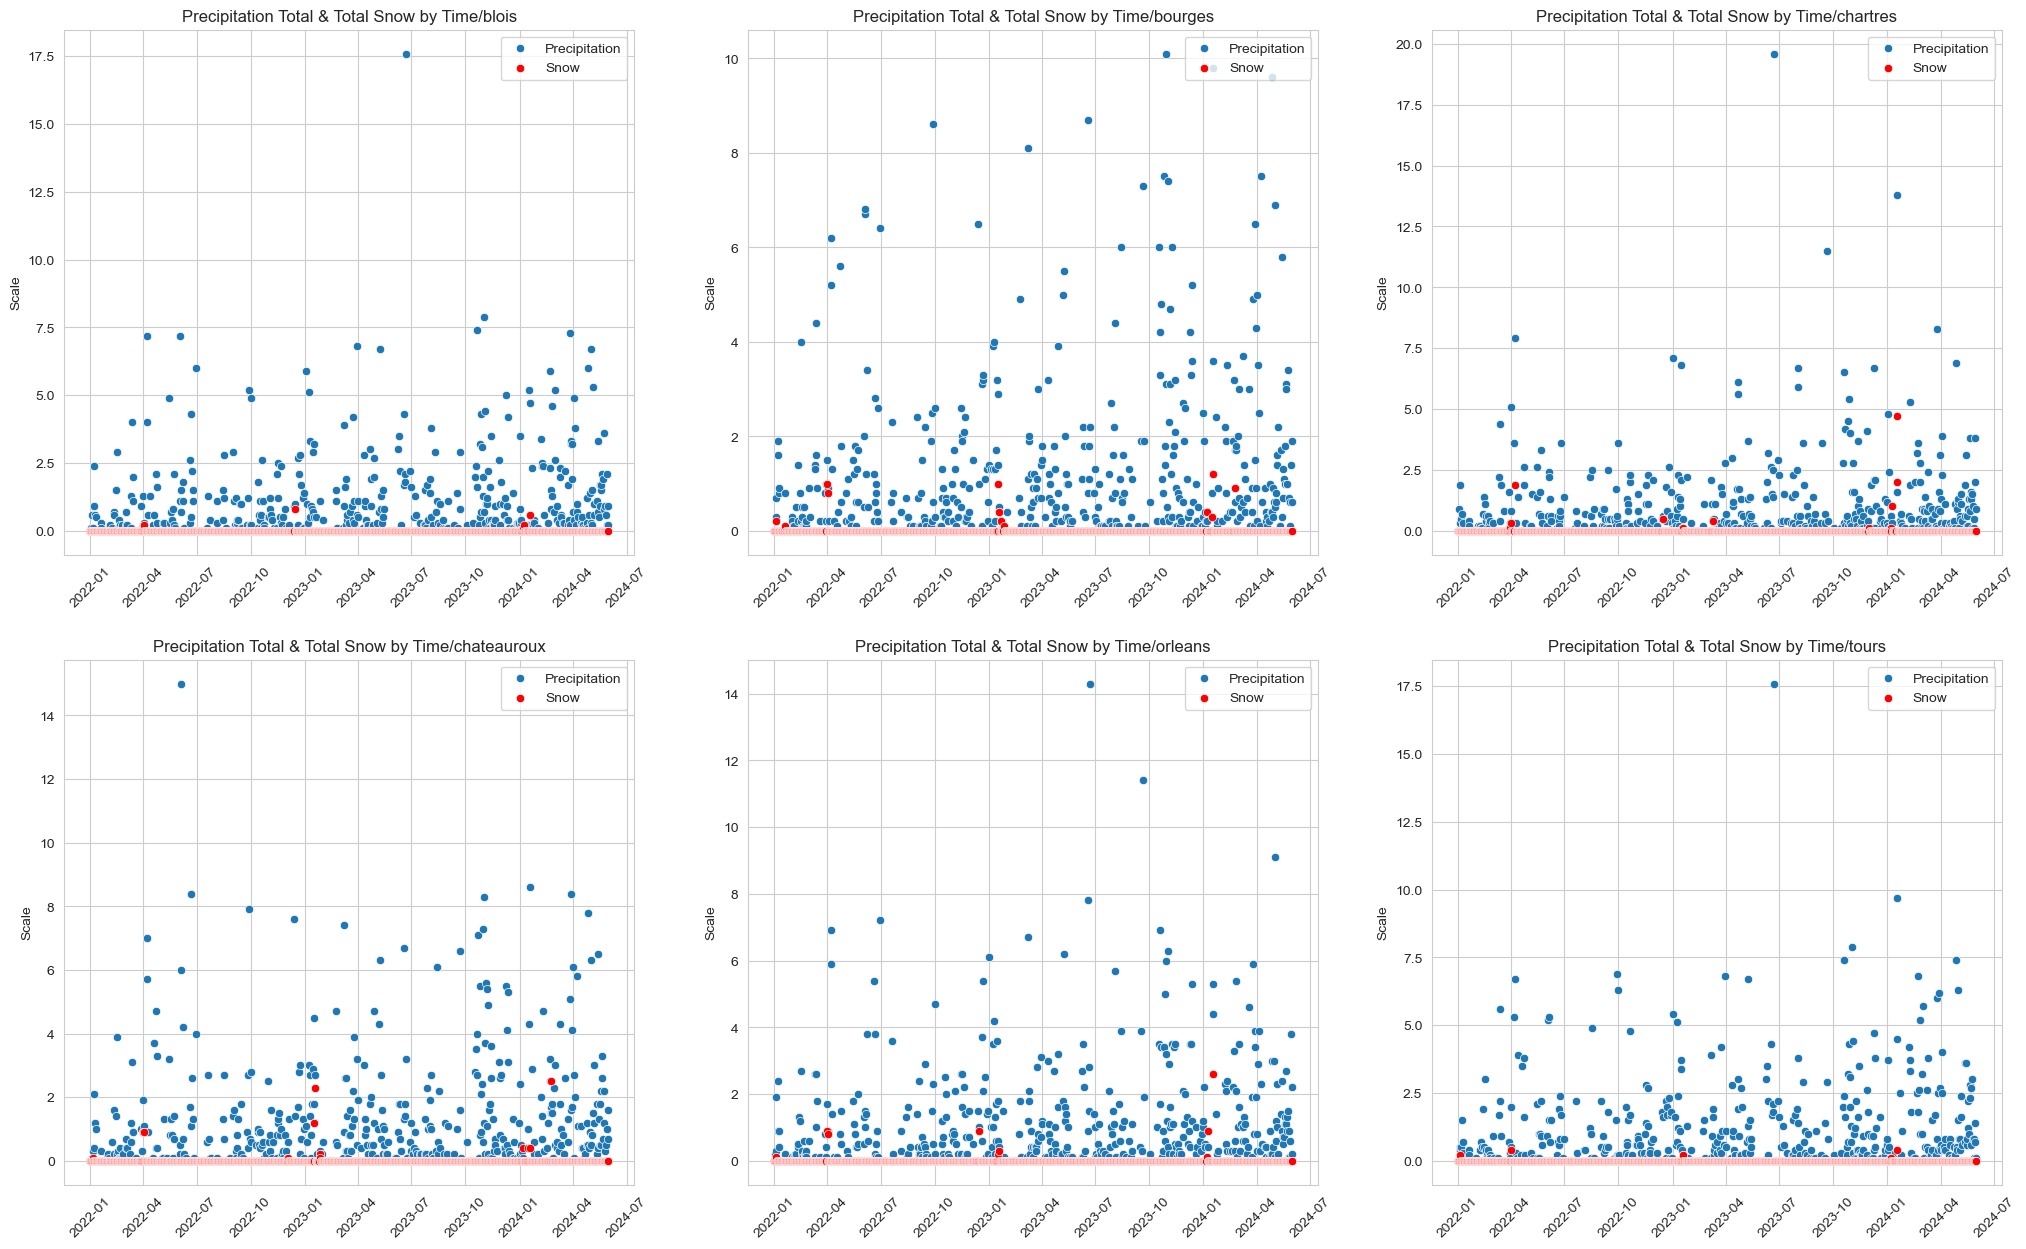

In [47]:
# Compare the villes by 'PRECIP_TOTAL_DAY_MM' and 'TOTAL_SNOW_MM'
fig, ax = plt.subplots(2, 3, figsize=(25,15))
for i, j in enumerate(lst_ville_cvdl):
    ax = plt.subplot(2,3, i+1)
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'PRECIP_TOTAL_DAY_MM', label='Precipitation')
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'TOTAL_SNOW_MM', label='Snow', c='red')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('Precipitation Total & Total Snow by Time/'+j+'')
    ax.set_ylabel('Scale')
    ax.set_xlabel('')
    ax.legend(loc='upper right')

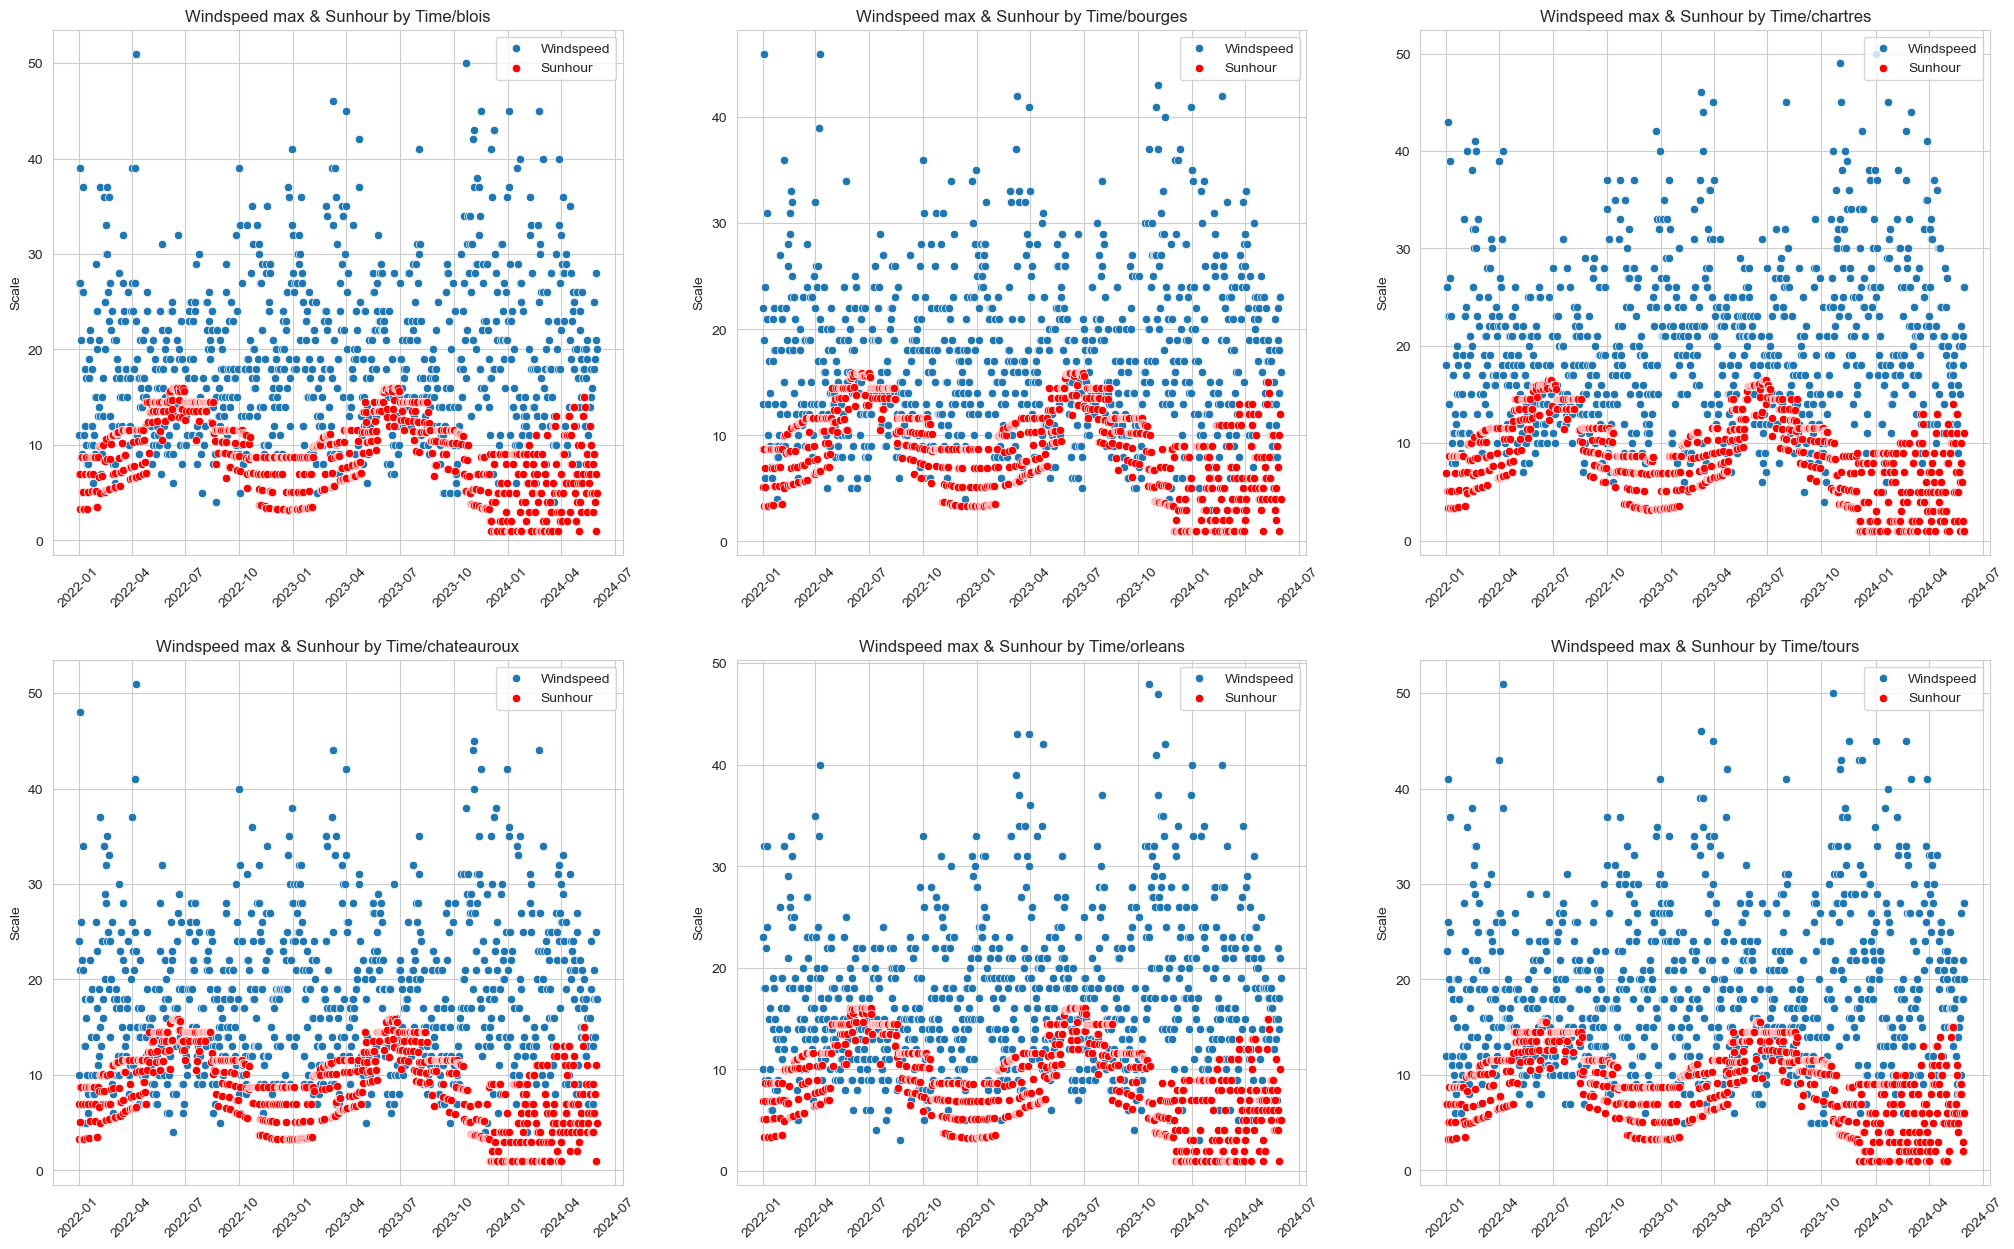

In [48]:
# Compare the villes by 'WINDSPEED_MAX_KMH' and 'SUNHOUR'

fig, ax = plt.subplots(2, 3, figsize=(25,15))
for i, j in enumerate(lst_ville_cvdl):
    ax = plt.subplot(2,3, i+1)
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'WINDSPEED_MAX_KMH', label='Windspeed')
    sns.scatterplot(data=meteo_ville(j), x = 'DATE', y = 'SUNHOUR', label='Sunhour', c='red')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('Windspeed max & Sunhour by Time/'+j+'')
    ax.set_ylabel('Scale')
    ax.set_xlabel('')
    ax.legend(loc='upper right')

We can say that the weather of the regions' cities are well_distributed (not skewed) by looking at different features. So, we will take the means of each weather features of the cities for generating the weather dataframes of the regions.

### 4.3. Combine the Weather Files of Each Ville of Each Region by Applying Mean

In [49]:
# Define a function in order to import the weather files and take the averages of the columns

def meteo_region_moy(year, lst_ville):
    df_weather = pd.DataFrame()
    for i in lst_ville:
        ville = str(i)

        # Define the path where the file is in
        chemin_file = r"C:\Users\HALILICELIKEL\Desktop\PROJET 3\meteo_2022_2024\export-"+ville+""+year+".csv"

        # Import the file
        df_new = pd.read_csv(chemin_file, sep=',', skiprows=3)

        # Concatenate the files in df_fintre
        df_weather = pd.concat([df_weather, df_new], axis=0)
    
    # Take the columns of type 'number' and make a list 
    lst_clm = df_weather.iloc[:,1:25].select_dtypes('number').columns.to_list()
    
    # Group the dataframe by date and take the averages of the columns
    df_weather = df_weather.groupby('DATE')[lst_clm].mean()
    return df_weather


In [50]:
# Make a weather dataframe of the region 'Haut-de-France'

lst_ville_hdf = ['amiens', 'arras', 'beauvais-oise', 'laon-aisne', 'lille']
df_weather_hdf = pd.DataFrame()
for year in range(2022, 2025):
    year = str(year)
    df_newly = meteo_region_moy(year, lst_ville_hdf)
    df_weather_hdf = pd.concat([df_weather_hdf, df_newly], axis=0)

df_weather_hdf = df_weather_hdf.reset_index()
df_weather_hdf['DATE'] = pd.to_datetime(df_weather_hdf['DATE'])
df_weather_hdf
    

DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0   2022-01-01              14.40              10.00              20.80   
1   2022-01-02              13.20               9.00              30.40   
2   2022-01-03              11.00               8.60              27.20   
3   2022-01-04               9.80               1.80              31.20   
4   2022-01-05               5.20               1.00              25.00   
..         ...                ...                ...                ...   
877 2024-05-27              15.60               8.60              19.40   
878 2024-05-28              15.40               7.80              22.00   
879 2024-05-29              16.20              11.60              20.20   
880 2024-05-30              16.40               8.80              19.40   
881 2024-05-31              14.80              10.00              22.40   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                    10.20               13.60                  12.00   
1                    11.20               12.80                  11.40   
2                     9.60               11.00                   9.40   
3                     9.40                3.40                   2.20   
4                     1.20                3.40                   4.00   
..                     ...                 ...                    ...   
877                  10.40               15.60                  13.40   
878                   9.80               14.80                  13.00   
879                  13.20               15.60                  15.40   
880                   9.80               16.20                  14.60   
881                  11.20               12.80                  14.00   

     PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                   0.00                 94.20               9.20  ...   
1                   0.40                 90.80              10.00  ...   
2                   1.46                 87.20               8.93  ...   
3                  14.96                 97.40               6.35  ...   
4                   0.66                 90.00               9.20  ...   
..                   ...                   ...                ...  ...   
877                 0.74                 92.00               8.90  ...   
878                 0.86                 92.40               8.78  ...   
879                 1.40                 94.40               8.75  ...   
880                 1.86                 96.40               7.67  ...   
881                 1.06                 95.40               8.57  ...   

     HEATINDEX_MAX_C  DEWPOINT_MAX_C  WINDTEMP_MAX_C  WEATHER_CODE_MORNING  \
0              14.40           10.40            7.40                119.60   
1              13.20           10.20            8.40                120.80   
2              11.00            8.00            6.00                132.20   
3               9.80            9.00           -4.00                296.00   
4               5.20            2.20           -4.00                113.60   
..               ...             ...             ...                   ...   
877            15.60           10.00            9.60                171.20   
878            15.40           12.60            8.00                141.80   
879            16.20           13.40           11.20                224.60   
880            16.40           12.00            8.00                153.80   
881            14.80           12.20            8.60                194.00   

     WEATHER_CODE_NOON  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  \
0               113.00                114.80           0.00      3.80   
1               353.00                129.80           0.00      3.20   
2               132.20                300.20           0.00      2.20   
3               312.80                338.00           1.94      1.40   
4               173.60                121

In [51]:
df_weather_hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    882 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       882 non-null    float64       
 2   MIN_TEMPERATURE_C       882 non-null    float64       
 3   WINDSPEED_MAX_KMH       882 non-null    float64       
 4   TEMPERATURE_MORNING_C   882 non-null    float64       
 5   TEMPERATURE_NOON_C      882 non-null    float64       
 6   TEMPERATURE_EVENING_C   882 non-null    float64       
 7   PRECIP_TOTAL_DAY_MM     882 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    882 non-null    float64       
 9   VISIBILITY_AVG_KM       882 non-null    float64       
 10  PRESSURE_MAX_MB         882 non-null    float64       
 11  CLOUDCOVER_AVG_PERCENT  882 non-null    float64       
 12  HEATINDEX_MAX_C         882 non-null    float64   

In [52]:
# Make a weather dataframe of the region 'Centre-Val de Loire'

lst_ville_cvdl = ['blois', 'bourges', 'chartres', 'chateauroux', 'orleans', 'tours']
df_weather_cvdl = pd.DataFrame()
for year in range(2022, 2025):
    year = str(year)
    df_newly = meteo_region_moy(year, lst_ville_cvdl)
    df_weather_cvdl = pd.concat([df_weather_cvdl, df_newly], axis=0)

df_weather_cvdl = df_weather_cvdl.reset_index()
df_weather_cvdl['DATE'] = pd.to_datetime(df_weather_cvdl['DATE'])
df_weather_cvdl

DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0   2022-01-01              13.83               8.83              12.33   
1   2022-01-02              14.17               9.00              24.17   
2   2022-01-03              12.83              10.33              22.33   
3   2022-01-04              14.83               4.33              41.50   
4   2022-01-05               7.00               1.17              22.00   
..         ...                ...                ...                ...   
877 2024-05-27              16.17               8.00              18.00   
878 2024-05-28              16.50               7.33              16.67   
879 2024-05-29              14.50              11.33              19.00   
880 2024-05-30              16.33               8.83              25.17   
881 2024-05-31              16.33               8.67              19.83   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                     8.83               12.67                  11.00   
1                     9.67               12.67                  13.00   
2                    10.83               12.17                  12.50   
3                    12.83               14.67                   5.67   
4                     2.67                5.00                   4.00   
..                     ...                 ...                    ...   
877                   8.67               16.00                  14.33   
878                   8.67               13.50                  16.50   
879                  11.67               13.33                  14.00   
880                   9.67               16.17                  14.17   
881                  10.00               14.50                  15.50   

     PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                   0.00                 84.50              10.00  ...   
1                   0.00                 81.00              10.00  ...   
2                   0.20                 91.00               9.98  ...   
3                   0.87                 77.33               9.04  ...   
4                   0.37                 82.00               9.79  ...   
..                   ...                   ...                ...  ...   
877                 0.60                 96.17               6.96  ...   
878                 0.10                 95.33               7.42  ...   
879                 1.83                 96.17               7.50  ...   
880                 1.97                 96.83               7.96  ...   
881                 0.45                 97.00               7.98  ...   

     HEATINDEX_MAX_C  DEWPOINT_MAX_C  WINDTEMP_MAX_C  WEATHER_CODE_MORNING  \
0              13.83            8.00            6.83                117.50   
1              14.17           10.67            8.00                117.50   
2              12.83           10.17            8.33                118.50   
3              14.83            9.50            9.00                200.50   
4               7.00            5.17           -2.83                220.50   
..               ...             ...             ...                   ...   
877            16.17           10.83            7.50                173.50   
878            16.50           13.50            7.17                166.00   
879            14.50           13.67            9.83                261.00   
880            16.33           13.17            8.00                139.00   
881            16.33           11.67            7.83                167.50   

     WEATHER_CODE_NOON  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  \
0               116.50                114.00           0.00      3.83   
1               117.00                119.00           0.00      3.83   
2               122.00                158.00           0.00      3.00   
3               126.50                149.00           0.00      3.00   
4               114.00                116

In [53]:
df_weather_cvdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    882 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       882 non-null    float64       
 2   MIN_TEMPERATURE_C       882 non-null    float64       
 3   WINDSPEED_MAX_KMH       882 non-null    float64       
 4   TEMPERATURE_MORNING_C   882 non-null    float64       
 5   TEMPERATURE_NOON_C      882 non-null    float64       
 6   TEMPERATURE_EVENING_C   882 non-null    float64       
 7   PRECIP_TOTAL_DAY_MM     882 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    882 non-null    float64       
 9   VISIBILITY_AVG_KM       882 non-null    float64       
 10  PRESSURE_MAX_MB         882 non-null    float64       
 11  CLOUDCOVER_AVG_PERCENT  882 non-null    float64       
 12  HEATINDEX_MAX_C         882 non-null    float64   

### 4.3. Combine the Weather Files of Each Region

In [54]:
# Add a column to df_weather_cvdl and df_weather_hdf which has the name of regions  
df_weather_cvdl['Région'] = 'Centre-Val de Loire'
df_weather_hdf['Région'] = 'Hauts-de-France'

In [55]:
# Concatenate the weather dataframes of two regions
df_weather = pd.concat([df_weather_cvdl, df_weather_hdf], axis=0)
df_weather.rename({'DATE': 'Date'}, axis=1, inplace=True)
df_weather

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0   2022-01-01              13.83               8.83              12.33   
1   2022-01-02              14.17               9.00              24.17   
2   2022-01-03              12.83              10.33              22.33   
3   2022-01-04              14.83               4.33              41.50   
4   2022-01-05               7.00               1.17              22.00   
..         ...                ...                ...                ...   
877 2024-05-27              15.60               8.60              19.40   
878 2024-05-28              15.40               7.80              22.00   
879 2024-05-29              16.20              11.60              20.20   
880 2024-05-30              16.40               8.80              19.40   
881 2024-05-31              14.80              10.00              22.40   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                     8.83               12.67                  11.00   
1                     9.67               12.67                  13.00   
2                    10.83               12.17                  12.50   
3                    12.83               14.67                   5.67   
4                     2.67                5.00                   4.00   
..                     ...                 ...                    ...   
877                  10.40               15.60                  13.40   
878                   9.80               14.80                  13.00   
879                  13.20               15.60                  15.40   
880                   9.80               16.20                  14.60   
881                  11.20               12.80                  14.00   

     PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                   0.00                 84.50              10.00  ...   
1                   0.00                 81.00              10.00  ...   
2                   0.20                 91.00               9.98  ...   
3                   0.87                 77.33               9.04  ...   
4                   0.37                 82.00               9.79  ...   
..                   ...                   ...                ...  ...   
877                 0.74                 92.00               8.90  ...   
878                 0.86                 92.40               8.78  ...   
879                 1.40                 94.40               8.75  ...   
880                 1.86                 96.40               7.67  ...   
881                 1.06                 95.40               8.57  ...   

     DEWPOINT_MAX_C  WINDTEMP_MAX_C  WEATHER_CODE_MORNING  WEATHER_CODE_NOON  \
0              8.00            6.83                117.50             116.50   
1             10.67            8.00                117.50             117.00   
2             10.17            8.33                118.50             122.00   
3              9.50            9.00                200.50             126.50   
4              5.17           -2.83                220.50             114.00   
..              ...             ...                   ...                ...   
877           10.00            9.60                171.20             211.40   
878           12.60            8.00                141.80             264.80   
879           13.40           11.20                224.60             212.00   
880           12.00            8.00                153.80             317.60   
881           12.20            8.60                194.00             282.20   

     WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  \
0                  114.00           0.00      3.83     6.00   
1                  119.00           0.00      3.83     6.60   
2                  158.00           0.00      3.00     3.90   
3                  149.00           0.00      3.00     6.30   
4                  116.50           0.10      1.00     8.40   
..  

# 5. Prepare the Final Matrix for Machine Learning 
# and Apply the ML on Different Levels of Main Dataframe

## 5.1.  ML Model with subscribed profiles and power ranges

### 5.1.1. Taking the Energy Consumtion on Daily Basis and Merge it with Weather Dataframe

In [56]:
# Take total energy consumption on daily basis for each region
df_copy = df[df['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA']

# Region Centre val de Loire
df_energy_day_prfl_plg_cvdl = df_copy[df_copy['Région'] == 'Centre-Val de Loire']
df_energy_day_prfl_plg_cvdl = df_energy_day_prfl_plg_cvdl.groupby(['Date', 'Région', 'Profil', 'Plage de puissance souscrite']).\
                        agg(**{'Energy_Cons': ('Total énergie soutirée (Wh)', lambda x: x.sum())}).\
                        reset_index()

# Region Hauts de France
df_energy_day_prfl_plg_hdf = df_copy[df_copy['Région'] == 'Hauts-de-France']
df_energy_day_prfl_plg_hdf = df_energy_day_prfl_plg_hdf.groupby(['Date', 'Région', 'Profil', 'Plage de puissance souscrite']).\
                        agg(**{'Energy_Cons': ('Total énergie soutirée (Wh)', lambda x: x.sum())}).\
                        reset_index()

In [57]:
df_weather_cvdl.rename({'DATE': 'Date'}, axis=1, inplace=True)
df_weather_hdf.rename({'DATE': 'Date'}, axis=1, inplace=True)

In [58]:
# Merge df_weather and df_energy_day

df_merge_prfl_plg_cvdl = pd.merge(df_weather_cvdl, df_energy_day_prfl_plg_cvdl, on='Date')
df_merge_prfl_plg_hdf = pd.merge(df_weather_hdf, df_energy_day_prfl_plg_hdf, on='Date')

In [59]:
df_concat_prfl_plg = pd.concat([df_merge_prfl_plg_cvdl, df_merge_prfl_plg_hdf], axis=0)
df_concat_prfl_plg.reset_index(drop=True)

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0     2022-04-01               3.50               0.33              37.50   
1     2022-04-01               3.50               0.33              37.50   
2     2022-04-01               3.50               0.33              37.50   
3     2022-04-01               3.50               0.33              37.50   
4     2022-04-01               3.50               0.33              37.50   
...          ...                ...                ...                ...   
19001 2024-03-31              11.80               5.00              21.80   
19002 2024-03-31              11.80               5.00              21.80   
19003 2024-03-31              11.80               5.00              21.80   
19004 2024-03-31              11.80               5.00              21.80   
19005 2024-03-31              11.80               5.00              21.80   

       TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                       0.33                2.83                   2.17   
1                       0.33                2.83                   2.17   
2                       0.33                2.83                   2.17   
3                       0.33                2.83                   2.17   
4                       0.33                2.83                   2.17   
...                      ...                 ...                    ...   
19001                   5.20               11.60                   9.40   
19002                   5.20               11.60                   9.40   
19003                   5.20               11.60                   9.40   
19004                   5.20               11.60                   9.40   
19005                   5.20               11.60                   9.40   

       PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                     2.25                 94.50               3.67  ...   
1                     2.25                 94.50               3.67  ...   
2                     2.25                 94.50               3.67  ...   
3                     2.25                 94.50               3.67  ...   
4                     2.25                 94.50               3.67  ...   
...                    ...                   ...                ...  ...   
19001                 2.14                 95.00               7.05  ...   
19002                 2.14                 95.00               7.05  ...   
19003                 2.14                 95.00               7.05  ...   
19004                 2.14                 95.00               7.05  ...   
19005                 2.14                 95.00               7.05  ...   

       WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  \
0                    300.50           0.47      1.00     6.47   
1                    300.50           0.47      1.00     6.47   
2                    300.50           0.47      1.00     6.47   
3                    300.50           0.47      1.00     6.47   
4                    300.50           0.47      1.00     6.47   
...                     ...            ...       ...      ...   
19001                201.80           0.00      2.40     2.80   
19002                201.80           0.00      2.40     2.80   
19003                201.80           0.00      2.40     2.80   
19004                201.80           0.00      2.40     2.80   
19005                201.80           0.00      2.40     2.80   

       TEMPERATURE_NIGHT_C             Région_x             Région_y  \
0                     1.00  Centre-Val de Loire  Centre-Val de Loire   
1                     1.00  Centre-Val de Loire  Centre-Val de Loire   
2                     1.00  Centre-Val de Loire  Centre-Val de Loire   
3                     1.00  Centre-Val de Loire  Centre-Val de Loire   
4                     1.00  Centre-Val de Loire  Centre-Val de Loire   
...                    ...                  ...             

In [60]:
# Drop the unnecessary columns after concat
df_concat_prfl_plg.drop(['Région_x'], axis=1, inplace=True)

# Convert Wh to KWh in 'Energy_Cons' column 
df_concat_prfl_plg['Energy_Cons'] = df_concat_prfl_plg['Energy_Cons'].apply(lambda x: x/1000)

# Rename the column 'Energy_Cons' as 'Energy_Cons_KWh'
df_concat_prfl_plg.rename({'Energy_Cons': 'Energy_Cons_KWh', 'Région_y': 'Région'}, axis=1, inplace=True)

### 5.1.2. Integrate Holidays, Weekends and School Vacations into the Matrix

In [61]:
import datetime

from jours_feries_france import JoursFeries

In [62]:
# Import the 'Jours Féries'

res_2022 = JoursFeries.for_year(2022)
res_2023 = JoursFeries.for_year(2023)
res_2024 = JoursFeries.for_year(2024)

In [63]:
# Make a list of 'Jours Féries'
def dict_values(dico):
    lst = []
    for key, value in dico.items():
        result = value
        result = result.strftime("%Y-%m-%d")
        lst.append(result)
    return lst

reslt_2022 = dict_values(res_2022)
reslt_2023 = dict_values(res_2023)
reslt_2024 = dict_values(res_2024)
jour_feries = reslt_2022 + reslt_2023 + reslt_2024


In [64]:
# Create a column 'Jour_Feries': 1 means that it is a jour_ferie
df_concat_prfl_plg['Jour_Feries'] = df_concat_prfl_plg['Date'].\
                                    apply(lambda x: 1 if x.strftime("%Y-%m-%d") in jour_feries else 0)


In [65]:
# Create a column 'Weekend' and mark the days weekend as '1'
lst_weekend = ['Saturday', 'Sunday']
df_concat_prfl_plg['Weekend'] = df_concat_prfl_plg['Date'].\
                                apply(lambda x: 1 if x.strftime("%A") in lst_weekend else 0)


In [66]:
# School Vacations (source='https://www.data.gouv.fr/fr/datasets/vacances-scolaires-par-zones/#/resources')

df_vac_scolaire = pd.read_csv('https://raw.githubusercontent.com/AntoineAugusti/vacances-scolaires/master/data.csv')
df_vac_scolaire

date  vacances_zone_a  vacances_zone_b  vacances_zone_c  \
0      1990-01-01            False            False            False   
1      1990-01-02            False            False            False   
2      1990-01-03            False            False            False   
3      1990-01-04            False            False            False   
4      1990-01-05            False            False            False   
...           ...              ...              ...              ...   
13509  2026-12-27            False            False            False   
13510  2026-12-28            False            False            False   
13511  2026-12-29            False            False            False   
13512  2026-12-30            False            False            False   
13513  2026-12-31            False            False            False   

      nom_vacances  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
13509          NaN  
13510          NaN  
13511          NaN  
13512          NaN  
13513          NaN  

[13514 rows x 5 columns]

In [67]:
# Drop the 'Vacances' of Zone A and B
df_vac_scolaire.drop(['vacances_zone_a', 'vacances_zone_c'], axis=1, inplace=True)

# Filter the dataframe 
df_vac_scolaire = df_vac_scolaire[(df_vac_scolaire['date'] >= '2022-01-01')\
                    & (df_vac_scolaire['date'] <= '2024-09-01') & (df_vac_scolaire['vacances_zone_b'] == True)]

# Convert the date column to datetime
df_vac_scolaire['date'] = pd.to_datetime(df_vac_scolaire['date'])



In [68]:
# Make a list of the dates of 'Vacances'
lst_vac_scolaire = df_vac_scolaire['date'].to_list()

# Create a new column for 'Vacances Scolaires'
df_concat_prfl_plg['Vacances_Scol'] = df_concat_prfl_plg['Date'].apply(lambda x: 1 if x in lst_vac_scolaire else 0)

In [69]:
df_concat_prfl_plg.head()

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0 2022-04-01               3.50               0.33              37.50   
1 2022-04-01               3.50               0.33              37.50   
2 2022-04-01               3.50               0.33              37.50   
3 2022-04-01               3.50               0.33              37.50   
4 2022-04-01               3.50               0.33              37.50   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                   0.33                2.83                   2.17   
1                   0.33                2.83                   2.17   
2                   0.33                2.83                   2.17   
3                   0.33                2.83                   2.17   
4                   0.33                2.83                   2.17   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                 2.25                 94.50               3.67  ...   
1                 2.25                 94.50               3.67  ...   
2                 2.25                 94.50               3.67  ...   
3                 2.25                 94.50               3.67  ...   
4                 2.25                 94.50               3.67  ...   

   UV_INDEX  SUNHOUR  TEMPERATURE_NIGHT_C               Région  \
0      1.00     6.47                 1.00  Centre-Val de Loire   
1      1.00     6.47                 1.00  Centre-Val de Loire   
2      1.00     6.47                 1.00  Centre-Val de Loire   
3      1.00     6.47                 1.00  Centre-Val de Loire   
4      1.00     6.47                 1.00  Centre-Val de Loire   

                   Profil  Plage de puissance souscrite  Energy_Cons_KWh  \
0           ENT1 (+ ENT2)           P0: Total <= 36 kVA             0.00   
1    ENT3 (+ ENT4 + ENT5)           P0: Total <= 36 kVA         86887.25   
2         PRO1 (+ PRO1WE)           P0: Total <= 36 kVA       2451405.19   
3  PRO2 (+ PRO2WE + PRO6)           P0: Total <= 36 kVA       2125070.76   
4                    PRO3           P0: Total <= 36 kVA         76617.36   

   Jour_Feries  Weekend  Vacances_Scol  
0            0        0              0  
1            0        0              0  
2            0        0              0  
3            0        0              0  
4            0        0              0  

[5 rows x 29 columns]

In [70]:
# Encode the categorical columns
dico_regions = {'Centre-Val de Loire':1, 'Hauts-de-France':2}
df_concat_prfl_plg['Région'] = df_concat_prfl_plg['Région'].replace(dico_regions)
df_concat_prfl_plg['Profil'] = df_concat_prfl_plg['Profil'].factorize()[0]
df_concat_prfl_plg['Plage de puissance souscrite'] = df_concat_prfl_plg['Plage de puissance souscrite'].factorize()[0]
df_concat_prfl_plg.insert(1, 'Energy_Cons_KWh', df_concat_prfl_plg.pop("Energy_Cons_KWh"))

In [71]:
df_concat_prfl_plg.head()

Date  Energy_Cons_KWh  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  \
0 2022-04-01             0.00               3.50               0.33   
1 2022-04-01         86887.25               3.50               0.33   
2 2022-04-01       2451405.19               3.50               0.33   
3 2022-04-01       2125070.76               3.50               0.33   
4 2022-04-01         76617.36               3.50               0.33   

   WINDSPEED_MAX_KMH  TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  \
0              37.50                   0.33                2.83   
1              37.50                   0.33                2.83   
2              37.50                   0.33                2.83   
3              37.50                   0.33                2.83   
4              37.50                   0.33                2.83   

   TEMPERATURE_EVENING_C  PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  ...  \
0                   2.17                 2.25                 94.50  ...   
1                   2.17                 2.25                 94.50  ...   
2                   2.17                 2.25                 94.50  ...   
3                   2.17                 2.25                 94.50  ...   
4                   2.17                 2.25                 94.50  ...   

   TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  TEMPERATURE_NIGHT_C  Région  Profil  \
0           0.47      1.00     6.47                 1.00       1       0   
1           0.47      1.00     6.47                 1.00       1       1   
2           0.47      1.00     6.47                 1.00       1       2   
3           0.47      1.00     6.47                 1.00       1       3   
4           0.47      1.00     6.47                 1.00       1       4   

   Plage de puissance souscrite  Jour_Feries  Weekend  Vacances_Scol  
0                             0            0        0              0  
1                             0            0        0              0  
2                             0            0        0              0  
3                             0            0        0              0  
4                             0            0        0              0  

[5 rows x 29 columns]

### 5.1.3. ML Model

In [72]:
# Import modules for ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### Which metrics to use for evaluating the regression model?
- ***R-Squared Value:***
    R-squared is a statistical measure in regression analysis that gives the proportion of variance in the dependent variable that can be predicted from the independent variables. It is basically a score that indicates the fit of the data to the regression model, with a value of 1 implying a perfect fit and a value of 0 meaning no predictive power.

- ***Mean Absolute Error:***
    MAE is measured as the average of the total difference between the actual values in the data set and the values predicted by the regression model. It is easy to interpret it since it gives us the results which are in the same unit scale as of the values in the data set.
    
- ***Mean Squared Error:***
    It is very similar to Mean abolute error but we take the squares of the differences between actual and predicted values. It is not as easy as MAE but we punish large errors more than small ones, making it an ideal choice for evaluating models in tasks where large errors can have unexpected consequences. In order to interpret the models performance in an easier way, we take square root of the MSE.

In [73]:
# Linear Regression
X1 = df_concat_prfl_plg.select_dtypes('number').drop('Energy_Cons_KWh', axis=1)
y1 = df_concat_prfl_plg['Energy_Cons_KWh']


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, train_size=0.75)

numeric1=df_concat_prfl_plg.select_dtypes('number').drop(['Région', 'Profil', 'Energy_Cons_KWh',
                                                  'Jour_Feries', 'Weekend', 'Vacances_Scol'], axis=1).columns.to_list()
sc1=StandardScaler()
X1_train[numeric1]=sc1.fit_transform(X1_train[numeric1])
X1_test[numeric1]=sc1.transform(X1_test[numeric1])

LR_model1 = LinearRegression().fit(X1_train, y1_train)

ypred1 = LR_model1.predict(X1_test)

#Metrics to evaluate your model 
r2_score(y1_test, ypred1), mean_absolute_error(y1_test, ypred1), np.sqrt(mean_squared_error(y1_test, ypred1))

(0.07965713312137046, 2593334.051591966, 4309755.824705371)

In [74]:
# Accuracy scores of Linear Regression
acc_trainLR=(LR_model1.score(X1_train,y1_train)*100)
print(f'Accuracy of Linear Regression model train is {acc_trainLR:.2f}')

acc_testLR=(LR_model1.score(X1_test,y1_test)*100)
print(f'Accuracy of Linear Regression model test is {acc_testLR:.2f}')

Accuracy of Linear Regression model train is 8.67
Accuracy of Linear Regression model test is 7.97


In [75]:
# Decision Tree Regressor
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, y1_train)
yhat1 = dt1.predict(X1_test)
r2_score(y1_test, yhat1), mean_absolute_error(y1_test, yhat1), np.sqrt(mean_squared_error(y1_test, yhat1))

(0.9751196588878391, 216488.78452988213, 708607.9249524281)

In [76]:
# Accuracy scores of Decision Tree Regressor

acc_trainDT=(dt1.score(X1_train,y1_train)*100)
print(f'Accuracy of Linear Regression model train is {acc_trainDT:.2f}')

acc_testDT=(dt1.score(X1_test,y1_test)*100)
print(f'Accuracy of Linear Regression model test is {acc_testDT:.2f}')

Accuracy of Linear Regression model train is 100.00
Accuracy of Linear Regression model test is 97.51


In [77]:
# Random Forest Model

rf1 = RandomForestRegressor()
rf1.fit(X1_train, y1_train)
rf1_pred = rf1.predict(X1_test)
r2_score(y1_test, rf1_pred), mean_absolute_error(y1_test, rf1_pred), np.sqrt(mean_squared_error(y1_test, rf1_pred))

(0.986761362712654, 160903.10308534303, 516891.6085769483)

In [78]:
# Accuracy scores of Random Forest

acc_trainRF1=(rf1.score(X1_train,y1_train)*100)
print(f'Accuracy of Random Forest model train is {acc_trainRF1:.2f}')

acc_testRF1=(rf1.score(X1_test,y1_test)*100)
print(f'Accuracy of Random Forest model test is {acc_testRF1:.2f}')

Accuracy of Random Forest model train is 99.83
Accuracy of Random Forest model test is 98.68


The linear regression model with subscribed ranges and profiles included gives us the worst results between the three models with an RMSE score of four million three hundred kWh and with an R2 score of 0,08. This is because of the non_linearity of the machine learning matrice. There is very big differences between different profiles and subscribed ranges. The other two models, Decision Tree and Random Forest, gives very good results as can be seen above.  

## 5.2.  ML Model with only subscribed profiles

### 5.2.1. Taking the Energy Consumtion on Daily Basis and Merge it with Weather Dataframe

We will make a predictive model with different profilesin order to predict the energy consumptions by different profiles.

In [79]:
# Take total energy consumption on daily basis for each region
df_copy = df[df['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA']

# Region Centre val de Loire
df_energy_day_prfl_cvdl = df_copy[df_copy['Région'] == 'Centre-Val de Loire']
df_energy_day_prfl_cvdl = df_energy_day_prfl_cvdl.groupby(['Date', 'Région', 'Profil']).\
                        agg(**{'Energy_Cons': ('Total énergie soutirée (Wh)', lambda x: x.sum())}).\
                        reset_index()

# Region Hauts de France
df_energy_day_prfl_hdf = df_copy[df_copy['Région'] == 'Hauts-de-France']
df_energy_day_prfl_hdf = df_energy_day_prfl_hdf.groupby(['Date', 'Région', 'Profil']).\
                        agg(**{'Energy_Cons': ('Total énergie soutirée (Wh)', lambda x: x.sum())}).\
                        reset_index()

In [80]:
# Merge df_weather and df_energy_day

df_merge_prfl_cvdl = pd.merge(df_weather_cvdl, df_energy_day_prfl_cvdl, on='Date')
df_merge_prfl_hdf = pd.merge(df_weather_hdf, df_energy_day_prfl_hdf, on='Date')

In [81]:
df_concat_prfl = pd.concat([df_merge_prfl_cvdl, df_merge_prfl_hdf], axis=0)
df_concat_prfl.reset_index(drop=True)

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0     2022-04-01               3.50               0.33              37.50   
1     2022-04-01               3.50               0.33              37.50   
2     2022-04-01               3.50               0.33              37.50   
3     2022-04-01               3.50               0.33              37.50   
4     2022-04-01               3.50               0.33              37.50   
...          ...                ...                ...                ...   
19001 2024-03-31              11.80               5.00              21.80   
19002 2024-03-31              11.80               5.00              21.80   
19003 2024-03-31              11.80               5.00              21.80   
19004 2024-03-31              11.80               5.00              21.80   
19005 2024-03-31              11.80               5.00              21.80   

       TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                       0.33                2.83                   2.17   
1                       0.33                2.83                   2.17   
2                       0.33                2.83                   2.17   
3                       0.33                2.83                   2.17   
4                       0.33                2.83                   2.17   
...                      ...                 ...                    ...   
19001                   5.20               11.60                   9.40   
19002                   5.20               11.60                   9.40   
19003                   5.20               11.60                   9.40   
19004                   5.20               11.60                   9.40   
19005                   5.20               11.60                   9.40   

       PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                     2.25                 94.50               3.67  ...   
1                     2.25                 94.50               3.67  ...   
2                     2.25                 94.50               3.67  ...   
3                     2.25                 94.50               3.67  ...   
4                     2.25                 94.50               3.67  ...   
...                    ...                   ...                ...  ...   
19001                 2.14                 95.00               7.05  ...   
19002                 2.14                 95.00               7.05  ...   
19003                 2.14                 95.00               7.05  ...   
19004                 2.14                 95.00               7.05  ...   
19005                 2.14                 95.00               7.05  ...   

       WEATHER_CODE_NOON  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  \
0                 235.50                300.50           0.47      1.00   
1                 235.50                300.50           0.47      1.00   
2                 235.50                300.50           0.47      1.00   
3                 235.50                300.50           0.47      1.00   
4                 235.50                300.50           0.47      1.00   
...                  ...                   ...            ...       ...   
19001             189.20                201.80           0.00      2.40   
19002             189.20                201.80           0.00      2.40   
19003             189.20                201.80           0.00      2.40   
19004             189.20                201.80           0.00      2.40   
19005             189.20                201.80           0.00      2.40   

       SUNHOUR  TEMPERATURE_NIGHT_C             Région_x             Région_y  \
0         6.47                 1.00  Centre-Val de Loire  Centre-Val de Loire   
1         6.47                 1.00  Centre-Val de Loire  Centre-Val de Loire   
2         6.47                 1.00  Centre-Val de Loire  Centre-Val de Loire   
3         6.47                 1.00  Centre-Val 

In [82]:
# Drop the unnecessary columns after concat
df_concat_prfl.drop(['Région_x'], axis=1, inplace=True)

# Convert Wh to KWh in 'Energy_Cons' column 
df_concat_prfl['Energy_Cons'] = df_concat_prfl['Energy_Cons'].apply(lambda x: x/1000)

# Rename the column 'Energy_Cons' as 'Energy_Cons_KWh'
df_concat_prfl.rename({'Energy_Cons': 'Energy_Cons_KWh', 'Région_y': 'Région'}, axis=1, inplace=True)

### 5.2.2. Integrate Holidays, Weekends and School Vacations into the Matrix

In [83]:
# Create a column 'Jour_Feries': 1 means that it is a jour_ferie
df_concat_prfl['Jour_Feries'] = df_concat_prfl['Date'].apply(lambda x: 1 if x.strftime("%Y-%m-%d") in jour_feries else 0)

# Create a column 'Weekend' and mark the days weekend as '1'
lst_weekend = ['Saturday', 'Sunday']
df_concat_prfl['Weekend'] = df_concat_prfl['Date'].apply(lambda x: 1 if x.strftime("%A") in lst_weekend else 0)

# Create a new column for 'Vacances Scolaires'
df_concat_prfl['Vacances_Scol'] = df_concat_prfl['Date'].apply(lambda x: 1 if x in lst_vac_scolaire else 0)

In [84]:
# Encode the categorical columns
df_concat_prfl['Région'] = df_concat_prfl['Région'].replace(dico_regions)
df_concat_prfl['Profil'] = df_concat_prfl['Profil'].factorize()[0]
df_concat_prfl.insert(1, 'Energy_Cons_KWh', df_concat_prfl.pop("Energy_Cons_KWh"))

In [85]:
df_concat_prfl.head()

Date  Energy_Cons_KWh  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  \
0 2022-04-01             0.00               3.50               0.33   
1 2022-04-01         86887.25               3.50               0.33   
2 2022-04-01       2451405.19               3.50               0.33   
3 2022-04-01       2125070.76               3.50               0.33   
4 2022-04-01         76617.36               3.50               0.33   

   WINDSPEED_MAX_KMH  TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  \
0              37.50                   0.33                2.83   
1              37.50                   0.33                2.83   
2              37.50                   0.33                2.83   
3              37.50                   0.33                2.83   
4              37.50                   0.33                2.83   

   TEMPERATURE_EVENING_C  PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  ...  \
0                   2.17                 2.25                 94.50  ...   
1                   2.17                 2.25                 94.50  ...   
2                   2.17                 2.25                 94.50  ...   
3                   2.17                 2.25                 94.50  ...   
4                   2.17                 2.25                 94.50  ...   

   WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  \
0                300.50           0.47      1.00     6.47   
1                300.50           0.47      1.00     6.47   
2                300.50           0.47      1.00     6.47   
3                300.50           0.47      1.00     6.47   
4                300.50           0.47      1.00     6.47   

   TEMPERATURE_NIGHT_C  Région  Profil  Jour_Feries  Weekend  Vacances_Scol  
0                 1.00       1       0            0        0              0  
1                 1.00       1       1            0        0              0  
2                 1.00       1       2            0        0              0  
3                 1.00       1       3            0        0              0  
4                 1.00       1       4            0        0              0  

[5 rows x 28 columns]

### 5.2.3. ML Model

In [86]:
# Linear regression model
X2 = df_concat_prfl.select_dtypes('number').drop('Energy_Cons_KWh', axis=1)
y2 = df_concat_prfl['Energy_Cons_KWh']


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=75, train_size=0.75)

numeric2=df_concat_prfl.select_dtypes('number').drop(['Région', 'Profil', 'Energy_Cons_KWh',
                                                  'Jour_Feries', 'Weekend', 'Vacances_Scol'], axis=1).columns.to_list()
sc2=StandardScaler()
X2_train[numeric2]=sc2.fit_transform(X2_train[numeric2])
X2_test[numeric2]=sc2.transform(X2_test[numeric2])

LR_model2 = LinearRegression().fit(X2_train, y2_train)

ypred2 = LR_model2.predict(X2_test)

#Metrics to evaluate your model 
r2_score(y2_test, ypred2), mean_absolute_error(y2_test, ypred2), np.sqrt(mean_squared_error(y2_test, ypred2))

(0.08191768917861464, 2586432.2758412985, 4314914.106295199)

In [87]:
# Accuracy scores of Linear Regression
acc_trainLR2=(LR_model2.score(X2_train,y2_train)*100)
print(f'Accuracy of Linear Regression model train is {acc_trainLR2:.2f}')

acc_testLR2=(LR_model2.score(X2_test,y2_test)*100)
print(f'Accuracy of Linear Regression model test is {acc_testLR2:.2f}')

Accuracy of Linear Regression model train is 8.59
Accuracy of Linear Regression model test is 8.19


In [88]:
# Decision Tree Regressor
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, y2_train)
yhat2 = dt2.predict(X2_test)
r2_score(y2_test, yhat2), mean_absolute_error(y2_test, yhat2), np.sqrt(mean_squared_error(y2_test, yhat2))

(0.9765321401357888, 216452.6551534091, 689871.3165331609)

In [89]:
# Accuracy scores of Decision Tree Regressor

acc_trainDT2=(dt2.score(X2_train,y2_train)*100)
print(f'Accuracy of Linear Regression model train is {acc_trainDT2:.2f}')

acc_testDT2=(dt2.score(X2_test,y2_test)*100)
print(f'Accuracy of Linear Regression model test is {acc_testDT2:.2f}')

Accuracy of Linear Regression model train is 100.00
Accuracy of Linear Regression model test is 97.65


In [90]:
# Random Forest Model

rf2 = RandomForestRegressor()
rf2.fit(X2_train, y2_train)
rf2_pred = rf2.predict(X2_test)
r2_score(y2_test, rf2_pred), mean_absolute_error(y2_test, rf2_pred), np.sqrt(mean_squared_error(y2_test, rf2_pred))

(0.9880768474965883, 154018.25359608163, 491730.2146023219)

In [91]:
# Accuracy scores of Random Forest

acc_trainRF2=(rf2.score(X2_train,y2_train)*100)
print(f'Accuracy of Random Forest model train is {acc_trainRF2:.2f}')

acc_testRF2=(rf2.score(X2_test,y2_test)*100)
print(f'Accuracy of Random Forest model test is {acc_testRF2:.2f}')

Accuracy of Random Forest model train is 99.83
Accuracy of Random Forest model test is 98.81


We can make the same comments as previous model. Linear Regression model gives us very bad results while the other two models delivers very good results. 

## 5.3.  ML Model with the Total Consumption of Two Regions per Day

### 5.3.1. Taking the Energy Consumtion on Daily Basis and Merge it with Weather Dataframe

We will make the final model with the daily total energy consumptions of the two regions and we will use this model for our final product because the objective of the project is to predict the daily energy consumption of the regions.

In [92]:
# Take total energy consumption on daily basis for each region
df_copy = df[df['Plage de puissance souscrite'] == 'P0: Total <= 36 kVA']

# Region Centre val de Loire
df_energy_day_cvdl = df_copy[df_copy['Région'] == 'Centre-Val de Loire']
df_energy_day_cvdl = df_energy_day_cvdl.groupby(['Date', 'Région']).\
                        agg(**{'Energy_Cons': ('Total énergie soutirée (Wh)', lambda x: x.sum())})
df_energy_day_cvdl = df_energy_day_cvdl.reset_index()

# Region Hauts de France
df_energy_day_hdf = df_copy[df_copy['Région'] == 'Hauts-de-France']
df_energy_day_hdf = df_energy_day_hdf.groupby(['Date', 'Région']).\
                        agg(**{'Energy_Cons': ('Total énergie soutirée (Wh)', lambda x: x.sum())})
df_energy_day_cvdl = df_energy_day_cvdl.reset_index()


In [93]:
# Merge df_weather and df_energy_day

df_merge_cvdl = pd.merge(df_weather_cvdl, df_energy_day_cvdl, on='Date')
df_merge_hdf = pd.merge(df_weather_hdf, df_energy_day_hdf, on='Date')

In [94]:
df_concat = pd.concat([df_merge_cvdl, df_merge_hdf], axis=0)
df_concat

Date  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0   2022-04-01               3.50               0.33              37.50   
1   2022-04-02               3.67              -0.17              26.00   
2   2022-04-03               8.17              -0.67              22.67   
3   2022-04-04              10.83              -2.00              17.00   
4   2022-04-05              11.17               5.00              17.67   
..         ...                ...                ...                ...   
726 2024-03-27              11.20               5.00              24.60   
727 2024-03-28              11.00               4.60              38.00   
728 2024-03-29              12.80               6.80              31.60   
729 2024-03-30              10.40               5.80              14.20   
730 2024-03-31              11.80               5.00              21.80   

     TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                     0.33                2.83                   2.17   
1                     0.00                2.33                   3.33   
2                    -0.17                6.67                   7.50   
3                    -2.00                9.00                   9.83   
4                     5.33                8.50                  10.67   
..                     ...                 ...                    ...   
726                   5.00                9.80                   9.60   
727                   5.40                8.80                   9.20   
728                   8.60               10.80                  11.00   
729                   7.40                9.40                   9.20   
730                   5.20               11.60                   9.40   

     PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  ...  \
0                   2.25                 94.50               3.67  ...   
1                   0.75                 94.67               7.42  ...   
2                   0.00                 80.00              10.00  ...   
3                   0.00                 83.83              10.00  ...   
4                   0.03                 93.00              10.00  ...   
..                   ...                   ...                ...  ...   
726                 0.02                 91.80              10.00  ...   
727                 1.34                 84.00               9.85  ...   
728                 2.20                 87.80               9.03  ...   
729                 3.36                 95.40               6.95  ...   
730                 2.14                 95.00               7.05  ...   

     WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  \
0                  300.50           0.47      1.00     6.47   
1                  328.00           0.57      1.00     6.70   
2                  115.50           0.00      2.50     8.63   
3                  117.00           0.00      3.00    10.53   
4                  129.00           0.00      2.17     6.72   
..                    ...            ...       ...      ...   
726                165.20           0.00      2.00     6.80   
727                152.00           0.00      2.80     5.80   
728                164.00           0.00      2.60     5.40   
729                211.40           0.00      2.00     1.80   
730                201.80           0.00      2.40     2.80   

     TEMPERATURE_NIGHT_C             Région_x  index             Région_y  \
0                   1.00  Centre-Val de Loire   0.00  Centre-Val de Loire   
1                   0.17  Centre-Val de Loire   1.00  Centre-Val de Loire   
2                  -0.50  Centre-Val de Loire   2.00  Centre-Val de Loire   
3                  -1.17  Centre-Val de Loire   3.00  Centre-Val de Loire   
4                   5.17  Centre-Val de Loire   4.00  Centre-Val de Loire   
..                   ...                  ...    ...                  ...   
726                 5.60                  NaN  

In [95]:
# Drop the unnecessary columns after concat
df_concat.drop(['Région_x', 'index', 'Région_y'], axis=1, inplace=True)

# Fill missing values with region concerned
df_concat['Région'].fillna('Centre-Val de Loire', inplace=True)

# Convert Wh to KWh in 'Energy_Cons' column 
df_concat['Energy_Cons'] = df_concat['Energy_Cons'].apply(lambda x: x/1000)

# Rename the column 'Energy_Cons' as 'Energy_Cons_KWh'
df_concat.rename({'Energy_Cons': 'Energy_Cons_KWh'}, axis=1, inplace=True)


### 5.3.2. Integrate Holidays, Weekends and School Vacations into the Matrix

In [96]:
# Create a column 'Jour_Feries': 1 means that it is a jour_ferie
df_concat['Jour_Feries'] = df_concat['Date'].apply(lambda x: 1 if x.strftime("%Y-%m-%d") in jour_feries else 0)

# Create a column 'Weekend' and mark the days weekend as '1'
lst_weekend = ['Saturday', 'Sunday']
df_concat['Weekend'] = df_concat['Date'].apply(lambda x: 1 if x.strftime("%A") in lst_weekend else 0)

# Create a new column for 'Vacances Scolaires'
df_concat['Vacances_Scol'] = df_concat['Date'].apply(lambda x: 1 if x in lst_vac_scolaire else 0)

In [97]:
# Change the index of some columns
df_concat.insert(1, 'Région', df_concat.pop("Région"))
df_concat.insert(2, 'Energy_Cons_KWh', df_concat.pop("Energy_Cons_KWh"))
df_concat.insert(3, 'Jour_Feries', df_concat.pop("Jour_Feries"))
df_concat.insert(4, 'Weekend', df_concat.pop("Weekend"))
df_concat.insert(5, 'Vacances_Scol', df_concat.pop("Vacances_Scol"))

In [98]:
df_concat.head()

Date               Région  Energy_Cons_KWh  Jour_Feries  Weekend  \
0 2022-04-01  Centre-Val de Loire      30265679.01            0        0   
1 2022-04-02  Centre-Val de Loire      32306580.29            0        1   
2 2022-04-03  Centre-Val de Loire      32074360.43            0        1   
3 2022-04-04  Centre-Val de Loire      30445112.87            0        0   
4 2022-04-05  Centre-Val de Loire      27201091.77            0        0   

   Vacances_Scol  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0              0               3.50               0.33              37.50   
1              0               3.67              -0.17              26.00   
2              0               8.17              -0.67              22.67   
3              0              10.83              -2.00              17.00   
4              0              11.17               5.00              17.67   

   TEMPERATURE_MORNING_C  ...  HEATINDEX_MAX_C  DEWPOINT_MAX_C  \
0                   0.33  ...             3.50            1.50   
1                   0.00  ...             3.67            0.67   
2                  -0.17  ...             8.17            0.00   
3                  -2.00  ...            10.83            2.17   
4                   5.33  ...            11.17            8.83   

   WINDTEMP_MAX_C  WEATHER_CODE_MORNING  WEATHER_CODE_NOON  \
0           -5.83                190.50             235.50   
1           -5.83                330.00             369.00   
2           -4.83                120.50             120.50   
3           -3.17                114.50             115.50   
4            2.17                122.00             122.00   

   WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  TEMPERATURE_NIGHT_C  
0                300.50           0.47      1.00     6.47                 1.00  
1                328.00           0.57      1.00     6.70                 0.17  
2                115.50           0.00      2.50     8.63                -0.50  
3                117.00           0.00      3.00    10.53                -1.17  
4                129.00           0.00      2.17     6.72                 5.17  

[5 rows x 27 columns]

In [99]:
# Encode the 'Region' column
df_model = df_concat.copy()
df_model['Région'] = df_model['Région'].replace(dico_regions)
# Encode the 'TOTAL_SNOW_MM' column
df_model['TOTAL_SNOW_MM'] = df_model['TOTAL_SNOW_MM'].apply(lambda x: 1 if x != 0 else 0)
df_model.reset_index(drop=True)

Date  Région  Energy_Cons_KWh  Jour_Feries  Weekend  Vacances_Scol  \
0    2022-04-01       1      30265679.01            0        0              0   
1    2022-04-02       1      32306580.29            0        1              0   
2    2022-04-03       1      32074360.43            0        1              0   
3    2022-04-04       1      30445112.87            0        0              0   
4    2022-04-05       1      27201091.77            0        0              0   
...         ...     ...              ...          ...      ...            ...   
1457 2024-03-27       2      44863272.61            0        0              0   
1458 2024-03-28       2      44097530.67            0        0              0   
1459 2024-03-29       2      41741399.72            0        0              0   
1460 2024-03-30       2      41958205.83            0        1              0   
1461 2024-03-31       2      39622031.79            0        1              0   

      MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0                  3.50               0.33              37.50   
1                  3.67              -0.17              26.00   
2                  8.17              -0.67              22.67   
3                 10.83              -2.00              17.00   
4                 11.17               5.00              17.67   
...                 ...                ...                ...   
1457              11.20               5.00              24.60   
1458              11.00               4.60              38.00   
1459              12.80               6.80              31.60   
1460              10.40               5.80              14.20   
1461              11.80               5.00              21.80   

      TEMPERATURE_MORNING_C  ...  HEATINDEX_MAX_C  DEWPOINT_MAX_C  \
0                      0.33  ...             3.50            1.50   
1                      0.00  ...             3.67            0.67   
2                     -0.17  ...             8.17            0.00   
3                     -2.00  ...            10.83            2.17   
4                      5.33  ...            11.17            8.83   
...                     ...  ...              ...             ...   
1457                   5.00  ...            11.20            6.20   
1458                   5.40  ...            11.00            5.00   
1459                   8.60  ...            12.80            8.00   
1460                   7.40  ...            10.40            7.20   
1461                   5.20  ...            11.80            8.60   

      WINDTEMP_MAX_C  WEATHER_CODE_MORNING  WEATHER_CODE_NOON  \
0              -5.83                190.50             235.50   
1              -5.83                330.00             369.00   
2              -4.83                120.50             120.50   
3              -3.17                114.50             115.50   
4               2.17                122.00             122.00   
...              ...                   ...                ...   
1457            2.20                120.20             116.60   
1458            0.60                152.60             211.40   
1459            5.00                212.00             143.00   
1460            4.80                218.60             249.20   
1461            2.60                138.80             189.20   

      WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR  \
0                   300.50              1      1.00     6.47   
1                   328.00              1      1.00     6.70   
2                   115.50              0      2.50     8.63   
3                   117.00              0      3.00    10.53   
4                   129.00              0      2.17     6.72   
...                    ...            ...       ...      ...   
1457                165.20              0      2.00     6.80   
1458                152.00              0      2.80     5.80   
1459                164.00              0      2.60     5.40   
1460   

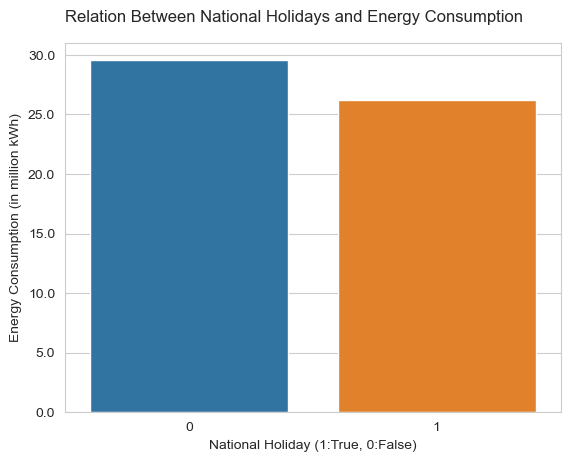

In [100]:
# Plot a bar graph for checking the relation between Jour_Feries and energy consumption

fig, ax = plt.subplots()
sns.barplot(df_model, x='Jour_Feries', y='Energy_Cons_KWh', hue='Jour_Feries', errorbar=None)
ax.set_title('Relation Between National Holidays and Energy Consumption', pad=15, loc='left')
ax.set_ylabel('Energy Consumption (in million kWh)')
ax.set_xlabel('National Holiday (1:True, 0:False)')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.get_legend().set_visible(False)
plt.show()

We can say that average energy consumption decreases when the day is a national holiday. 

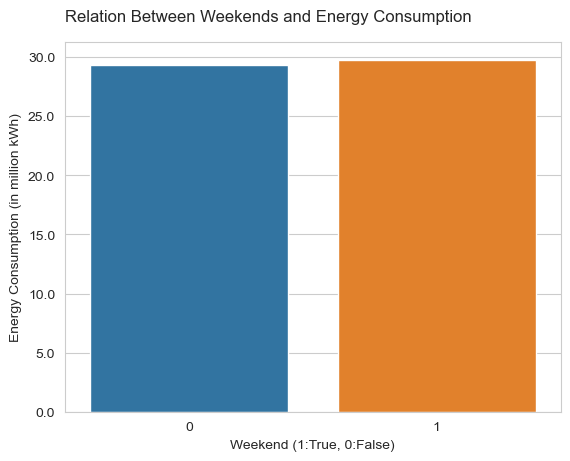

In [101]:
# Plot a bar graph for checking the relation between Weekend and energy consumption

fig, ax = plt.subplots()
sns.barplot(df_model, x='Weekend', y='Energy_Cons_KWh', hue='Weekend', errorbar=None)
ax.set_title('Relation Between Weekends and Energy Consumption', pad=15, loc='left')
ax.set_ylabel('Energy Consumption (in million kWh)')
ax.set_xlabel('Weekend (1:True, 0:False)')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.get_legend().set_visible(False)
plt.show()

We can say that there is not much difference on average energy consumption between weekends and weekdays. 

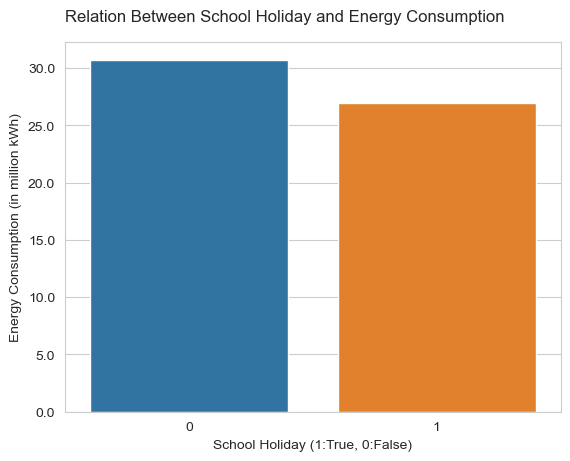

In [102]:
# Plot a bar graph for checking the relation between Vacances_Scol and energy consumption

fig, ax = plt.subplots()
sns.barplot(df_model, x='Vacances_Scol', y='Energy_Cons_KWh', hue='Vacances_Scol', errorbar=None)
ax.set_title('Relation Between School Holiday and Energy Consumption', pad=15, loc='left')
ax.set_ylabel('Energy Consumption (in million kWh)')
ax.set_xlabel('School Holiday (1:True, 0:False)')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.get_legend().set_visible(False)
plt.show()

We can say that average energy consumption decreases when the day is a school holiday. 

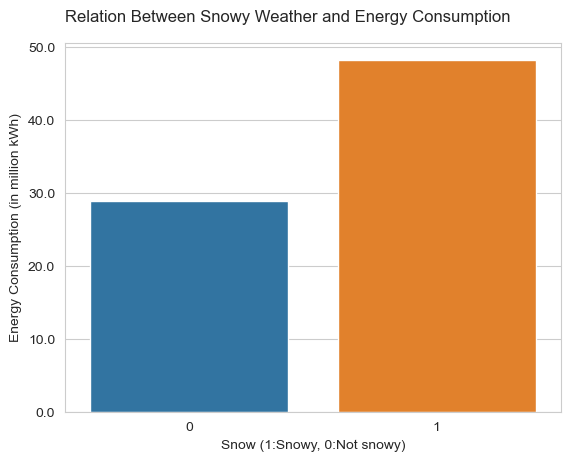

In [103]:
# Plot a bar graph for checking the relation between snow and energy consumption

fig, ax = plt.subplots()
sns.barplot(df_model, x='TOTAL_SNOW_MM', y='Energy_Cons_KWh', hue='TOTAL_SNOW_MM', errorbar=None)
ax.set_title('Relation Between Snowy Weather and Energy Consumption', pad=15, loc='left')
ax.set_ylabel('Energy Consumption (in million kWh)')
ax.set_xlabel('Snow (1:Snowy, 0:Not snowy)')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.get_legend().set_visible(False)
plt.show()

We can say that the average energy consumption is much higher when it is snowy by looking at the graph.

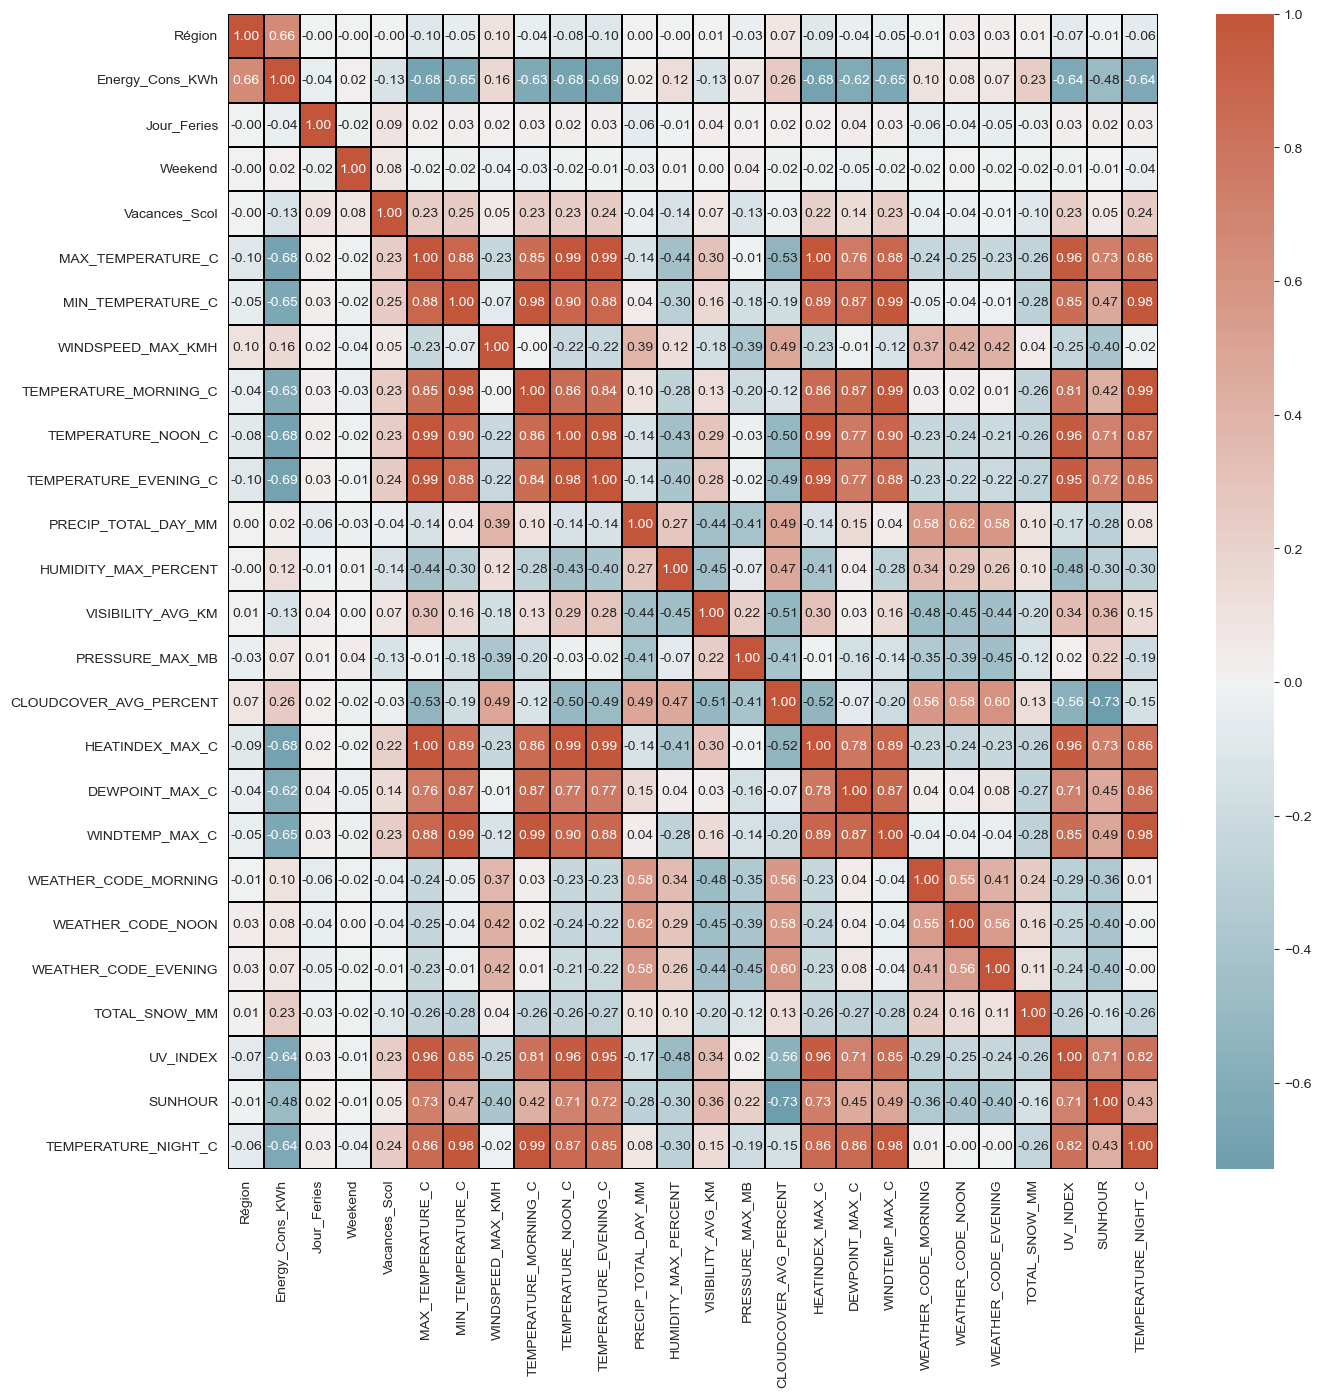

In [104]:
# Plot a heatmap of correlations between the columns for checking the columns most correlated with Energy Consumption
mat_corr = df_model.select_dtypes('number')
fig = plt.subplots(figsize=(15,15))
sns.heatmap(mat_corr.corr(), cmap = sns.diverging_palette(220, 20, as_cmap=True),
            center=0.00, annot=True, linewidths=0.3, linecolor='black',
            cbar=True, fmt='.2f')
plt.show()

The most correlated variables with Energy consumption are the temperature columns. The region is a critical factor which influences the energy consumption. There is no correlation between energy consumption and the columns 'national holiday', 'weekend' and 'precipitation total'. There is a slight correlation between energy consumption and the columns 'TOTAL_SNOW_MM', 'School Holiday' and 'Humidity'.

### 5.3.3. Base ML Model with all of the Variables in Matrice

In [105]:
# Linear Regression model
X = df_model.select_dtypes('number').drop('Energy_Cons_KWh', axis=1)
y = df_model['Energy_Cons_KWh']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

numeric=df_model.select_dtypes('number').drop(['Région', 'Energy_Cons_KWh', 'Jour_Feries',
                                               'Weekend', 'Vacances_Scol', 'TOTAL_SNOW_MM'], axis=1).columns.to_list()
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

LR_model = LinearRegression().fit(X_train, y_train)

ypred = LR_model.predict(X_test)

#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.8939893184204453, 3641150.309803768, 4622601.524481878)

In [106]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.916790903842659, 2737737.1265737703, 4095406.8005107823)

In [107]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_score(y_test, rf_pred), mean_absolute_error(y_test, rf_pred), np.sqrt(mean_squared_error(y_test, rf_pred))

(0.9659682750385057, 1818919.8067019968, 2619109.320988245)

### 5.3.4. Feature Selection for the User Form

After implementing the models with all of the variables in matrice, we have to choose the most suited variables for the user form because the users can't fill all of the variables in our matrice. Moreover, there are several temperature variables in our matrice. So, we have to choose the most suited one.\
As feature selection method, we use SelectKBest method from scikitlearn library. If we have to choose the k best features for our model, we use Scikit Learn's SelectKBest algorithm. We pass the score function and the number (k) of best features as a parameter when we apply the aforementioned algorithm. The best score function for our regression model is mutual_info_regression function.\
***What is Mutual Information?*** \
Mutual Information (MI) represents the mutual dependance between two variables. In machine learning, MI measures the amount of information obtained about one variable from another. The mi score is a positive value that shows the level of dependance between the two variable: the dependance is greater when mi score is higher.

In [108]:
# Choosing the best variables with SelectKBest of ScikitLearn
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Using mutual_info_regression as score_func and selecting top 5 features
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    #X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]
    
    # Get the indices of the selected features
    selected_indices = np.argsort(reg.scores_)[::-1][:k]
    selected_features = X.columns[selected_indices]
    # return that dataframe
    return selected_features

featureSelect_dataframe(X, y, mutual_info_regression, 10)


Index(['TEMPERATURE_NOON_C', 'HEATINDEX_MAX_C', 'MAX_TEMPERATURE_C',
       'TEMPERATURE_EVENING_C', 'UV_INDEX', 'MIN_TEMPERATURE_C',
       'WINDTEMP_MAX_C', 'TEMPERATURE_NIGHT_C', 'TEMPERATURE_MORNING_C',
       'SUNHOUR'],
      dtype='object')

All of the ten most dependent features with Energy Consumption are related to temperature. We can only use a temperature column and we will choose between them. But, for choosing other variables which may be interesting for client, we will check now the mutual info scores of all variables.

TEMPERATURE_NOON_C       0.79
HEATINDEX_MAX_C          0.78
MAX_TEMPERATURE_C        0.77
TEMPERATURE_EVENING_C    0.77
UV_INDEX                 0.64
MIN_TEMPERATURE_C        0.56
WINDTEMP_MAX_C           0.52
TEMPERATURE_NIGHT_C      0.48
TEMPERATURE_MORNING_C    0.45
SUNHOUR                  0.41
DEWPOINT_MAX_C           0.40
Région                   0.40
CLOUDCOVER_AVG_PERCENT   0.15
PRESSURE_MAX_MB          0.13
Vacances_Scol            0.10
WEATHER_CODE_EVENING     0.09
HUMIDITY_MAX_PERCENT     0.07
WEATHER_CODE_NOON        0.06
VISIBILITY_AVG_KM        0.05
WEATHER_CODE_MORNING     0.05
TOTAL_SNOW_MM            0.03
WINDSPEED_MAX_KMH        0.03
PRECIP_TOTAL_DAY_MM      0.02
Jour_Feries              0.00
Weekend                  0.00
Name: MI Scores, dtype: float64


<Axes: >

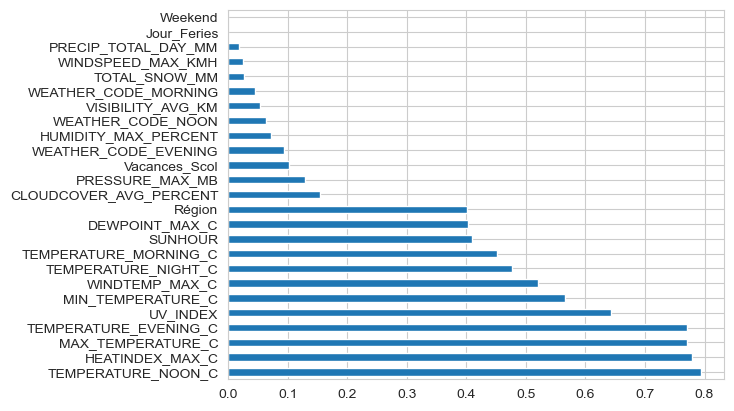

In [109]:
# Mutual information scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores) # show a few features with their MI scores

mi_scores.plot(kind='barh')

Besides two compulsory features which are temperature and precipitation, we choose 'Sunhour', 'Region', 'Vacances_Scol', 'HUMIDITY_MAX_PERCENT', 'TOTAL_SNOW_MM', 'Jour_Feries' and 'Weekend' columns for our model.

In [110]:
# Linear Regression model with selected features
X = df_model[['MAX_TEMPERATURE_C', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'Région', 
                'Vacances_Scol', 'HUMIDITY_MAX_PERCENT', 'Weekend', 'TOTAL_SNOW_MM', 'Jour_Feries']]
y = df_model['Energy_Cons_KWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

numeric=['MAX_TEMPERATURE_C', 'HUMIDITY_MAX_PERCENT', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR']

sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

LR_model = LinearRegression().fit(X_train, y_train)

ypred = LR_model.predict(X_test)

#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.8545041576588213, 4165190.63706902, 5415479.752258109)

In [111]:
# Decision Tree Regression model with selected features
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.9126160502520212, 2794837.868112022, 4196888.972796353)

In [112]:
# Random Forest Regressio model with selected features
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_score(y_test, rf_pred), mean_absolute_error(y_test, rf_pred), np.sqrt(mean_squared_error(y_test, rf_pred))

(0.9532211992549154, 2055347.7299457649, 3070691.498988982)

Out of three different regression model types, the one with best performance (and best results) is RandomForestRegressor model. We will use this model to predict the daily energy consumptions.\

We will now apply gridsearch and randomizedsearch to choose the best hyperparameters for increasing the performance of our model.

#### Hyperparameters for random forest

In [ ]:
# We define the parameters
parameters_rf = {'n_estimators': [25, 50, 100, 150],
                 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'max_features': ["sqrt", "log2", None],
                 'min_samples_leaf': [1, 2, 4],
                 'max_leaf_nodes': [3, 6, 9]}

#Calculating different regression metrics

from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(RandomForestRegressor(), param_grid=parameters_rf, cv=3, n_jobs =-1)

#Conduct grid search over the parameter space

tuning_model.fit(X_train,y_train)
                          
#Show best parameter configuration found for regressor
rgr_params = tuning_model.best_params_
rgr_params

In [123]:
# Random Forest Regression model with selected features with hyperparameters
rf = RandomForestRegressor(max_depth= 20,
                           max_features= None,
                           max_leaf_nodes= 9,
                           min_samples_leaf= 2,
                           n_estimators= 25)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_score(y_test, rf_pred), mean_absolute_error(y_test, rf_pred), np.sqrt(mean_squared_error(y_test, rf_pred))

(0.9376201242146002, 2542952.582535736, 3545960.533703628)

We couldn't enhance the performance of the model with the hyperparameters found by gridsearchcv and we will now conduct the randomized search on the model in order to find the hyperparameters which increase the predictive power of the model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'max_features': ["sqrt", "log2", None],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_random = RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

#Best parameters
rf_random.best_params_

In [113]:
# Random Forest Regression model with selected features with best hyperparameters
rf = RandomForestRegressor(max_depth= 30,
                           max_features= None,
                           min_samples_leaf= 2,
                           min_samples_split= 5,
                           n_estimators= 800,
                           bootstrap= True)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_score(y_test, rf_pred), mean_absolute_error(y_test, rf_pred), np.sqrt(mean_squared_error(y_test, rf_pred))

(0.954683876787202, 2037244.250860297, 3022303.1186585636)

We couldn't improve the predictive power of our model with neither gridsearch nor randomizedsearch methods that much.

### Appendix: PCA

PCA transforms a set of original variables (characteristics) into a set of new variables (principal components), which are linear combinations of the original variables. The principal components are then sorted in order of importance, so that the first principal components capture most of the variation in the data. So, the created components by PCA are the new features different than the original features. We can't use PCA as a feature selection method.\

For further readings on PCA - Feature Selection: 
- https://medium.com/@saverio3107/pca-is-not-your-typical-feature-selection-tool-193079dcc84b

- https://blog.kxy.ai/5-reasons-you-should-never-use-pca-for-feature-selection/index.html


In [113]:
# Choosing the best principal components with PCA of ScikitLearn

from sklearn.decomposition import PCA
X3 = df_model.select_dtypes('number').drop('Energy_Cons_KWh', axis=1)
y3 = df_model['Energy_Cons_KWh']

scaler = StandardScaler().fit(X3)
X3 = pd.DataFrame(scaler.transform(X3), index=X3.index, columns=X3.columns)

pca = PCA(n_components=15)
X_pca = pca.fit_transform(X3)
print(pca.explained_variance_ratio_)
print(X_pca.shape)

[0.41039388 0.18050157 0.05096077 0.04369119 0.04186185 0.04030323
 0.03850275 0.03228805 0.02644882 0.02475018 0.02412206 0.02009567
 0.01882735 0.0156505  0.01254509]
(1462, 15)


In [114]:
# The new dataframe created by PCA

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
0    -7.51  4.01 -2.59  3.05  1.15 -3.22  2.36  0.72  0.76 -1.29 -0.71  3.31   
1    -7.44  3.57 -2.21  3.09  2.99 -2.44  2.48 -0.95 -0.44  0.72 -0.49  2.12   
2    -3.96 -2.65  0.59  0.13  1.36  0.04 -1.00 -1.34  0.12  0.07  0.45 -0.07   
3    -3.19 -3.26 -0.38  0.48 -0.31 -0.64 -1.04 -0.31  1.04  0.05  0.50 -0.14   
4    -2.42 -0.74 -0.27 -0.66 -0.67 -0.36 -1.25  0.11 -1.02 -0.71  0.44 -0.20   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1457 -2.63  0.39  1.56  0.86 -1.20  0.46 -0.14  0.05 -0.54 -2.73  1.50 -1.58   
1458 -2.95  1.56  2.13  1.59 -1.21  0.50 -0.42 -0.85  0.11 -0.77  1.51 -0.97   
1459 -2.31  2.42  1.01  0.96 -1.10  0.45 -0.02 -0.26 -0.29 -0.59  1.02 -1.49   
1460 -3.61  3.76 -0.76 -0.23  1.27  1.05  0.99 -0.42  0.62 -1.05 -1.30 -1.86   
1461 -3.21  2.36 -0.12 -0.24  1.02  1.14  0.81 -0.42  0.70 -2.02 -0.35 -0.74   

      PC13  PC14  PC15  
0    -3.45  0.27  0.70  
1     0.49  0.96 -2.81  
2    -0.38 -0.00 -0.15  
3    -0.00  0.05 -0.31  
4     0.53  0.02  0.07  
...    ...   ...   ...  
1457 -0.27  0.13 -0.05  
1458 -0.56  1.04  0.26  
1459 -0.99 -0.56  0.34  
1460 -0.82  0.41  0.55  
1461 -1.61  0.44  0.96  

[1462 rows x 15 columns]

In [115]:
# We can display the contributions of original features to each principal components of PCA

loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X3.columns,  # and the rows are the original features
)

loadings

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  \
Région                 -0.02  0.01  0.26  0.12 -0.31  0.61  0.65  0.10  0.02   
Jour_Feries             0.01 -0.01  0.26 -0.48 -0.21 -0.54  0.43 -0.40  0.09   
Weekend                -0.01 -0.02  0.08 -0.20  0.81  0.30  0.18 -0.39 -0.10   
Vacances_Scol           0.08  0.05  0.49 -0.15  0.35 -0.19  0.08  0.68  0.22   
MAX_TEMPERATURE_C       0.31  0.02 -0.04  0.06  0.03 -0.03  0.02 -0.01  0.07   
MIN_TEMPERATURE_C       0.28  0.16  0.03 -0.05 -0.02  0.03 -0.02  0.01 -0.17   
WINDSPEED_MAX_KMH      -0.08  0.25  0.39  0.11 -0.12  0.05 -0.14 -0.20 -0.02   
TEMPERATURE_MORNING_C   0.27  0.20  0.03 -0.04 -0.03  0.03 -0.02 -0.01 -0.21   
TEMPERATURE_NOON_C      0.31  0.03 -0.03  0.06  0.02 -0.02  0.02 -0.01  0.05   
TEMPERATURE_EVENING_C   0.30  0.03 -0.04  0.03  0.03 -0.03  0.03  0.01  0.09   
PRECIP_TOTAL_DAY_MM    -0.06  0.35 -0.10  0.11  0.02  0.02 -0.02 -0.15  0.42   
HUMIDITY_MAX_PERCENT   -0.14  0.15 -0.39 -0.44 -0.04  0.08  0.14  0.25 -0.04   
VISIBILITY_AVG_KM       0.11 -0.25  0.33  0.12 -0.09  0.06 -0.18 -0.21 -0.19   
PRESSURE_MAX_MB         0.01 -0.30 -0.25 -0.25 -0.03  0.11 -0.00 -0.01 -0.01   
CLOUDCOVER_AVG_PERCENT -0.16  0.33  0.09 -0.18 -0.06  0.03 -0.05  0.06 -0.33   
HEATINDEX_MAX_C         0.31  0.02 -0.05  0.05  0.02 -0.02  0.03 -0.02  0.06   
DEWPOINT_MAX_C          0.24  0.21 -0.16 -0.21 -0.09  0.08  0.04  0.03 -0.08   
WINDTEMP_MAX_C          0.29  0.16 -0.02 -0.06 -0.02  0.03  0.00  0.02 -0.18   
WEATHER_CODE_MORNING   -0.09  0.32 -0.16  0.09  0.07 -0.09  0.10  0.01 -0.14   
WEATHER_CODE_NOON      -0.09  0.34 -0.03  0.09  0.04  0.02  0.02 -0.14  0.21   
WEATHER_CODE_EVENING   -0.08  0.33  0.04  0.06  0.01  0.04 -0.08 -0.08  0.30   
TOTAL_SNOW_MM          -0.10  0.03 -0.18  0.53  0.17 -0.40  0.46  0.06 -0.34   
UV_INDEX                0.30 -0.01  0.00  0.08  0.03 -0.02  0.02 -0.03  0.10   
SUNHOUR                 0.23 -0.16 -0.21  0.09 -0.01  0.01  0.21 -0.05  0.39   
TEMPERATURE_NIGHT_C     0.28  0.18  0.03 -0.03 -0.02  0.01 -0.03  0.00 -0.21   

                        PC10  PC11  PC12  PC13  PC14  PC15  
Région                  0.02 -0.10 -0.05  0.00 -0.03  0.00  
Jour_Feries            -0.00 -0.07 -0.05  0.00 -0.02 -0.02  
Weekend                -0.06  0.05  0.00 -0.04 -0.03  0.02  
Vacances_Scol           0.17  0.02  0.05  0.13 -0.01  0.00  
MAX_TEMPERATURE_C       0.01  0.03  0.02 -0.07  0.01 -0.03  
MIN_TEMPERATURE_C      -0.02 -0.10  0.01  0.02 -0.01  0.05  
WINDSPEED_MAX_KMH       0.25  0.52  0.45 -0.37  0.03  0.08  
TEMPERATURE_MORNING_C   0.05 -0.08  0.01  0.03 -0.01  0.08  
TEMPERATURE_NOON_C     -0.02  0.02  0.03 -0.07 -0.01 -0.05  
TEMPERATURE_EVENING_C  -0.01  0.05  0.04 -0.08  0.06 -0.06  
PRECIP_TOTAL_DAY_MM     0.22 -0.02 -0.17  0.25 -0.32  0.63  
HUMIDITY_MAX_PERCENT   -0.14  0.51  0.08  0.21  0.08  0.03  
VISIBILITY_AVG_KM       0.08  0.31 -0.10  0.72 -0.09 -0.14  
PRESSURE_MAX_MB         0.60 -0.29  0.54  0.13 -0.12 -0.03  
CLOUDCOVER_AVG_PERCENT -0.09 -0.13  0.03  0.05 -0.03 -0.04  
HEATINDEX_MAX_C         0.00  0.05  0.03 -0.05  0.01 -0.04  
DEWPOINT_MAX_C         -0.07  0.18  0.11  0.11 -0.03  0.06  
WINDTEMP_MAX_C          0.00 -0.13 -0.02  0.06 -0.00  0.05  
WEATHER_CODE_MORNING    0.51  0.10 -0.41 -0.11 -0.29 -0.51  
WEATHER_CODE_NOON       0.20 -0.15  0.03  0.27  0.79 -0.16  
WEATHER_CODE_EVENING   -0.38 -0.21  0.41  0.20 -0.37 -0.45  
TOTAL_SNOW_MM          -0.05  0.05  0.32  0.17 -0.02  0.14  
UV_INDEX                0.00 -0.02  0.05 -0.02  0.06 -0.03  
SUNHOUR                 0.01  0.31 -0.01  0.00 -0.03 -0.22  
TEMPERATURE_NIGHT_C     0.04 -0.09  0.01  0.03 -0.02  0.08

In [116]:
# Create a function in order to visualise the explained variance by components of PCA
def plot_pca_variance(pca, width=10):

    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, round(10*max(evr)+0.5)/10)
    )
    axs[0].title.set_weight('bold')
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[0].set_xticks(grid)
    axs[0].set_xticklabels(grid)

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(grid, cv, "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.01)
    )
    axs[1].title.set_weight('bold')
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[1].set_xticks(grid)
    axs[1].set_xticklabels(grid)

    # Cumulative variance value on the 2nd plot
    axs[1].annotate(f'CV={cv[-1]:.3f}', (grid[-1], cv[-1]), textcoords="offset points", xytext=(-15,-10), ha='center')

    # Set up figure
    fig.set(figwidth=width)

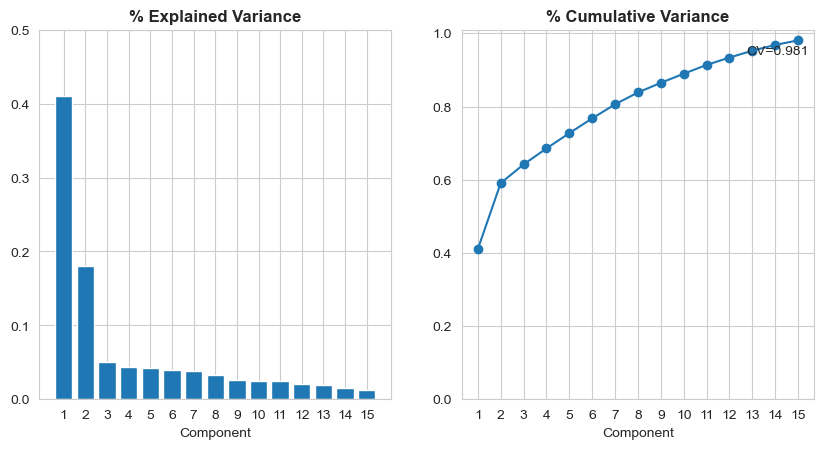

In [117]:
plot_pca_variance(pca, width=10)

We can say that first principal component created by PCA explains almost 40 percent of the total variance of data set, the second component explains almost 17 percent and the third one explains 4 percent and it goes like that by looking the graphic which is at the left side. The second graphic which is on the right side explains the cumulative variance explained by components. 98 percent of the total variance of the data set is explained by 15 principal components created by PCA. Generally, it depends on model-project-concept, we take into consideration the components which explains at least 90 percent of the variance which is 11 in our case.\

We will now conduct a new PCA on data set with 11 components as parameter.

[0.41039388 0.18050157 0.05096077 0.04369119 0.04186185 0.04030323
 0.03850275 0.03228805 0.02644882 0.02475018 0.02412206]


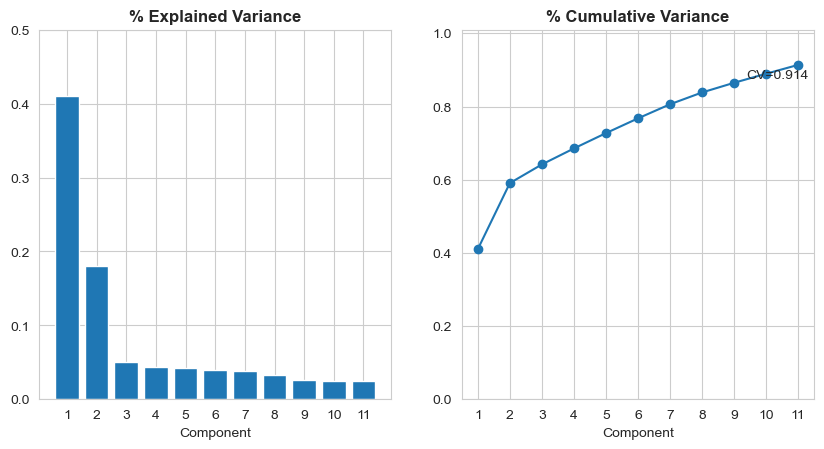

In [118]:
# plot with three components
pca1 = PCA(n_components=11)
X_pca1 = pca1.fit_transform(X3)
print(pca1.explained_variance_ratio_)
component_names1 = [f"PC{i+1}" for i in range(X_pca1.shape[1])]
X_pca1 = pd.DataFrame(X_pca1, columns=component_names1)

loadings1 = pd.DataFrame(
        pca1.components_.T,  # transpose the matrix of loadings
        columns=component_names1,  # so the columns are the principal components
        index=X3.columns,  # and the rows are the original features
)

plot_pca_variance(pca1, width=10)

In [119]:
X4 = X_pca1
y4 = df_model['Energy_Cons_KWh']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=5, train_size=0.80)

LR_model4 = LinearRegression().fit(X4_train, y4_train)

ypred4 = LR_model4.predict(X4_test)

#Metrics to evaluate your model 
r2_score(y4_test, ypred4), mean_absolute_error(y4_test, ypred4), np.sqrt(mean_squared_error(y4_test, ypred4))

(0.8720496802490945, 4092699.2685983027, 5042927.622828594)

In [120]:
print("\nScore for the Train dataset :", LR_model4.score(X4_train, y4_train))
print("Score for the Test dataset :", LR_model4.score(X4_test, y4_test))


Score for the Train dataset : 0.8662080064476025
Score for the Test dataset : 0.8720496802490945


In [121]:
dt4 = DecisionTreeRegressor()
dt4.fit(X4_train, y4_train)
yhat4 = dt4.predict(X4_test)
r2_score(y4_test, yhat4), mean_absolute_error(y4_test, yhat4), np.sqrt(mean_squared_error(y4_test, yhat4))

(0.8471300537529154, 3377329.6932184296, 5512176.354580075)